In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('./processed_transactions.xlsx')
df

Date  Cluster  Receipts      Balance    Payments  \
0     2022-09-29       -1       0.0  1000.000000    0.000000   
1     2022-09-30       -1       0.0  1000.000000    0.000000   
2     2022-10-01       -1       0.0  1000.000000    0.000000   
3     2022-10-02       -1       0.0  1000.000000    0.000000   
4     2022-10-03       -1       0.0  1000.000000    0.000000   
...          ...      ...       ...          ...         ...   
11123 2025-01-27       11       0.0  1000.000000  140.569122   
11124 2025-01-28       11       0.0  2004.008376  328.037598   
11125 2025-01-29       11       0.0  2622.407263  250.654175   
11126 2025-01-30       11       0.0  1000.000000  103.955704   
11127 2025-01-31       11       0.0  1095.036518  121.292206   

       Days_Since_Last_Txn  Total_Past_3_Txns  Avg_Past_3_Txns  \
0                        0                0.0         0.000000   
1                        0                0.0         0.000000   
2                        0                0.0         0.000000   
3                        0                0.0         0.000000   
4                        0                0.0         0.000000   
...                    ...                ...              ...   
11123                   20             8270.0      2756.666667   
11124                   21             8270.0      2756.666667   
11125                   22             8270.0      2756.666667   
11126                   23             8270.0      2756.666667   
11127                   24             8270.0      2756.666667   

       Txns_Past_60_Days  DayOfWeek_sin  DayOfWeek_cos  Month_sin  \
0                      0       0.433884      -0.900969  -1.000000   
1                      0      -0.433884      -0.900969  -1.000000   
2                      0      -0.974928      -0.222521  -0.866025   
3                      0      -0.781831       0.623490  -0.866025   
4                      0       0.000000       1.000000  -0.866025   
...                  ...            ...            ...        ...   
11123                  1       0.000000       1.000000   0.500000   
11124                  1       0.781831       0.623490   0.500000   
11125                  1       0.974928      -0.222521   0.500000   
11126                  1       0.433884      -0.900969   0.500000   
11127                  1      -0.433884      -0.900969   0.500000   

          Month_cos  Transaction_Happened  time_idx  
0     -1.836970e-16                     0         0  
1     -1.836970e-16                     0         1  
2      5.000000e-01                     0         2  
3      5.000000e-01                     0         3  
4      5.000000e-01                     0         4  
...             ...                   ...       ...  
11123  8.660254e-01                     0       851  
11124  8.660254e-01                     0       852  
11125  8.660254e-01                     0       853  
11126  8.660254e-01                     0       854  
11127  8.660254e-01                     0       855  

[11128 rows x 15 columns]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Empty lists to hold split data
train_list = []
test_list = []

# Group by Cluster
for cluster_id, group in df.groupby('Cluster'):
    # Sort by Date
    group = group.sort_values('Date')

    # Get last 30 days
    last_30_days = group['Date'].max() - pd.Timedelta(days=30)

    test = group[group['Date'] > last_30_days]
    train = group[group['Date'] <= last_30_days]

    train_list.append(train)
    test_list.append(test)

# Concatenate all cluster-wise results
train_df = pd.concat(train_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

In [ ]:
print(train_df['Date'].max())
print(test_df['Date'].max())

2025-01-01 00:00:00
2025-01-31 00:00:00


In [ ]:
train_df

Date  Cluster  Receipts  Balance  Payments  Days_Since_Last_Txn  \
0     2022-09-29       -1       0.0  1000.00      0.00                    0   
1     2022-09-30       -1       0.0  1000.00      0.00                    0   
2     2022-10-01       -1       0.0  1000.00      0.00                    0   
3     2022-10-02       -1       0.0  1000.00      0.00                    0   
4     2022-10-03       -1       0.0  1000.00      0.00                    0   
...          ...      ...       ...      ...       ...                  ...   
10733 2024-12-28       11       0.0   960.00     40.00                   75   
10734 2024-12-29       11       0.0   960.00      0.00                   76   
10735 2024-12-30       11       0.0   960.00      0.00                   77   
10736 2024-12-31       11       0.0  1008.22    460.43                   78   
10737 2025-01-01       11       0.0  1008.22      0.00                   79   

       Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0                    0.0              0.0                  0       0.433884   
1                    0.0              0.0                  0      -0.433884   
2                    0.0              0.0                  0      -0.974928   
3                    0.0              0.0                  0      -0.781831   
4                    0.0              0.0                  0       0.000000   
...                  ...              ...                ...            ...   
10733             7270.0           3635.0                  0      -0.974928   
10734             7270.0           3635.0                  0      -0.781831   
10735             7270.0           3635.0                  0       0.000000   
10736             7270.0           3635.0                  0       0.781831   
10737             7270.0           3635.0                  0       0.974928   

       DayOfWeek_cos     Month_sin     Month_cos  Transaction_Happened  \
0          -0.900969 -1.000000e+00 -1.836970e-16                     0   
1          -0.900969 -1.000000e+00 -1.836970e-16                     0   
2          -0.222521 -8.660254e-01  5.000000e-01                     0   
3           0.623490 -8.660254e-01  5.000000e-01                     0   
4           1.000000 -8.660254e-01  5.000000e-01                     0   
...              ...           ...           ...                   ...   
10733      -0.222521 -2.449294e-16  1.000000e+00                     0   
10734       0.623490 -2.449294e-16  1.000000e+00                     0   
10735       1.000000 -2.449294e-16  1.000000e+00                     0   
10736       0.623490 -2.449294e-16  1.000000e+00                     0   
10737      -0.222521  5.000000e-01  8.660254e-01                     0   

       time_idx  
0             0  
1             1  
2             2  
3             3  
4             4  
...         ...  
10733       821  
10734       822  
10735       823  
10736       824  
10737       825  

[10738 rows x 15 columns]

In [ ]:
test_df

Date  Cluster  Receipts      Balance    Payments  \
0   2025-01-02       -1       0.0  1452.664790  252.720840   
1   2025-01-03       -1       0.0  1624.028337    0.000000   
2   2025-01-04       -1       0.0  1348.356544  231.392044   
3   2025-01-05       -1       0.0  1000.000000  110.480011   
4   2025-01-06       -1       0.0  1000.000000    0.000000   
..         ...      ...       ...          ...         ...   
385 2025-01-27       11       0.0  1000.000000  140.569122   
386 2025-01-28       11       0.0  2004.008376  328.037598   
387 2025-01-29       11       0.0  2622.407263  250.654175   
388 2025-01-30       11       0.0  1000.000000  103.955704   
389 2025-01-31       11       0.0  1095.036518  121.292206   

     Days_Since_Last_Txn  Total_Past_3_Txns  Avg_Past_3_Txns  \
0                     29             8060.0      2686.666667   
1                     30             8060.0      2686.666667   
2                     31             8060.0      2686.666667   
3                     32             8060.0      2686.666667   
4                     33             8060.0      2686.666667   
..                   ...                ...              ...   
385                   20             8270.0      2756.666667   
386                   21             8270.0      2756.666667   
387                   22             8270.0      2756.666667   
388                   23             8270.0      2756.666667   
389                   24             8270.0      2756.666667   

     Txns_Past_60_Days  DayOfWeek_sin  DayOfWeek_cos  Month_sin  Month_cos  \
0                    2       0.433884      -0.900969        0.5   0.866025   
1                    2      -0.433884      -0.900969        0.5   0.866025   
2                    2      -0.974928      -0.222521        0.5   0.866025   
3                    1      -0.781831       0.623490        0.5   0.866025   
4                    1       0.000000       1.000000        0.5   0.866025   
..                 ...            ...            ...        ...        ...   
385                  1       0.000000       1.000000        0.5   0.866025   
386                  1       0.781831       0.623490        0.5   0.866025   
387                  1       0.974928      -0.222521        0.5   0.866025   
388                  1       0.433884      -0.900969        0.5   0.866025   
389                  1      -0.433884      -0.900969        0.5   0.866025   

     Transaction_Happened  time_idx  
0                       0       826  
1                       0       827  
2                       0       828  
3                       0       829  
4                       0       830  
..                    ...       ...  
385                     0       851  
386                     0       852  
387                     0       853  
388                     0       854  
389                     0       855  

[390 rows x 15 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10738 non-null  datetime64[ns]
 1   Cluster               10738 non-null  int64         
 2   Receipts              10738 non-null  float64       
 3   Balance               10738 non-null  float64       
 4   Payments              10738 non-null  float64       
 5   Days_Since_Last_Txn   10738 non-null  int64         
 6   Total_Past_3_Txns     10738 non-null  float64       
 7   Avg_Past_3_Txns       10738 non-null  float64       
 8   Txns_Past_60_Days     10738 non-null  int64         
 9   DayOfWeek_sin         10738 non-null  float64       
 10  DayOfWeek_cos         10738 non-null  float64       
 11  Month_sin             10738 non-null  float64       
 12  Month_cos             10738 non-null  float64       
 13  Transaction_Happ

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler10 = MinMaxScaler()
columns_to_scale = ['Receipts', 'Balance', 'Payments',
                    'Days_Since_Last_Txn', 'Total_Past_3_Txns',
                    'Avg_Past_3_Txns', 'Txns_Past_60_Days']

train_df[columns_to_scale] = scaler10.fit_transform(train_df[columns_to_scale])

In [ ]:
scaler20 = MinMaxScaler()
columns_to_scale = ['Receipts', 'Balance', 'Payments',
                    'Days_Since_Last_Txn', 'Total_Past_3_Txns',
                    'Avg_Past_3_Txns', 'Txns_Past_60_Days']

test_df[columns_to_scale] = scaler20.fit_transform(test_df[columns_to_scale])

In [ ]:
test_df

Date  Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0   2025-01-02       -1       0.0  0.279008  0.770402             0.048780   
1   2025-01-03       -1       0.0  0.384631  0.000000             0.050523   
2   2025-01-04       -1       0.0  0.214716  0.705383             0.052265   
3   2025-01-05       -1       0.0  0.000000  0.336791             0.054007   
4   2025-01-06       -1       0.0  0.000000  0.000000             0.055749   
..         ...      ...       ...       ...       ...                  ...   
385 2025-01-27       11       0.0  0.000000  0.428515             0.033101   
386 2025-01-28       11       0.0  0.618839  1.000000             0.034843   
387 2025-01-29       11       0.0  1.000000  0.764102             0.036585   
388 2025-01-30       11       0.0  0.000000  0.316902             0.038328   
389 2025-01-31       11       0.0  0.058577  0.369751             0.040070   

     Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0             0.201014         0.201014                0.2       0.433884   
1             0.201014         0.201014                0.2      -0.433884   
2             0.201014         0.201014                0.2      -0.974928   
3             0.201014         0.201014                0.1      -0.781831   
4             0.201014         0.201014                0.1       0.000000   
..                 ...              ...                ...            ...   
385           0.206267         0.206267                0.1       0.000000   
386           0.206267         0.206267                0.1       0.781831   
387           0.206267         0.206267                0.1       0.974928   
388           0.206267         0.206267                0.1       0.433884   
389           0.206267         0.206267                0.1      -0.433884   

     DayOfWeek_cos  Month_sin  Month_cos  Transaction_Happened  time_idx  
0        -0.900969        0.5   0.866025                     0       826  
1        -0.900969        0.5   0.866025                     0       827  
2        -0.222521        0.5   0.866025                     0       828  
3         0.623490        0.5   0.866025                     0       829  
4         1.000000        0.5   0.866025                     0       830  
..             ...        ...        ...                   ...       ...  
385       1.000000        0.5   0.866025                     0       851  
386       0.623490        0.5   0.866025                     0       852  
387      -0.222521        0.5   0.866025                     0       853  
388      -0.900969        0.5   0.866025                     0       854  
389      -0.900969        0.5   0.866025                     0       855  

[390 rows x 15 columns]

In [ ]:
df = train_df.copy()

In [ ]:
df.drop(columns=['time_idx'], inplace=True)

In [ ]:
%pip install pytorch-lightning pytorch-forecasting optuna scikit-learn pandas matplotlib seaborn
%pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# import optuna
# from optuna.trial import FrozenTrial

# study_occurrence = optuna.create_study(direction="minimize")
# trial = optuna.trial.create_trial(
#     params={'hidden_size': 103, 'lstm_layers': 1, 'num_attention_heads': 4, 'dropout': 0.1309169746169452, 'learning_rate': 0.00018856750491026464, 'max_epochs': 46},
#     distributions={
#         'hidden_size': optuna.distributions.IntDistribution(32, 128),
#         'lstm_layers': optuna.distributions.IntDistribution(1, 2),
#         'num_attention_heads': optuna.distributions.IntDistribution(2, 4),
#         'dropout': optuna.distributions.FloatDistribution(0.1, 0.3),
#         'learning_rate': optuna.distributions.FloatDistribution(1e-4, 1e-2, log=True),
#         'max_epochs': optuna.distributions.IntDistribution(20, 50),
#     },
#     value=0.30140021443367004
# )
# study_occurrence.add_trial(trial)

In [ ]:
# import yaml

# # Adjust path if needed
# with open("lightning_logs/tft_occurrence_optuna/version_33/hparams.yaml", "r") as f:
#     best_params = yaml.safe_load(f)

# print(best_params)

In [ ]:
import optuna
from optuna.trial import FrozenTrial

study_occurrence = optuna.create_study(direction="minimize")
trial = optuna.trial.create_trial(
    params={'hidden_size': 96, 'lstm_layers': 2, 'num_attention_heads': 3, 'dropout': 0.20569750818373939, 'learning_rate': 0.0013542570304909964, 'max_epochs': 34},
    distributions={
        'hidden_size': optuna.distributions.IntDistribution(32, 128),
        'lstm_layers': optuna.distributions.IntDistribution(1, 2),
        'num_attention_heads': optuna.distributions.IntDistribution(2, 4),
        'dropout': optuna.distributions.FloatDistribution(0.1, 0.3),
        'learning_rate': optuna.distributions.FloatDistribution(1e-4, 1e-2, log=True),
        'max_epochs': optuna.distributions.IntDistribution(20, 50),
    },
    value=0.41597774624824524
)
study_occurrence.add_trial(trial)

[I 2025-07-16 11:36:36,375] A new study created in memory with name: no-name-35d400c4-9fbd-48e8-a02d-d8efa3f05419


In [ ]:
df

Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0         -1       0.0  0.004924  0.000000             0.000000   
1         -1       0.0  0.004924  0.000000             0.000000   
2         -1       0.0  0.004924  0.000000             0.000000   
3         -1       0.0  0.004924  0.000000             0.000000   
4         -1       0.0  0.004924  0.000000             0.000000   
...      ...       ...       ...       ...                  ...   
9081       9       0.0  0.004388  0.015534             0.023853   
9082       9       0.0  0.004388  0.000000             0.025688   
9083       9       0.0  0.004388  0.000000             0.027523   
9084       9       0.0  0.005035  0.178808             0.029358   
9085       9       0.0  0.005035  0.000000             0.031193   

      Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0              0.000000         0.000000           0.000000       0.433884   
1              0.000000         0.000000           0.000000      -0.433884   
2              0.000000         0.000000           0.000000      -0.974928   
3              0.000000         0.000000           0.000000      -0.781831   
4              0.000000         0.000000           0.000000       0.000000   
...                 ...              ...                ...            ...   
9081           0.062793         0.046667           0.083333      -0.974928   
9082           0.062793         0.046667           0.083333      -0.781831   
9083           0.062793         0.046667           0.083333       0.000000   
9084           0.062793         0.046667           0.083333       0.781831   
9085           0.062793         0.046667           0.083333       0.974928   

      DayOfWeek_cos     Month_sin     Month_cos  Transaction_Happened  \
0         -0.900969 -1.000000e+00 -1.836970e-16                     0   
1         -0.900969 -1.000000e+00 -1.836970e-16                     0   
2         -0.222521 -8.660254e-01  5.000000e-01                     0   
3          0.623490 -8.660254e-01  5.000000e-01                     0   
4          1.000000 -8.660254e-01  5.000000e-01                     0   
...             ...           ...           ...                   ...   
9081      -0.222521 -2.449294e-16  1.000000e+00                     0   
9082       0.623490 -2.449294e-16  1.000000e+00                     0   
9083       1.000000 -2.449294e-16  1.000000e+00                     0   
9084       0.623490 -2.449294e-16  1.000000e+00                     0   
9085      -0.222521  5.000000e-01  8.660254e-01                     0   

      time_idx  
0            0  
1            1  
2            2  
3            3  
4            4  
...        ...  
9081       821  
9082       822  
9083       823  
9084       824  
9085       825  

[10738 rows x 14 columns]

In [ ]:
df.columns

Index(['Date', 'Cluster', 'Receipts', 'Balance', 'Payments',
       'Days_Since_Last_Txn', 'Total_Past_3_Txns', 'Avg_Past_3_Txns',
       'Txns_Past_60_Days', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Month_sin',
       'Month_cos', 'Transaction_Happened'],
      dtype='object')

## Data Normalization

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# columns_to_scale = ['Receipts', 'Balance', 'Payments',
#                     'Days_Since_Last_Txn', 'Total_Past_3_Txns',
#                     'Avg_Past_3_Txns', 'Txns_Past_60_Days']

# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df

Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0         -1       0.0  0.004924  0.000000             0.000000   
1         -1       0.0  0.004924  0.000000             0.000000   
2         -1       0.0  0.004924  0.000000             0.000000   
3         -1       0.0  0.004924  0.000000             0.000000   
4         -1       0.0  0.004924  0.000000             0.000000   
...      ...       ...       ...       ...                  ...   
9081       9       0.0  0.004388  0.015534             0.023853   
9082       9       0.0  0.004388  0.000000             0.025688   
9083       9       0.0  0.004388  0.000000             0.027523   
9084       9       0.0  0.005035  0.178808             0.029358   
9085       9       0.0  0.005035  0.000000             0.031193   

      Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0              0.000000         0.000000           0.000000       0.433884   
1              0.000000         0.000000           0.000000      -0.433884   
2              0.000000         0.000000           0.000000      -0.974928   
3              0.000000         0.000000           0.000000      -0.781831   
4              0.000000         0.000000           0.000000       0.000000   
...                 ...              ...                ...            ...   
9081           0.062793         0.046667           0.083333      -0.974928   
9082           0.062793         0.046667           0.083333      -0.781831   
9083           0.062793         0.046667           0.083333       0.000000   
9084           0.062793         0.046667           0.083333       0.781831   
9085           0.062793         0.046667           0.083333       0.974928   

      DayOfWeek_cos     Month_sin     Month_cos  Transaction_Happened  \
0         -0.900969 -1.000000e+00 -1.836970e-16                     0   
1         -0.900969 -1.000000e+00 -1.836970e-16                     0   
2         -0.222521 -8.660254e-01  5.000000e-01                     0   
3          0.623490 -8.660254e-01  5.000000e-01                     0   
4          1.000000 -8.660254e-01  5.000000e-01                     0   
...             ...           ...           ...                   ...   
9081      -0.222521 -2.449294e-16  1.000000e+00                     0   
9082       0.623490 -2.449294e-16  1.000000e+00                     0   
9083       1.000000 -2.449294e-16  1.000000e+00                     0   
9084       0.623490 -2.449294e-16  1.000000e+00                     0   
9085      -0.222521  5.000000e-01  8.660254e-01                     0   

      time_idx  
0            0  
1            1  
2            2  
3            3  
4            4  
...        ...  
9081       821  
9082       822  
9083       823  
9084       824  
9085       825  

[10738 rows x 14 columns]

In [ ]:
df.columns

Index(['Cluster', 'Receipts', 'Balance', 'Payments', 'Days_Since_Last_Txn',
       'Total_Past_3_Txns', 'Avg_Past_3_Txns', 'Txns_Past_60_Days',
       'DayOfWeek_sin', 'DayOfWeek_cos', 'Month_sin', 'Month_cos',
       'Transaction_Happened', 'time_idx'],
      dtype='object')

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateFinder, ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data.encoders import TorchNormalizer
from pytorch_forecasting.metrics import QuantileLoss,SMAPE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error
import optuna
import os
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume 'expense_data_set' is your Pandas DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['Cluster'] = df['Cluster'].astype(str)
df = df.sort_values(by=['Cluster', 'Date'])
# Create integer time index (e.g., days since the first date)
df['time_idx'] = (
    df['Date'] - df['Date'].min()
).dt.days
df=df.drop(columns=['Date'])
continuous_features_occurrence =['Receipts','Days_Since_Last_Txn','Total_Past_3_Txns',
                                 'Avg_Past_3_Txns', 'Txns_Past_60_Days']

continuous_features_amount = continuous_features_occurrence

time_varying_known_reals = [
    "DayOfWeek_sin",
    "DayOfWeek_cos",
    "Month_sin",
    "Month_cos",
    "Balance",
    "Payments"
]

# No need of normalizations
# scaler = MinMaxScaler()

# # Apply min-max scaling to the continuous features
# expense_data_set[continuous_features_occurrence] = scaler.fit_transform(
#     expense_data_set[continuous_features_occurrence]
# )

# if scaler is not None:
#     print("normalized")
# else:
#     print("no normalize")

# --- Define Custom Loss Function for Amount Prediction ---
class NonZeroLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, y_pred, y_true):
        non_zero_mask = (y_true > 0).float()
        loss = self.mse(y_pred * non_zero_mask, y_true * non_zero_mask)
        return loss

# --- TFT Pipeline 1: Occurrence Prediction ---

# Create TimeSeriesDataSet for occurrence prediction
training_data_occurrence = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="Transaction_Happened",
    group_ids=["Cluster"],
    static_categoricals=["Cluster"],
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=continuous_features_occurrence,
    scalers=None,#{feature: TorchNormalizer(method="standard") for feature in continuous_features_occurrence},
    max_encoder_length=90,
    max_prediction_length=30,
)

validation_data_occurrence = TimeSeriesDataSet.from_dataset(
    training_data_occurrence,
    df,
    predict=True,
    stop_randomization=True,
)

train_dataloader_occurrence = training_data_occurrence.to_dataloader(train=True, batch_size=64)
val_dataloader_occurrence = validation_data_occurrence.to_dataloader(train=False, batch_size=64)

num_positive = df['Transaction_Happened'].sum()
num_negative = len(df) - num_positive

In [ ]:
# --- Hyperparameter Optimization for Occurrence Prediction ---
def objective_occurrence(trial):
    # Calculate the weight for the positive class
    num_positive = df['Transaction_Happened'].sum()
    num_negative = len(df) - num_positive
    pos_weight = torch.tensor([num_negative / (num_positive + 1e-6)])
    # loss_fn_occurrence = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    # Define hyperparameters to tune
    hidden_size = trial.suggest_int("hidden_size", 32, 128)
    lstm_layers = trial.suggest_int("lstm_layers", 1, 2)
    num_attention_heads = trial.suggest_int("num_attention_heads", 2, 4)
    dropout = trial.suggest_float("dropout", 0.1, 0.3)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    max_epochs = trial.suggest_int("max_epochs", 20, 50) # Tune max epochs

    class TFTLightningModuleOccurrence(pl.LightningModule):
        def __init__(self, model, learning_rate, pos_weight,max_prediction_length):
            super().__init__()
            self.model = model
            self.learning_rate = learning_rate
            self.pos_weight = pos_weight
            self.loss_fn = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)
            self.max_prediction_length = max_prediction_length

        def forward(self, x):
            return self.model(x)

        def predict_step(self, batch, batch_idx):
            x, y = batch  # Unpack the batch tuple
            return {"prediction": self(x)["prediction"]}

        def training_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self(x)["prediction"]  # properly extract predictions
            target = y[0].type(torch.FloatTensor)
            # Adjust shapes to match
            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]
            loss = self.loss_fn(y_hat, target)
            #self.log("train_loss", loss)
            self.log("train_loss", loss, prog_bar=True, logger=True)

            # Print progress
            if batch_idx % 10 == 0:  # print every 10 batches
                print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
                print(f"Epoch {self.current_epoch}")
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch

            y_hat = self(x)["prediction"]

            target = y[0].type(torch.FloatTensor)

            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]

            loss = self.loss_fn(y_hat, target)
            self.log("val_loss", loss, prog_bar=True)
            if batch_idx % 10 == 0:  # print every 10 batches
                print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
            return loss



        def configure_optimizers(self):
            return torch.optim.Adam(self.parameters(), lr=self.learning_rate)



        def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
            """
            Provides detailed feature importance for a specific prediction horizon.
            This function specifically targets a single day in the forecast.

            Args:
                x: Input data dictionary with model inputs
                category_name: Name of the category being predicted
                feature_names: List of feature names corresponding to the input features
                horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)

            Returns:
                Dictionary with explanation details specific to that horizon
            """
            # Put model in eval mode
            self.model.eval()

            # Debug info
            print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")

            try:
                with torch.no_grad():
                    # Forward pass
                    outputs = self.model(x)

                    # Get interpretation data specifically for this horizon
                    interp_data = self.model.interpret_output(
                        outputs,
                        reduction="none",
                        attention_prediction_horizon=horizon_index
                    )

                    # Extract raw importance values
                    encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                    decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]

                    # For encoder importances, average across all encoder time steps
                    if encoder_variables.ndim == 0:
                        encoder_avg = np.array([float(encoder_variables)])
                    elif encoder_variables.ndim == 1:
                        encoder_avg = encoder_variables
                    else:
                        encoder_avg = np.mean(encoder_variables, axis=0)

                    # For decoder importances, focus on the specific horizon we're interested in
                    if decoder_variables.ndim == 0:
                        decoder_importance = np.array([float(decoder_variables)])
                    elif decoder_variables.ndim == 1:
                        decoder_importance = decoder_variables
                    else:
                        # If we can extract the specific horizon's importance, do that
                        if horizon_index < decoder_variables.shape[0]:
                            decoder_importance = decoder_variables[horizon_index]
                        else:
                            # Otherwise use the last available horizon
                            decoder_importance = decoder_variables[-1]

                        # Convert scalar to array if needed
                        if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                            decoder_importance = np.array([float(decoder_importance)])

                    # Process arrays to ensure they have proper dimensions
                    if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                        encoder_avg = np.array([float(encoder_avg)])

                    if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])

                    # Ensure dimensions align
                    feature_count = len(feature_names)
                    encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                    decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1

                    min_features = min(encoder_count, decoder_count, feature_count)

                    # Truncate to matching dimensions
                    encoder_avg = encoder_avg[:min_features]
                    decoder_importance = decoder_importance[:min_features]
                    features_used = feature_names[:min_features]

                    # Calculate combined importance - weight decoder more heavily for binary classification
                    combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance

                    # Normalize to get percentages
                    total = np.sum(combined_importance)
                    if total > 0:
                        combined_importance = combined_importance / total

                    # Create feature importance dictionary
                    feature_importance = dict(zip(features_used, combined_importance))

                    # Sort features by importance
                    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

                    # Return the explanation details
                    return {
                        "all_features": dict(sorted_features),
                        "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                        "raw_encoder_importance": encoder_avg.tolist(),
                        "raw_decoder_importance": decoder_importance.tolist(),
                        "is_valid": True
                    }

            except Exception as e:
                print(f"Error in explain_prediction_for_horizon: {e}")
                import traceback
                traceback.print_exc()

                # Return a fallback explanation
                return {
                    "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                    "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                    "is_valid": False,
                    "error": str(e)
                }

    model = TemporalFusionTransformer.from_dataset(
        training_data_occurrence,
        output_size=1,
        hidden_size=hidden_size,
        lstm_layers=lstm_layers,
        attention_head_size=num_attention_heads,
        dropout=dropout,
        learning_rate=learning_rate,
    )

    lightning_model = TFTLightningModuleOccurrence(model,learning_rate,pos_weight,training_data_occurrence.max_prediction_length)
    early_stopping_callback_occurrence = EarlyStopping(monitor="val_loss", patience=10, mode="min")
    callbacks_occurrence = [early_stopping_callback_occurrence]

    trainer = pl.Trainer(
        max_epochs=max_epochs,
        accelerator="auto",
        callbacks=callbacks_occurrence,
        logger=TensorBoardLogger("lightning_logs", name="tft_occurrence_optuna"),
    )

    trainer.fit(lightning_model, train_dataloaders=train_dataloader_occurrence, val_dataloaders=val_dataloader_occurrence)
    # val_loss = trainer.validate(lightning_model, dataloaders=val_dataloader_occurrence, verbose=False)['val_loss']
    validation_results = trainer.validate(lightning_model, dataloaders=val_dataloader_occurrence, verbose=False)
    val_loss = validation_results[0]['val_loss']
    return val_loss

study_occurrence = optuna.create_study(direction="minimize")
study_occurrence.optimize(objective_occurrence, n_trials=1) # Adjust n_trials as needed

print("Occurrence Prediction Optimization Results:")
print(f"Best trial value: {study_occurrence.best_trial.value}")
print(f"Best trial params: {study_occurrence.best_trial.params}")

[I 2025-07-16 11:37:19,217] A new study created in memory with name: no-name-ab9f2429-46fd-44d6-b9ba-40bb25b736d1
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.or

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 1.6427


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 13. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Training: |          | 0/? [00:00<?, ?it/s]

Training batch 0, loss: 1.4461
Epoch 0
Training batch 10, loss: 1.2951
Epoch 0
Training batch 20, loss: 1.0947
Epoch 0
Training batch 30, loss: 1.2594
Epoch 0
Training batch 40, loss: 1.2682
Epoch 0
Training batch 50, loss: 1.1075
Epoch 0
Training batch 60, loss: 1.1364
Epoch 0
Training batch 70, loss: 1.1122
Epoch 0
Training batch 80, loss: 1.0417
Epoch 0
Training batch 90, loss: 0.8494
Epoch 0
Training batch 100, loss: 1.2164
Epoch 0
Training batch 110, loss: 1.1419
Epoch 0
Training batch 120, loss: 0.9291
Epoch 0
Training batch 130, loss: 1.0518
Epoch 0
Training batch 140, loss: 1.0219
Epoch 0


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.8782
Training batch 0, loss: 0.9965
Epoch 1
Training batch 10, loss: 0.7665
Epoch 1
Training batch 20, loss: 1.0446
Epoch 1
Training batch 30, loss: 0.9383
Epoch 1
Training batch 40, loss: 0.7847
Epoch 1
Training batch 50, loss: 0.8271
Epoch 1
Training batch 60, loss: 1.3857
Epoch 1
Training batch 70, loss: 0.7757
Epoch 1
Training batch 80, loss: 0.9949
Epoch 1
Training batch 90, loss: 0.7559
Epoch 1
Training batch 100, loss: 0.9339
Epoch 1
Training batch 110, loss: 0.7161
Epoch 1
Training batch 120, loss: 0.7551
Epoch 1
Training batch 130, loss: 0.7996
Epoch 1
Training batch 140, loss: 0.6330
Epoch 1


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.9625
Training batch 0, loss: 0.6900
Epoch 2
Training batch 10, loss: 0.7328
Epoch 2
Training batch 20, loss: 0.6926
Epoch 2
Training batch 30, loss: 0.6729
Epoch 2
Training batch 40, loss: 1.0075
Epoch 2
Training batch 50, loss: 0.6883
Epoch 2
Training batch 60, loss: 0.6636
Epoch 2
Training batch 70, loss: 0.6898
Epoch 2
Training batch 80, loss: 0.6750
Epoch 2
Training batch 90, loss: 0.8524
Epoch 2
Training batch 100, loss: 0.7842
Epoch 2
Training batch 110, loss: 0.8190
Epoch 2
Training batch 120, loss: 0.6439
Epoch 2
Training batch 130, loss: 0.7408
Epoch 2
Training batch 140, loss: 0.6155
Epoch 2


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.6347
Training batch 0, loss: 0.7691
Epoch 3
Training batch 10, loss: 0.6043
Epoch 3
Training batch 20, loss: 0.8168
Epoch 3
Training batch 30, loss: 0.7714
Epoch 3
Training batch 40, loss: 0.5175
Epoch 3
Training batch 50, loss: 0.6103
Epoch 3
Training batch 60, loss: 0.5751
Epoch 3
Training batch 70, loss: 0.5855
Epoch 3
Training batch 80, loss: 0.7576
Epoch 3
Training batch 90, loss: 0.9145
Epoch 3
Training batch 100, loss: 0.6697
Epoch 3
Training batch 110, loss: 0.7247
Epoch 3
Training batch 120, loss: 0.6326
Epoch 3
Training batch 130, loss: 0.4977
Epoch 3
Training batch 140, loss: 0.4858
Epoch 3


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.5307
Training batch 0, loss: 0.5370
Epoch 4
Training batch 10, loss: 0.5882
Epoch 4
Training batch 20, loss: 0.6179
Epoch 4
Training batch 30, loss: 0.5805
Epoch 4
Training batch 40, loss: 0.3392
Epoch 4
Training batch 50, loss: 0.5590
Epoch 4
Training batch 60, loss: 0.6440
Epoch 4
Training batch 70, loss: 0.6268
Epoch 4
Training batch 80, loss: 0.6145
Epoch 4
Training batch 90, loss: 0.4639
Epoch 4
Training batch 100, loss: 0.6044
Epoch 4
Training batch 110, loss: 0.5926
Epoch 4
Training batch 120, loss: 0.4273
Epoch 4
Training batch 130, loss: 0.7111
Epoch 4
Training batch 140, loss: 0.4474
Epoch 4


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.9888
Training batch 0, loss: 0.6786
Epoch 5
Training batch 10, loss: 0.4007
Epoch 5
Training batch 20, loss: 0.4938
Epoch 5
Training batch 30, loss: 0.5500
Epoch 5
Training batch 40, loss: 0.4470
Epoch 5
Training batch 50, loss: 0.4301
Epoch 5
Training batch 60, loss: 0.4234
Epoch 5
Training batch 70, loss: 0.5971
Epoch 5
Training batch 80, loss: 0.5375
Epoch 5
Training batch 90, loss: 0.4508
Epoch 5
Training batch 100, loss: 0.3923
Epoch 5
Training batch 110, loss: 0.5168
Epoch 5
Training batch 120, loss: 0.4854
Epoch 5
Training batch 130, loss: 0.4298
Epoch 5
Training batch 140, loss: 0.4378
Epoch 5


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.4090
Training batch 0, loss: 0.5700
Epoch 6
Training batch 10, loss: 0.4695
Epoch 6
Training batch 20, loss: 0.4474
Epoch 6
Training batch 30, loss: 0.5017
Epoch 6
Training batch 40, loss: 0.5169
Epoch 6
Training batch 50, loss: 0.4393
Epoch 6
Training batch 60, loss: 0.3780
Epoch 6
Training batch 70, loss: 0.4766
Epoch 6
Training batch 80, loss: 0.4766
Epoch 6
Training batch 90, loss: 0.3453
Epoch 6
Training batch 100, loss: 0.6200
Epoch 6
Training batch 110, loss: 0.3285
Epoch 6
Training batch 120, loss: 0.5238
Epoch 6
Training batch 130, loss: 0.4468
Epoch 6
Training batch 140, loss: 0.3834
Epoch 6


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.3872
Training batch 0, loss: 0.4042
Epoch 7
Training batch 10, loss: 0.5549
Epoch 7
Training batch 20, loss: 0.4950
Epoch 7
Training batch 30, loss: 0.6285
Epoch 7
Training batch 40, loss: 0.4450
Epoch 7
Training batch 50, loss: 0.3614
Epoch 7
Training batch 60, loss: 0.2711
Epoch 7
Training batch 70, loss: 0.5354
Epoch 7
Training batch 80, loss: 0.3301
Epoch 7
Training batch 90, loss: 0.2691
Epoch 7
Training batch 100, loss: 0.4104
Epoch 7
Training batch 110, loss: 0.3134
Epoch 7
Training batch 120, loss: 0.3525
Epoch 7
Training batch 130, loss: 0.3243
Epoch 7
Training batch 140, loss: 0.4525
Epoch 7


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.7915
Training batch 0, loss: 0.3380
Epoch 8
Training batch 10, loss: 0.2325
Epoch 8
Training batch 20, loss: 0.3070
Epoch 8
Training batch 30, loss: 0.3030
Epoch 8
Training batch 40, loss: 0.4254
Epoch 8
Training batch 50, loss: 0.2830
Epoch 8
Training batch 60, loss: 0.3245
Epoch 8
Training batch 70, loss: 0.2945
Epoch 8
Training batch 80, loss: 0.3590
Epoch 8
Training batch 90, loss: 0.2860
Epoch 8
Training batch 100, loss: 0.2966
Epoch 8
Training batch 110, loss: 0.4814
Epoch 8
Training batch 120, loss: 0.4272
Epoch 8
Training batch 130, loss: 0.3034
Epoch 8
Training batch 140, loss: 0.2050
Epoch 8


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.3924
Training batch 0, loss: 0.2143
Epoch 9
Training batch 10, loss: 0.3458
Epoch 9
Training batch 20, loss: 0.3565
Epoch 9
Training batch 30, loss: 0.1640
Epoch 9
Training batch 40, loss: 0.2329
Epoch 9
Training batch 50, loss: 0.1790
Epoch 9
Training batch 60, loss: 0.2760
Epoch 9
Training batch 70, loss: 0.3725
Epoch 9
Training batch 80, loss: 0.1811
Epoch 9
Training batch 90, loss: 0.4242
Epoch 9
Training batch 100, loss: 0.2783
Epoch 9
Training batch 110, loss: 0.2136
Epoch 9
Training batch 120, loss: 0.3788
Epoch 9
Training batch 130, loss: 0.1800
Epoch 9
Training batch 140, loss: 0.3026
Epoch 9


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.2745
Training batch 0, loss: 0.2996
Epoch 10
Training batch 10, loss: 0.3191
Epoch 10
Training batch 20, loss: 0.2665
Epoch 10
Training batch 30, loss: 0.1864
Epoch 10
Training batch 40, loss: 0.3738
Epoch 10
Training batch 50, loss: 0.3234
Epoch 10
Training batch 60, loss: 0.3385
Epoch 10
Training batch 70, loss: 0.2902
Epoch 10
Training batch 80, loss: 0.3990
Epoch 10
Training batch 90, loss: 0.3424
Epoch 10
Training batch 100, loss: 0.2905
Epoch 10
Training batch 110, loss: 0.3498
Epoch 10
Training batch 120, loss: 0.3664
Epoch 10
Training batch 130, loss: 0.2062
Epoch 10
Training batch 140, loss: 0.2139
Epoch 10


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.2746
Training batch 0, loss: 0.2905
Epoch 11
Training batch 10, loss: 0.2601
Epoch 11
Training batch 20, loss: 0.2714
Epoch 11
Training batch 30, loss: 0.1579
Epoch 11
Training batch 40, loss: 0.2503
Epoch 11
Training batch 50, loss: 0.3744
Epoch 11
Training batch 60, loss: 0.1690
Epoch 11
Training batch 70, loss: 0.3194
Epoch 11
Training batch 80, loss: 0.1842
Epoch 11
Training batch 90, loss: 0.2444
Epoch 11
Training batch 100, loss: 0.3127
Epoch 11
Training batch 110, loss: 0.1625
Epoch 11
Training batch 120, loss: 0.1908
Epoch 11
Training batch 130, loss: 0.2764
Epoch 11
Training batch 140, loss: 0.1778
Epoch 11


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.2566
Training batch 0, loss: 0.2228
Epoch 12
Training batch 10, loss: 0.1194
Epoch 12
Training batch 20, loss: 0.1945
Epoch 12
Training batch 30, loss: 0.1777
Epoch 12
Training batch 40, loss: 0.2266
Epoch 12
Training batch 50, loss: 0.2232
Epoch 12
Training batch 60, loss: 0.1623
Epoch 12
Training batch 70, loss: 0.2403
Epoch 12
Training batch 80, loss: 0.1394
Epoch 12
Training batch 90, loss: 0.2759
Epoch 12
Training batch 100, loss: 0.1966
Epoch 12
Training batch 110, loss: 0.2606
Epoch 12
Training batch 120, loss: 0.2939
Epoch 12
Training batch 130, loss: 0.3419
Epoch 12
Training batch 140, loss: 0.3237
Epoch 12


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.3270
Training batch 0, loss: 0.1339
Epoch 13
Training batch 10, loss: 0.2509
Epoch 13
Training batch 20, loss: 0.1942
Epoch 13
Training batch 30, loss: 0.3082
Epoch 13
Training batch 40, loss: 0.2498
Epoch 13
Training batch 50, loss: 0.2297
Epoch 13
Training batch 60, loss: 0.2443
Epoch 13
Training batch 70, loss: 0.2000
Epoch 13
Training batch 80, loss: 0.2198
Epoch 13
Training batch 90, loss: 0.2188
Epoch 13
Training batch 100, loss: 0.2948
Epoch 13
Training batch 110, loss: 0.2275
Epoch 13
Training batch 120, loss: 0.1012
Epoch 13
Training batch 130, loss: 0.2210
Epoch 13
Training batch 140, loss: 0.1625
Epoch 13


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1895
Training batch 0, loss: 0.1970
Epoch 14
Training batch 10, loss: 0.2515
Epoch 14
Training batch 20, loss: 0.1503
Epoch 14
Training batch 30, loss: 0.1532
Epoch 14
Training batch 40, loss: 0.1702
Epoch 14
Training batch 50, loss: 0.1302
Epoch 14
Training batch 60, loss: 0.1536
Epoch 14
Training batch 70, loss: 0.3692
Epoch 14
Training batch 80, loss: 0.2164
Epoch 14
Training batch 90, loss: 0.1788
Epoch 14
Training batch 100, loss: 0.1182
Epoch 14
Training batch 110, loss: 0.1940
Epoch 14
Training batch 120, loss: 0.3729
Epoch 14
Training batch 130, loss: 0.2097
Epoch 14
Training batch 140, loss: 0.1499
Epoch 14


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.3627
Training batch 0, loss: 0.3306
Epoch 15
Training batch 10, loss: 0.2169
Epoch 15
Training batch 20, loss: 0.3371
Epoch 15
Training batch 30, loss: 0.0667
Epoch 15
Training batch 40, loss: 0.1615
Epoch 15
Training batch 50, loss: 0.1842
Epoch 15
Training batch 60, loss: 0.1205
Epoch 15
Training batch 70, loss: 0.0786
Epoch 15
Training batch 80, loss: 0.1654
Epoch 15
Training batch 90, loss: 0.1986
Epoch 15
Training batch 100, loss: 0.1484
Epoch 15
Training batch 110, loss: 0.1924
Epoch 15
Training batch 120, loss: 0.3653
Epoch 15
Training batch 130, loss: 0.1567
Epoch 15
Training batch 140, loss: 0.3746
Epoch 15


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1918
Training batch 0, loss: 0.1246
Epoch 16
Training batch 10, loss: 0.1550
Epoch 16
Training batch 20, loss: 0.2544
Epoch 16
Training batch 30, loss: 0.1443
Epoch 16
Training batch 40, loss: 0.1174
Epoch 16
Training batch 50, loss: 0.2210
Epoch 16
Training batch 60, loss: 0.3532
Epoch 16
Training batch 70, loss: 0.1851
Epoch 16
Training batch 80, loss: 0.2087
Epoch 16
Training batch 90, loss: 0.2803
Epoch 16
Training batch 100, loss: 0.1988
Epoch 16
Training batch 110, loss: 0.1042
Epoch 16
Training batch 120, loss: 0.0868
Epoch 16
Training batch 130, loss: 0.1474
Epoch 16
Training batch 140, loss: 0.0970
Epoch 16


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1404
Training batch 0, loss: 0.0805
Epoch 17
Training batch 10, loss: 0.1210
Epoch 17
Training batch 20, loss: 0.2765
Epoch 17
Training batch 30, loss: 0.2058
Epoch 17
Training batch 40, loss: 0.1751
Epoch 17
Training batch 50, loss: 0.1401
Epoch 17
Training batch 60, loss: 0.1347
Epoch 17
Training batch 70, loss: 0.1258
Epoch 17
Training batch 80, loss: 0.1534
Epoch 17
Training batch 90, loss: 0.3919
Epoch 17
Training batch 100, loss: 0.1898
Epoch 17
Training batch 110, loss: 0.1088
Epoch 17
Training batch 120, loss: 0.1634
Epoch 17
Training batch 130, loss: 0.1729
Epoch 17
Training batch 140, loss: 0.3219
Epoch 17


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1685
Training batch 0, loss: 0.0940
Epoch 18
Training batch 10, loss: 0.1506
Epoch 18
Training batch 20, loss: 0.1564
Epoch 18
Training batch 30, loss: 0.1677
Epoch 18
Training batch 40, loss: 0.1878
Epoch 18
Training batch 50, loss: 0.4634
Epoch 18
Training batch 60, loss: 0.1170
Epoch 18
Training batch 70, loss: 0.1643
Epoch 18
Training batch 80, loss: 0.1113
Epoch 18
Training batch 90, loss: 0.2508
Epoch 18
Training batch 100, loss: 0.1542
Epoch 18
Training batch 110, loss: 0.1546
Epoch 18
Training batch 120, loss: 0.0657
Epoch 18
Training batch 130, loss: 0.0866
Epoch 18
Training batch 140, loss: 0.1056
Epoch 18


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1519
Training batch 0, loss: 0.1345
Epoch 19
Training batch 10, loss: 0.1206
Epoch 19
Training batch 20, loss: 0.1265
Epoch 19
Training batch 30, loss: 0.1835
Epoch 19
Training batch 40, loss: 0.1194
Epoch 19
Training batch 50, loss: 0.1731
Epoch 19
Training batch 60, loss: 0.0813
Epoch 19
Training batch 70, loss: 0.1150
Epoch 19
Training batch 80, loss: 0.0981
Epoch 19
Training batch 90, loss: 0.2461
Epoch 19
Training batch 100, loss: 0.1465
Epoch 19
Training batch 110, loss: 0.2154
Epoch 19
Training batch 120, loss: 0.0576
Epoch 19
Training batch 130, loss: 0.0999
Epoch 19
Training batch 140, loss: 0.0913
Epoch 19


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1079
Training batch 0, loss: 0.1403
Epoch 20
Training batch 10, loss: 0.1187
Epoch 20
Training batch 20, loss: 0.1166
Epoch 20
Training batch 30, loss: 0.0893
Epoch 20
Training batch 40, loss: 0.0795
Epoch 20
Training batch 50, loss: 0.1520
Epoch 20
Training batch 60, loss: 0.0615
Epoch 20
Training batch 70, loss: 0.1033
Epoch 20
Training batch 80, loss: 0.1144
Epoch 20
Training batch 90, loss: 0.1495
Epoch 20
Training batch 100, loss: 0.0834
Epoch 20
Training batch 110, loss: 0.1315
Epoch 20
Training batch 120, loss: 0.0938
Epoch 20
Training batch 130, loss: 0.1744
Epoch 20
Training batch 140, loss: 0.1952
Epoch 20


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1836
Training batch 0, loss: 0.2040
Epoch 21
Training batch 10, loss: 0.1405
Epoch 21
Training batch 20, loss: 0.1810
Epoch 21
Training batch 30, loss: 0.1132
Epoch 21
Training batch 40, loss: 0.1316
Epoch 21
Training batch 50, loss: 0.1532
Epoch 21
Training batch 60, loss: 0.1790
Epoch 21
Training batch 70, loss: 0.1003
Epoch 21
Training batch 80, loss: 0.1404
Epoch 21
Training batch 90, loss: 0.0747
Epoch 21
Training batch 100, loss: 0.0864
Epoch 21
Training batch 110, loss: 0.1794
Epoch 21
Training batch 120, loss: 0.1558
Epoch 21
Training batch 130, loss: 0.1089
Epoch 21
Training batch 140, loss: 0.1321
Epoch 21


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1426
Training batch 0, loss: 0.1527
Epoch 22
Training batch 10, loss: 0.1779
Epoch 22
Training batch 20, loss: 0.1295
Epoch 22
Training batch 30, loss: 0.0926
Epoch 22
Training batch 40, loss: 0.1222
Epoch 22
Training batch 50, loss: 0.0815
Epoch 22
Training batch 60, loss: 0.1098
Epoch 22
Training batch 70, loss: 0.0895
Epoch 22
Training batch 80, loss: 0.1301
Epoch 22
Training batch 90, loss: 0.1058
Epoch 22
Training batch 100, loss: 0.1669
Epoch 22
Training batch 110, loss: 0.1003
Epoch 22
Training batch 120, loss: 0.1458
Epoch 22
Training batch 130, loss: 0.0770
Epoch 22
Training batch 140, loss: 0.0783
Epoch 22


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0981
Training batch 0, loss: 0.2361
Epoch 23
Training batch 10, loss: 0.0643
Epoch 23
Training batch 20, loss: 0.0691
Epoch 23
Training batch 30, loss: 0.0611
Epoch 23
Training batch 40, loss: 0.0915
Epoch 23
Training batch 50, loss: 0.0623
Epoch 23
Training batch 60, loss: 0.1162
Epoch 23
Training batch 70, loss: 0.1604
Epoch 23
Training batch 80, loss: 0.1371
Epoch 23
Training batch 90, loss: 0.1619
Epoch 23
Training batch 100, loss: 0.1448
Epoch 23
Training batch 110, loss: 0.0875
Epoch 23
Training batch 120, loss: 0.1788
Epoch 23
Training batch 130, loss: 0.0725
Epoch 23
Training batch 140, loss: 0.1102
Epoch 23


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1527
Training batch 0, loss: 0.1019
Epoch 24
Training batch 10, loss: 0.0873
Epoch 24
Training batch 20, loss: 0.0964
Epoch 24
Training batch 30, loss: 0.0877
Epoch 24
Training batch 40, loss: 0.0521
Epoch 24
Training batch 50, loss: 0.0835
Epoch 24
Training batch 60, loss: 0.0866
Epoch 24
Training batch 70, loss: 0.0748
Epoch 24
Training batch 80, loss: 0.1111
Epoch 24
Training batch 90, loss: 0.1403
Epoch 24
Training batch 100, loss: 0.1020
Epoch 24
Training batch 110, loss: 0.0857
Epoch 24
Training batch 120, loss: 0.0982
Epoch 24
Training batch 130, loss: 0.0596
Epoch 24
Training batch 140, loss: 0.0829
Epoch 24


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1007
Training batch 0, loss: 0.0990
Epoch 25
Training batch 10, loss: 0.0926
Epoch 25
Training batch 20, loss: 0.1717
Epoch 25
Training batch 30, loss: 0.1219
Epoch 25
Training batch 40, loss: 0.2534
Epoch 25
Training batch 50, loss: 0.1013
Epoch 25
Training batch 60, loss: 0.0767
Epoch 25
Training batch 70, loss: 0.0864
Epoch 25
Training batch 80, loss: 0.0700
Epoch 25
Training batch 90, loss: 0.0695
Epoch 25
Training batch 100, loss: 0.0581
Epoch 25
Training batch 110, loss: 0.0871
Epoch 25
Training batch 120, loss: 0.0748
Epoch 25
Training batch 130, loss: 0.1293
Epoch 25
Training batch 140, loss: 0.0910
Epoch 25


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0741
Training batch 0, loss: 0.1549
Epoch 26
Training batch 10, loss: 0.2924
Epoch 26
Training batch 20, loss: 0.1361
Epoch 26
Training batch 30, loss: 0.1855
Epoch 26
Training batch 40, loss: 0.1225
Epoch 26
Training batch 50, loss: 0.0992
Epoch 26
Training batch 60, loss: 0.1076
Epoch 26
Training batch 70, loss: 0.1021
Epoch 26
Training batch 80, loss: 0.2672
Epoch 26
Training batch 90, loss: 0.0701
Epoch 26
Training batch 100, loss: 0.0744
Epoch 26
Training batch 110, loss: 0.0939
Epoch 26
Training batch 120, loss: 0.1530
Epoch 26
Training batch 130, loss: 0.0821
Epoch 26
Training batch 140, loss: 0.0508
Epoch 26


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0742
Training batch 0, loss: 0.0610
Epoch 27
Training batch 10, loss: 0.0760
Epoch 27
Training batch 20, loss: 0.0792
Epoch 27
Training batch 30, loss: 0.0381
Epoch 27
Training batch 40, loss: 0.0578
Epoch 27
Training batch 50, loss: 0.0382
Epoch 27
Training batch 60, loss: 0.0695
Epoch 27
Training batch 70, loss: 0.0852
Epoch 27
Training batch 80, loss: 0.0759
Epoch 27
Training batch 90, loss: 0.1533
Epoch 27
Training batch 100, loss: 0.1193
Epoch 27
Training batch 110, loss: 0.0686
Epoch 27
Training batch 120, loss: 0.0503
Epoch 27
Training batch 130, loss: 0.1228
Epoch 27
Training batch 140, loss: 0.1167
Epoch 27


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0788
Training batch 0, loss: 0.0394
Epoch 28
Training batch 10, loss: 0.0326
Epoch 28
Training batch 20, loss: 0.0495
Epoch 28
Training batch 30, loss: 0.0728
Epoch 28
Training batch 40, loss: 0.0660
Epoch 28
Training batch 50, loss: 0.1544
Epoch 28
Training batch 60, loss: 0.0779
Epoch 28
Training batch 70, loss: 0.0881
Epoch 28
Training batch 80, loss: 0.0599
Epoch 28
Training batch 90, loss: 0.0605
Epoch 28
Training batch 100, loss: 0.0905
Epoch 28
Training batch 110, loss: 0.2132
Epoch 28
Training batch 120, loss: 0.1271
Epoch 28
Training batch 130, loss: 0.0828
Epoch 28
Training batch 140, loss: 0.0802
Epoch 28


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0573
Training batch 0, loss: 0.0895
Epoch 29
Training batch 10, loss: 0.0621
Epoch 29
Training batch 20, loss: 0.0786
Epoch 29
Training batch 30, loss: 0.0511
Epoch 29
Training batch 40, loss: 0.2050
Epoch 29
Training batch 50, loss: 0.0818
Epoch 29
Training batch 60, loss: 0.0807
Epoch 29
Training batch 70, loss: 0.0673
Epoch 29
Training batch 80, loss: 0.0440
Epoch 29
Training batch 90, loss: 0.0803
Epoch 29
Training batch 100, loss: 0.0654
Epoch 29
Training batch 110, loss: 0.0627
Epoch 29
Training batch 120, loss: 0.0653
Epoch 29
Training batch 130, loss: 0.0388
Epoch 29
Training batch 140, loss: 0.0807
Epoch 29


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0741
Training batch 0, loss: 0.0437
Epoch 30
Training batch 10, loss: 0.0932
Epoch 30
Training batch 20, loss: 0.0550
Epoch 30
Training batch 30, loss: 0.0443
Epoch 30
Training batch 40, loss: 0.0481
Epoch 30
Training batch 50, loss: 0.0315
Epoch 30
Training batch 60, loss: 0.0830
Epoch 30
Training batch 70, loss: 0.0568
Epoch 30
Training batch 80, loss: 0.0482
Epoch 30
Training batch 90, loss: 0.0756
Epoch 30
Training batch 100, loss: 0.0619
Epoch 30
Training batch 110, loss: 0.0836
Epoch 30
Training batch 120, loss: 0.0546
Epoch 30
Training batch 130, loss: 0.0500
Epoch 30
Training batch 140, loss: 0.0487
Epoch 30


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0726
Training batch 0, loss: 0.0558
Epoch 31
Training batch 10, loss: 0.0575
Epoch 31
Training batch 20, loss: 0.0613
Epoch 31
Training batch 30, loss: 0.0520
Epoch 31
Training batch 40, loss: 0.0557
Epoch 31
Training batch 50, loss: 0.0568
Epoch 31
Training batch 60, loss: 0.0582
Epoch 31
Training batch 70, loss: 0.0898
Epoch 31
Training batch 80, loss: 0.2049
Epoch 31
Training batch 90, loss: 0.0703
Epoch 31
Training batch 100, loss: 0.1264
Epoch 31
Training batch 110, loss: 0.0841
Epoch 31
Training batch 120, loss: 0.0492
Epoch 31
Training batch 130, loss: 0.0400
Epoch 31
Training batch 140, loss: 0.0872
Epoch 31


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0587
Training batch 0, loss: 0.0301
Epoch 32
Training batch 10, loss: 0.1150
Epoch 32
Training batch 20, loss: 0.0571
Epoch 32
Training batch 30, loss: 0.0389
Epoch 32
Training batch 40, loss: 0.0616
Epoch 32
Training batch 50, loss: 0.0822
Epoch 32
Training batch 60, loss: 0.0662
Epoch 32
Training batch 70, loss: 0.0543
Epoch 32
Training batch 80, loss: 0.0613
Epoch 32
Training batch 90, loss: 0.0418
Epoch 32
Training batch 100, loss: 0.0549
Epoch 32
Training batch 110, loss: 0.1258
Epoch 32
Training batch 120, loss: 0.1050
Epoch 32
Training batch 130, loss: 0.0939
Epoch 32
Training batch 140, loss: 0.0786
Epoch 32


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0566
Training batch 0, loss: 0.1274
Epoch 33
Training batch 10, loss: 0.0735
Epoch 33
Training batch 20, loss: 0.0636
Epoch 33
Training batch 30, loss: 0.0662
Epoch 33
Training batch 40, loss: 0.0280
Epoch 33
Training batch 50, loss: 0.0765
Epoch 33
Training batch 60, loss: 0.0619
Epoch 33
Training batch 70, loss: 0.0583
Epoch 33
Training batch 80, loss: 0.0850
Epoch 33
Training batch 90, loss: 0.0515
Epoch 33
Training batch 100, loss: 0.0487
Epoch 33
Training batch 110, loss: 0.0346
Epoch 33
Training batch 120, loss: 0.0605
Epoch 33
Training batch 130, loss: 0.0733
Epoch 33
Training batch 140, loss: 0.0430
Epoch 33


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0433
Training batch 0, loss: 0.0409
Epoch 34
Training batch 10, loss: 0.0527
Epoch 34
Training batch 20, loss: 0.0740
Epoch 34
Training batch 30, loss: 0.0901
Epoch 34
Training batch 40, loss: 0.1241
Epoch 34
Training batch 50, loss: 0.0570
Epoch 34
Training batch 60, loss: 0.0536
Epoch 34
Training batch 70, loss: 0.0732
Epoch 34
Training batch 80, loss: 0.0558
Epoch 34
Training batch 90, loss: 0.0665
Epoch 34
Training batch 100, loss: 0.0780
Epoch 34
Training batch 110, loss: 0.0583
Epoch 34
Training batch 120, loss: 0.0640
Epoch 34
Training batch 130, loss: 0.0439
Epoch 34
Training batch 140, loss: 0.0216
Epoch 34


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0494
Training batch 0, loss: 0.0263
Epoch 35
Training batch 10, loss: 0.0636
Epoch 35
Training batch 20, loss: 0.0479
Epoch 35
Training batch 30, loss: 0.0465
Epoch 35
Training batch 40, loss: 0.0481
Epoch 35
Training batch 50, loss: 0.0532
Epoch 35
Training batch 60, loss: 0.1112
Epoch 35
Training batch 70, loss: 0.0602
Epoch 35
Training batch 80, loss: 0.0727
Epoch 35
Training batch 90, loss: 0.0431
Epoch 35
Training batch 100, loss: 0.0842
Epoch 35
Training batch 110, loss: 0.0886
Epoch 35
Training batch 120, loss: 0.0685
Epoch 35
Training batch 130, loss: 0.0573
Epoch 35
Training batch 140, loss: 0.0820
Epoch 35


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=36` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=36` reached.


Validation batch 0, loss: 0.0393


Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-07-16 12:58:23,053] Trial 0 finished with value: 0.03929954767227173 and parameters: {'hidden_size': 57, 'lstm_layers': 2, 'num_attention_heads': 3, 'dropout': 0.21715723449176033, 'learning_rate': 0.0014344407163925119, 'max_epochs': 36}. Best is trial 0 with value: 0.03929954767227173.


Validation batch 0, loss: 0.0393
Occurrence Prediction Optimization Results:
Best trial value: 0.03929954767227173
Best trial params: {'hidden_size': 57, 'lstm_layers': 2, 'num_attention_heads': 3, 'dropout': 0.21715723449176033, 'learning_rate': 0.0014344407163925119, 'max_epochs': 36}


In [ ]:
# df2 = pd.read_csv('./df_final6_5.csv')
# df2
df2 = train_df.copy()
df2

Date  Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0     2022-09-29       -1       0.0  0.004924  0.000000             0.000000   
1     2022-09-30       -1       0.0  0.004924  0.000000             0.000000   
2     2022-10-01       -1       0.0  0.004924  0.000000             0.000000   
3     2022-10-02       -1       0.0  0.004924  0.000000             0.000000   
4     2022-10-03       -1       0.0  0.004924  0.000000             0.000000   
...          ...      ...       ...       ...       ...                  ...   
10733 2024-12-28       11       0.0  0.004388  0.015534             0.137615   
10734 2024-12-29       11       0.0  0.004388  0.000000             0.139450   
10735 2024-12-30       11       0.0  0.004388  0.000000             0.141284   
10736 2024-12-31       11       0.0  0.005035  0.178808             0.143119   
10737 2025-01-01       11       0.0  0.005035  0.000000             0.144954   

       Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0               0.000000         0.000000                0.0       0.433884   
1               0.000000         0.000000                0.0      -0.433884   
2               0.000000         0.000000                0.0      -0.974928   
3               0.000000         0.000000                0.0      -0.781831   
4               0.000000         0.000000                0.0       0.000000   
...                  ...              ...                ...            ...   
10733           0.144922         0.161556                0.0      -0.974928   
10734           0.144922         0.161556                0.0      -0.781831   
10735           0.144922         0.161556                0.0       0.000000   
10736           0.144922         0.161556                0.0       0.781831   
10737           0.144922         0.161556                0.0       0.974928   

       DayOfWeek_cos     Month_sin     Month_cos  Transaction_Happened  \
0          -0.900969 -1.000000e+00 -1.836970e-16                     0   
1          -0.900969 -1.000000e+00 -1.836970e-16                     0   
2          -0.222521 -8.660254e-01  5.000000e-01                     0   
3           0.623490 -8.660254e-01  5.000000e-01                     0   
4           1.000000 -8.660254e-01  5.000000e-01                     0   
...              ...           ...           ...                   ...   
10733      -0.222521 -2.449294e-16  1.000000e+00                     0   
10734       0.623490 -2.449294e-16  1.000000e+00                     0   
10735       1.000000 -2.449294e-16  1.000000e+00                     0   
10736       0.623490 -2.449294e-16  1.000000e+00                     0   
10737      -0.222521  5.000000e-01  8.660254e-01                     0   

       time_idx  
0             0  
1             1  
2             2  
3             3  
4             4  
...         ...  
10733       821  
10734       822  
10735       823  
10736       824  
10737       825  

[10738 rows x 15 columns]

In [ ]:
print(df2['Date'].max())

2025-01-01 00:00:00


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [ ]:
df2['Cluster'] = df2['Cluster'].astype(str)

In [ ]:
import numpy as np

df2['time_idx'] = (
    df2['Date'] - df2['Date'].min()
).dt.days

last_date = df2['Date'].max()

# Get the list of unique categories in order of appearance
last_day_categories = df2[df2['Date'] == last_date]['Cluster'].tolist()

# Create future dates
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Create future data with the same categories repeating
future_data = []

for date in future_dates:
    for category in last_day_categories:
        # Get the last row for this category to copy some values
        last_category_row = df2[df2['Cluster'] == category].iloc[-1]

        # Get values for the date (only once, not per cluster)
        matching_row = test_df[test_df['Date'] == date]

        if not matching_row.empty:
          balance = matching_row.iloc[0]['Balance']
          payments = matching_row.iloc[0]['Payments']
        else:
          balance = np.nan  # or 0 or some default
          payments = np.nan

        future_data.append({
            'Date': date,
            'Cluster': last_category_row['Cluster'],  # Keep original Cluster
            'time_idx': df2['time_idx'].max() + (date - last_date).days,
            'DayOfWeek_sin': np.sin(date.dayofweek * (2 * np.pi / 7)),
            'DayOfWeek_cos': np.cos(date.dayofweek * (2 * np.pi / 7)),
            'Month_sin': np.sin(date.month * (2 * np.pi / 12)),
            'Month_cos': np.cos(date.month * (2 * np.pi / 12)),
            'Balance': balance,
            'Payments': payments
        })

# Create dataframe with future data
future_df = pd.DataFrame(future_data)
# Create mapping for result usage
time_idx_to_date = future_df[['time_idx', 'Date']].drop_duplicates().set_index('time_idx')['Date'].to_dict()

# Combine with historical data
prediction_data = pd.concat([df2, future_df], ignore_index=True)
prediction_data_for_explanation=prediction_data.copy()
# prediction_data=prediction_data.drop(columns=['Date'])
print(prediction_data)

            Date Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0     2022-09-29      -1       0.0  0.004924  0.000000                  0.0   
1     2022-09-30      -1       0.0  0.004924  0.000000                  0.0   
2     2022-10-01      -1       0.0  0.004924  0.000000                  0.0   
3     2022-10-02      -1       0.0  0.004924  0.000000                  0.0   
4     2022-10-03      -1       0.0  0.004924  0.000000                  0.0   
...          ...     ...       ...       ...       ...                  ...   
11123 2025-01-31       7       NaN  0.058577  0.369751                  NaN   
11124 2025-01-31       8       NaN  0.058577  0.369751                  NaN   
11125 2025-01-31       9       NaN  0.058577  0.369751                  NaN   
11126 2025-01-31      10       NaN  0.058577  0.369751                  NaN   
11127 2025-01-31      11       NaN  0.058577  0.369751                  NaN   

       Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Pas

In [ ]:
prediction_data=prediction_data.drop(columns=['Date'])

In [ ]:
print("Checking for NaN values in prediction data:")
has_nan = prediction_data['Cluster'].isna().any()
print(f"NaN values in Category column: {has_nan}")

Checking for NaN values in prediction data:
NaN values in Category column: False


In [ ]:
!pip install tensorboard tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
pos_weight = torch.tensor([num_negative / (num_positive + 1e-6)])

# # Train the best model (optional - you can use the optimized parameters directly)
best_model_occurrence = TemporalFusionTransformer.from_dataset(
     training_data_occurrence,
     output_size=1,
     **{k: v for k, v in study_occurrence.best_trial.params.items() if k not in ['max_epochs', 'num_attention_heads']},  # Exclude num_attention_heads
     attention_head_size=study_occurrence.best_trial.params.get('num_attention_heads', 4)
)

class BestModelOccurrenceLightningModule(pl.LightningModule):

    def __init__(self, model, learning_rate, pos_weight,max_prediction_length):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.pos_weight = pos_weight
        self.loss_fn = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight)
        self.max_prediction_length = max_prediction_length

    def forward(self, x):
        return self.model(x)

    def predict_step(self, batch, batch_idx):
        x, y = batch  # Unpack the batch tuple
        return {"prediction": self(x)["prediction"]}

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)["prediction"]  # properly extract predictions
        target = y[0].type(torch.FloatTensor)
        # Adjust shapes to match
        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]
        loss = self.loss_fn(y_hat, target)
        #self.log("train_loss", loss)
        self.log("train_loss", loss, prog_bar=True, logger=True)

        # Print progress
        if batch_idx % 10 == 0:  # print every 10 batches
            print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
            print(f"Epoch {self.current_epoch}")
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch

        y_hat = self(x)["prediction"]

        target = y[0].type(torch.FloatTensor)

        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]

        loss = self.loss_fn(y_hat, target)
        self.log("val_loss", loss, prog_bar=True)
        if batch_idx % 10 == 0:  # print every 10 batches
            print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)



    def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
        """
        Provides detailed feature importance for a specific prediction horizon.
        This function specifically targets a single day in the forecast.

        Args:
            x: Input data dictionary with model inputs
            category_name: Name of the category being predicted
            feature_names: List of feature names corresponding to the input features
            horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)

        Returns:
            Dictionary with explanation details specific to that horizon
        """
        # Put model in eval mode
        self.model.eval()

        # Debug info
        print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")

        try:
            with torch.no_grad():
                # Forward pass
                outputs = self.model(x)

                # Get interpretation data specifically for this horizon
                interp_data = self.model.interpret_output(
                    outputs,
                    reduction="none",
                    attention_prediction_horizon=horizon_index
                )

                # Extract raw importance values
                encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]

                # For encoder importances, average across all encoder time steps
                if encoder_variables.ndim == 0:
                    encoder_avg = np.array([float(encoder_variables)])
                elif encoder_variables.ndim == 1:
                    encoder_avg = encoder_variables
                else:
                    encoder_avg = np.mean(encoder_variables, axis=0)

                # For decoder importances, focus on the specific horizon we're interested in
                if decoder_variables.ndim == 0:
                    decoder_importance = np.array([float(decoder_variables)])
                elif decoder_variables.ndim == 1:
                    decoder_importance = decoder_variables
                else:
                    # If we can extract the specific horizon's importance, do that
                    if horizon_index < decoder_variables.shape[0]:
                        decoder_importance = decoder_variables[horizon_index]
                    else:
                        # Otherwise use the last available horizon
                        decoder_importance = decoder_variables[-1]

                    # Convert scalar to array if needed
                    if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])

                # Process arrays to ensure they have proper dimensions
                if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                    encoder_avg = np.array([float(encoder_avg)])

                if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                    decoder_importance = np.array([float(decoder_importance)])

                # Ensure dimensions align
                feature_count = len(feature_names)
                encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1

                min_features = min(encoder_count, decoder_count, feature_count)

                # Truncate to matching dimensions
                encoder_avg = encoder_avg[:min_features]
                decoder_importance = decoder_importance[:min_features]
                features_used = feature_names[:min_features]

                # Calculate combined importance - weight decoder more heavily for binary classification
                combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance

                # Normalize to get percentages
                total = np.sum(combined_importance)
                if total > 0:
                    combined_importance = combined_importance / total

                # Create feature importance dictionary
                feature_importance = dict(zip(features_used, combined_importance))

                # Sort features by importance
                sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

                # Return the explanation details
                return {
                    "all_features": dict(sorted_features),
                    "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                    "raw_encoder_importance": encoder_avg.tolist(),
                    "raw_decoder_importance": decoder_importance.tolist(),
                    "is_valid": True
                }

        except Exception as e:
            print(f"Error in explain_prediction_for_horizon: {e}")
            import traceback
            traceback.print_exc()

            # Return a fallback explanation
            return {
                "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                "is_valid": False,
                "error": str(e)
            }

best_model_lightning_occurrence = BestModelOccurrenceLightningModule(
     best_model_occurrence, study_occurrence.best_trial.params.get('learning_rate', 1e-3), pos_weight, training_data_occurrence.max_prediction_length
 )
early_stopping_callback_occurrence_best = EarlyStopping(monitor="val_loss", patience=10, mode="min")
checkpoint_callback_occurrence = ModelCheckpoint(monitor="val_loss", save_top_k=1, save_weights_only=True, dirpath="./checkpoints_occurrence", filename="best_model_occurrence")
callbacks_occurrence_best = [early_stopping_callback_occurrence_best, checkpoint_callback_occurrence]

trainer_occurrence = pl.Trainer(
     max_epochs=study_occurrence.best_trial.params.get("max_epochs", 46),
     accelerator="auto",
     callbacks=callbacks_occurrence_best,
     logger=TensorBoardLogger("lightning_logs", name="tft_occurrence_best"),
 )
trainer_occurrence.fit(best_model_lightning_occurrence, train_dataloaders=train_dataloader_occurrence, val_dataloaders=val_dataloader_occurrence)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type                      | P

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 1.6373


Training: |          | 0/? [00:00<?, ?it/s]

Training batch 0, loss: 1.2114
Epoch 0
Training batch 10, loss: 1.0824
Epoch 0
Training batch 20, loss: 1.0822
Epoch 0
Training batch 30, loss: 0.9238
Epoch 0
Training batch 40, loss: 0.9559
Epoch 0
Training batch 50, loss: 1.0170
Epoch 0
Training batch 60, loss: 1.0625
Epoch 0
Training batch 70, loss: 0.8468
Epoch 0
Training batch 80, loss: 0.9045
Epoch 0
Training batch 90, loss: 0.7961
Epoch 0
Training batch 100, loss: 1.1702
Epoch 0
Training batch 110, loss: 0.9218
Epoch 0
Training batch 120, loss: 0.8753
Epoch 0
Training batch 130, loss: 0.6612
Epoch 0
Training batch 140, loss: 0.8883
Epoch 0


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.8562
Training batch 0, loss: 0.8740
Epoch 1
Training batch 10, loss: 1.0218
Epoch 1
Training batch 20, loss: 1.1031
Epoch 1
Training batch 30, loss: 0.7856
Epoch 1
Training batch 40, loss: 0.9781
Epoch 1
Training batch 50, loss: 0.8618
Epoch 1
Training batch 60, loss: 0.6164
Epoch 1
Training batch 70, loss: 0.6085
Epoch 1
Training batch 80, loss: 0.7475
Epoch 1
Training batch 90, loss: 0.7891
Epoch 1
Training batch 100, loss: 0.8114
Epoch 1
Training batch 110, loss: 0.7260
Epoch 1
Training batch 120, loss: 0.7861
Epoch 1
Training batch 130, loss: 0.6320
Epoch 1
Training batch 140, loss: 0.7663
Epoch 1


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.8242
Training batch 0, loss: 0.5491
Epoch 2
Training batch 10, loss: 0.8199
Epoch 2
Training batch 20, loss: 0.6970
Epoch 2
Training batch 30, loss: 0.8114
Epoch 2
Training batch 40, loss: 0.6153
Epoch 2
Training batch 50, loss: 0.8633
Epoch 2
Training batch 60, loss: 0.6661
Epoch 2
Training batch 70, loss: 0.6415
Epoch 2
Training batch 80, loss: 0.8363
Epoch 2
Training batch 90, loss: 0.5876
Epoch 2
Training batch 100, loss: 0.6005
Epoch 2
Training batch 110, loss: 0.5886
Epoch 2
Training batch 120, loss: 0.9072
Epoch 2
Training batch 130, loss: 0.6192
Epoch 2
Training batch 140, loss: 0.5845
Epoch 2


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 1.0808
Training batch 0, loss: 0.6993
Epoch 3
Training batch 10, loss: 0.5351
Epoch 3
Training batch 20, loss: 0.4417
Epoch 3
Training batch 30, loss: 0.5763
Epoch 3
Training batch 40, loss: 0.7284
Epoch 3
Training batch 50, loss: 0.5324
Epoch 3
Training batch 60, loss: 0.7236
Epoch 3
Training batch 70, loss: 0.4795
Epoch 3
Training batch 80, loss: 0.4374
Epoch 3
Training batch 90, loss: 0.5206
Epoch 3
Training batch 100, loss: 0.4248
Epoch 3
Training batch 110, loss: 0.5242
Epoch 3
Training batch 120, loss: 0.6787
Epoch 3
Training batch 130, loss: 0.4409
Epoch 3
Training batch 140, loss: 0.4639
Epoch 3


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.3539
Training batch 0, loss: 0.5104
Epoch 4
Training batch 10, loss: 0.2914
Epoch 4
Training batch 20, loss: 0.4167
Epoch 4
Training batch 30, loss: 0.4719
Epoch 4
Training batch 40, loss: 0.3288
Epoch 4
Training batch 50, loss: 0.3672
Epoch 4
Training batch 60, loss: 0.4922
Epoch 4
Training batch 70, loss: 0.4668
Epoch 4
Training batch 80, loss: 0.3446
Epoch 4
Training batch 90, loss: 0.4676
Epoch 4
Training batch 100, loss: 0.4126
Epoch 4
Training batch 110, loss: 0.4221
Epoch 4
Training batch 120, loss: 0.2705
Epoch 4
Training batch 130, loss: 0.3300
Epoch 4
Training batch 140, loss: 0.2544
Epoch 4


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.5409
Training batch 0, loss: 0.3156
Epoch 5
Training batch 10, loss: 0.3786
Epoch 5
Training batch 20, loss: 0.3607
Epoch 5
Training batch 30, loss: 0.3639
Epoch 5
Training batch 40, loss: 0.3989
Epoch 5
Training batch 50, loss: 0.3285
Epoch 5
Training batch 60, loss: 0.3690
Epoch 5
Training batch 70, loss: 0.3474
Epoch 5
Training batch 80, loss: 0.4032
Epoch 5
Training batch 90, loss: 0.3557
Epoch 5
Training batch 100, loss: 0.3702
Epoch 5
Training batch 110, loss: 0.4695
Epoch 5
Training batch 120, loss: 0.3779
Epoch 5
Training batch 130, loss: 0.4000
Epoch 5
Training batch 140, loss: 0.3113
Epoch 5


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.5351
Training batch 0, loss: 0.4991
Epoch 6
Training batch 10, loss: 0.3118
Epoch 6
Training batch 20, loss: 0.3989
Epoch 6
Training batch 30, loss: 0.3516
Epoch 6
Training batch 40, loss: 0.3468
Epoch 6
Training batch 50, loss: 0.5539
Epoch 6
Training batch 60, loss: 0.3106
Epoch 6
Training batch 70, loss: 0.2945
Epoch 6
Training batch 80, loss: 0.3290
Epoch 6
Training batch 90, loss: 0.3996
Epoch 6
Training batch 100, loss: 0.3133
Epoch 6
Training batch 110, loss: 0.2391
Epoch 6
Training batch 120, loss: 0.3738
Epoch 6
Training batch 130, loss: 0.3493
Epoch 6
Training batch 140, loss: 0.2206
Epoch 6


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.2653
Training batch 0, loss: 0.1998
Epoch 7
Training batch 10, loss: 0.3161
Epoch 7
Training batch 20, loss: 0.3029
Epoch 7
Training batch 30, loss: 0.2323
Epoch 7
Training batch 40, loss: 0.1998
Epoch 7
Training batch 50, loss: 0.2992
Epoch 7
Training batch 60, loss: 0.2495
Epoch 7
Training batch 70, loss: 0.2295
Epoch 7
Training batch 80, loss: 0.3464
Epoch 7
Training batch 90, loss: 0.3109
Epoch 7
Training batch 100, loss: 0.3050
Epoch 7
Training batch 110, loss: 0.2235
Epoch 7
Training batch 120, loss: 0.2753
Epoch 7
Training batch 130, loss: 0.2506
Epoch 7
Training batch 140, loss: 0.2373
Epoch 7


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.3762
Training batch 0, loss: 0.3990
Epoch 8
Training batch 10, loss: 0.1805
Epoch 8
Training batch 20, loss: 0.1672
Epoch 8
Training batch 30, loss: 0.2425
Epoch 8
Training batch 40, loss: 0.2288
Epoch 8
Training batch 50, loss: 0.2529
Epoch 8
Training batch 60, loss: 0.3015
Epoch 8
Training batch 70, loss: 0.2974
Epoch 8
Training batch 80, loss: 0.2724
Epoch 8
Training batch 90, loss: 0.1849
Epoch 8
Training batch 100, loss: 0.1465
Epoch 8
Training batch 110, loss: 0.1922
Epoch 8
Training batch 120, loss: 0.2198
Epoch 8
Training batch 130, loss: 0.3044
Epoch 8
Training batch 140, loss: 0.1301
Epoch 8


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.2810
Training batch 0, loss: 0.1601
Epoch 9
Training batch 10, loss: 0.1682
Epoch 9
Training batch 20, loss: 0.2019
Epoch 9
Training batch 30, loss: 0.2385
Epoch 9
Training batch 40, loss: 0.1206
Epoch 9
Training batch 50, loss: 0.1486
Epoch 9
Training batch 60, loss: 0.1766
Epoch 9
Training batch 70, loss: 0.2052
Epoch 9
Training batch 80, loss: 0.1569
Epoch 9
Training batch 90, loss: 0.1750
Epoch 9
Training batch 100, loss: 0.1687
Epoch 9
Training batch 110, loss: 0.1626
Epoch 9
Training batch 120, loss: 0.1145
Epoch 9
Training batch 130, loss: 0.2064
Epoch 9
Training batch 140, loss: 0.2027
Epoch 9


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1546
Training batch 0, loss: 0.2390
Epoch 10
Training batch 10, loss: 0.2093
Epoch 10
Training batch 20, loss: 0.1711
Epoch 10
Training batch 30, loss: 0.2299
Epoch 10
Training batch 40, loss: 0.2222
Epoch 10
Training batch 50, loss: 0.1412
Epoch 10
Training batch 60, loss: 0.1889
Epoch 10
Training batch 70, loss: 0.1994
Epoch 10
Training batch 80, loss: 0.2315
Epoch 10
Training batch 90, loss: 0.1284
Epoch 10
Training batch 100, loss: 0.1756
Epoch 10
Training batch 110, loss: 0.2768
Epoch 10
Training batch 120, loss: 0.3099
Epoch 10
Training batch 130, loss: 0.1630
Epoch 10
Training batch 140, loss: 0.1387
Epoch 10


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1277
Training batch 0, loss: 0.1361
Epoch 11
Training batch 10, loss: 0.2004
Epoch 11
Training batch 20, loss: 0.1680
Epoch 11
Training batch 30, loss: 0.1480
Epoch 11
Training batch 40, loss: 0.1562
Epoch 11
Training batch 50, loss: 0.0966
Epoch 11
Training batch 60, loss: 0.3226
Epoch 11
Training batch 70, loss: 0.1645
Epoch 11
Training batch 80, loss: 0.1996
Epoch 11
Training batch 90, loss: 0.1843
Epoch 11
Training batch 100, loss: 0.1259
Epoch 11
Training batch 110, loss: 0.2155
Epoch 11
Training batch 120, loss: 0.2081
Epoch 11
Training batch 130, loss: 0.1979
Epoch 11
Training batch 140, loss: 0.1612
Epoch 11


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1497
Training batch 0, loss: 0.1099
Epoch 12
Training batch 10, loss: 0.2092
Epoch 12
Training batch 20, loss: 0.1127
Epoch 12
Training batch 30, loss: 0.1421
Epoch 12
Training batch 40, loss: 0.1747
Epoch 12
Training batch 50, loss: 0.1610
Epoch 12
Training batch 60, loss: 0.0904
Epoch 12
Training batch 70, loss: 0.2443
Epoch 12
Training batch 80, loss: 0.2379
Epoch 12
Training batch 90, loss: 0.0954
Epoch 12
Training batch 100, loss: 0.1653
Epoch 12
Training batch 110, loss: 0.1421
Epoch 12
Training batch 120, loss: 0.1534
Epoch 12
Training batch 130, loss: 0.1191
Epoch 12
Training batch 140, loss: 0.2326
Epoch 12


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1022
Training batch 0, loss: 0.0984
Epoch 13
Training batch 10, loss: 0.2892
Epoch 13
Training batch 20, loss: 0.2379
Epoch 13
Training batch 30, loss: 0.1533
Epoch 13
Training batch 40, loss: 0.1228
Epoch 13
Training batch 50, loss: 0.1400
Epoch 13
Training batch 60, loss: 0.1855
Epoch 13
Training batch 70, loss: 0.1963
Epoch 13
Training batch 80, loss: 0.1401
Epoch 13
Training batch 90, loss: 0.1042
Epoch 13
Training batch 100, loss: 0.1501
Epoch 13
Training batch 110, loss: 0.1652
Epoch 13
Training batch 120, loss: 0.1950
Epoch 13
Training batch 130, loss: 0.1124
Epoch 13
Training batch 140, loss: 0.1392
Epoch 13


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1345
Training batch 0, loss: 0.1327
Epoch 14
Training batch 10, loss: 0.1634
Epoch 14
Training batch 20, loss: 0.1626
Epoch 14
Training batch 30, loss: 0.2762
Epoch 14
Training batch 40, loss: 0.1790
Epoch 14
Training batch 50, loss: 0.1299
Epoch 14
Training batch 60, loss: 0.1043
Epoch 14
Training batch 70, loss: 0.2140
Epoch 14
Training batch 80, loss: 0.1267
Epoch 14
Training batch 90, loss: 0.0978
Epoch 14
Training batch 100, loss: 0.1559
Epoch 14
Training batch 110, loss: 0.1243
Epoch 14
Training batch 120, loss: 0.1027
Epoch 14
Training batch 130, loss: 0.1120
Epoch 14
Training batch 140, loss: 0.1369
Epoch 14


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0779
Training batch 0, loss: 0.0993
Epoch 15
Training batch 10, loss: 0.1527
Epoch 15
Training batch 20, loss: 0.0937
Epoch 15
Training batch 30, loss: 0.1230
Epoch 15
Training batch 40, loss: 0.1987
Epoch 15
Training batch 50, loss: 0.1099
Epoch 15
Training batch 60, loss: 0.0906
Epoch 15
Training batch 70, loss: 0.1010
Epoch 15
Training batch 80, loss: 0.1186
Epoch 15
Training batch 90, loss: 0.2122
Epoch 15
Training batch 100, loss: 0.1213
Epoch 15
Training batch 110, loss: 0.1736
Epoch 15
Training batch 120, loss: 0.4238
Epoch 15
Training batch 130, loss: 0.0980
Epoch 15
Training batch 140, loss: 0.1121
Epoch 15


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0781
Training batch 0, loss: 0.0961
Epoch 16
Training batch 10, loss: 0.1278
Epoch 16
Training batch 20, loss: 0.1449
Epoch 16
Training batch 30, loss: 0.1089
Epoch 16
Training batch 40, loss: 0.0971
Epoch 16
Training batch 50, loss: 0.0845
Epoch 16
Training batch 60, loss: 0.0974
Epoch 16
Training batch 70, loss: 0.1446
Epoch 16
Training batch 80, loss: 0.1011
Epoch 16
Training batch 90, loss: 0.1692
Epoch 16
Training batch 100, loss: 0.2133
Epoch 16
Training batch 110, loss: 0.1311
Epoch 16
Training batch 120, loss: 0.3337
Epoch 16
Training batch 130, loss: 0.1505
Epoch 16
Training batch 140, loss: 0.1236
Epoch 16


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1007
Training batch 0, loss: 0.1313
Epoch 17
Training batch 10, loss: 0.0676
Epoch 17
Training batch 20, loss: 0.0972
Epoch 17
Training batch 30, loss: 0.0883
Epoch 17
Training batch 40, loss: 0.1438
Epoch 17
Training batch 50, loss: 0.0784
Epoch 17
Training batch 60, loss: 0.1475
Epoch 17
Training batch 70, loss: 0.1369
Epoch 17
Training batch 80, loss: 0.1672
Epoch 17
Training batch 90, loss: 0.0447
Epoch 17
Training batch 100, loss: 0.1871
Epoch 17
Training batch 110, loss: 0.1316
Epoch 17
Training batch 120, loss: 0.1190
Epoch 17
Training batch 130, loss: 0.1288
Epoch 17
Training batch 140, loss: 0.0668
Epoch 17


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1020
Training batch 0, loss: 0.1030
Epoch 18
Training batch 10, loss: 0.1317
Epoch 18
Training batch 20, loss: 0.0727
Epoch 18
Training batch 30, loss: 0.0664
Epoch 18
Training batch 40, loss: 0.0885
Epoch 18
Training batch 50, loss: 0.0772
Epoch 18
Training batch 60, loss: 0.1385
Epoch 18
Training batch 70, loss: 0.0771
Epoch 18
Training batch 80, loss: 0.0742
Epoch 18
Training batch 90, loss: 0.0958
Epoch 18
Training batch 100, loss: 0.0927
Epoch 18
Training batch 110, loss: 0.1411
Epoch 18
Training batch 120, loss: 0.0739
Epoch 18
Training batch 130, loss: 0.0755
Epoch 18
Training batch 140, loss: 0.0736
Epoch 18


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0960
Training batch 0, loss: 0.1098
Epoch 19
Training batch 10, loss: 0.0754
Epoch 19
Training batch 20, loss: 0.0849
Epoch 19
Training batch 30, loss: 0.0569
Epoch 19
Training batch 40, loss: 0.0914
Epoch 19
Training batch 50, loss: 0.0678
Epoch 19
Training batch 60, loss: 0.0702
Epoch 19
Training batch 70, loss: 0.1211
Epoch 19
Training batch 80, loss: 0.0942
Epoch 19
Training batch 90, loss: 0.0951
Epoch 19
Training batch 100, loss: 0.1635
Epoch 19
Training batch 110, loss: 0.0558
Epoch 19
Training batch 120, loss: 0.1086
Epoch 19
Training batch 130, loss: 0.2734
Epoch 19
Training batch 140, loss: 0.1034
Epoch 19


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.1082
Training batch 0, loss: 0.0970
Epoch 20
Training batch 10, loss: 0.0838
Epoch 20
Training batch 20, loss: 0.1022
Epoch 20
Training batch 30, loss: 0.2078
Epoch 20
Training batch 40, loss: 0.0927
Epoch 20
Training batch 50, loss: 0.0673
Epoch 20
Training batch 60, loss: 0.0795
Epoch 20
Training batch 70, loss: 0.0717
Epoch 20
Training batch 80, loss: 0.1346
Epoch 20
Training batch 90, loss: 0.1369
Epoch 20
Training batch 100, loss: 0.1598
Epoch 20
Training batch 110, loss: 0.2731
Epoch 20
Training batch 120, loss: 0.1017
Epoch 20
Training batch 130, loss: 0.0783
Epoch 20
Training batch 140, loss: 0.0850
Epoch 20


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0505
Training batch 0, loss: 0.1177
Epoch 21
Training batch 10, loss: 0.0845
Epoch 21
Training batch 20, loss: 0.0806
Epoch 21
Training batch 30, loss: 0.0894
Epoch 21
Training batch 40, loss: 0.1391
Epoch 21
Training batch 50, loss: 0.0739
Epoch 21
Training batch 60, loss: 0.0377
Epoch 21
Training batch 70, loss: 0.1082
Epoch 21
Training batch 80, loss: 0.1121
Epoch 21
Training batch 90, loss: 0.0913
Epoch 21
Training batch 100, loss: 0.1208
Epoch 21
Training batch 110, loss: 0.1010
Epoch 21
Training batch 120, loss: 0.0629
Epoch 21
Training batch 130, loss: 0.1325
Epoch 21
Training batch 140, loss: 0.0678
Epoch 21


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0601
Training batch 0, loss: 0.0479
Epoch 22
Training batch 10, loss: 0.0543
Epoch 22
Training batch 20, loss: 0.0561
Epoch 22
Training batch 30, loss: 0.1161
Epoch 22
Training batch 40, loss: 0.0781
Epoch 22
Training batch 50, loss: 0.0759
Epoch 22
Training batch 60, loss: 0.1204
Epoch 22
Training batch 70, loss: 0.0562
Epoch 22
Training batch 80, loss: 0.0935
Epoch 22
Training batch 90, loss: 0.0563
Epoch 22
Training batch 100, loss: 0.0869
Epoch 22
Training batch 110, loss: 0.1608
Epoch 22
Training batch 120, loss: 0.0602
Epoch 22
Training batch 130, loss: 0.0775
Epoch 22
Training batch 140, loss: 0.0759
Epoch 22


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0848
Training batch 0, loss: 0.0625
Epoch 23
Training batch 10, loss: 0.0972
Epoch 23
Training batch 20, loss: 0.1230
Epoch 23
Training batch 30, loss: 0.1432
Epoch 23
Training batch 40, loss: 0.0700
Epoch 23
Training batch 50, loss: 0.0422
Epoch 23
Training batch 60, loss: 0.0666
Epoch 23
Training batch 70, loss: 0.1487
Epoch 23
Training batch 80, loss: 0.0940
Epoch 23
Training batch 90, loss: 0.1272
Epoch 23
Training batch 100, loss: 0.0798
Epoch 23
Training batch 110, loss: 0.0884
Epoch 23
Training batch 120, loss: 0.0515
Epoch 23
Training batch 130, loss: 0.0666
Epoch 23
Training batch 140, loss: 0.1851
Epoch 23


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0944
Training batch 0, loss: 0.1339
Epoch 24
Training batch 10, loss: 0.1049
Epoch 24
Training batch 20, loss: 0.1536
Epoch 24
Training batch 30, loss: 0.2383
Epoch 24
Training batch 40, loss: 0.0544
Epoch 24
Training batch 50, loss: 0.0738
Epoch 24
Training batch 60, loss: 0.1028
Epoch 24
Training batch 70, loss: 0.1036
Epoch 24
Training batch 80, loss: 0.1025
Epoch 24
Training batch 90, loss: 0.1556
Epoch 24
Training batch 100, loss: 0.0819
Epoch 24
Training batch 110, loss: 0.1088
Epoch 24
Training batch 120, loss: 0.1821
Epoch 24
Training batch 130, loss: 0.1573
Epoch 24
Training batch 140, loss: 0.0795
Epoch 24


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0537
Training batch 0, loss: 0.1496
Epoch 25
Training batch 10, loss: 0.1055
Epoch 25
Training batch 20, loss: 0.0627
Epoch 25
Training batch 30, loss: 0.0820
Epoch 25
Training batch 40, loss: 0.1766
Epoch 25
Training batch 50, loss: 0.0613
Epoch 25
Training batch 60, loss: 0.0729
Epoch 25
Training batch 70, loss: 0.0550
Epoch 25
Training batch 80, loss: 0.0535
Epoch 25
Training batch 90, loss: 0.0564
Epoch 25
Training batch 100, loss: 0.0660
Epoch 25
Training batch 110, loss: 0.0522
Epoch 25
Training batch 120, loss: 0.0848
Epoch 25
Training batch 130, loss: 0.0723
Epoch 25
Training batch 140, loss: 0.0458
Epoch 25


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0484
Training batch 0, loss: 0.0901
Epoch 26
Training batch 10, loss: 0.0634
Epoch 26
Training batch 20, loss: 0.2212
Epoch 26
Training batch 30, loss: 0.0554
Epoch 26
Training batch 40, loss: 0.0795
Epoch 26
Training batch 50, loss: 0.0347
Epoch 26
Training batch 60, loss: 0.0455
Epoch 26
Training batch 70, loss: 0.0944
Epoch 26
Training batch 80, loss: 0.0553
Epoch 26
Training batch 90, loss: 0.0455
Epoch 26
Training batch 100, loss: 0.0472
Epoch 26
Training batch 110, loss: 0.0488
Epoch 26
Training batch 120, loss: 0.0456
Epoch 26
Training batch 130, loss: 0.1096
Epoch 26
Training batch 140, loss: 0.0993
Epoch 26


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0350
Training batch 0, loss: 0.1798
Epoch 27
Training batch 10, loss: 0.0460
Epoch 27
Training batch 20, loss: 0.0532
Epoch 27
Training batch 30, loss: 0.1323
Epoch 27
Training batch 40, loss: 0.0800
Epoch 27
Training batch 50, loss: 0.1337
Epoch 27
Training batch 60, loss: 0.0839
Epoch 27
Training batch 70, loss: 0.0652
Epoch 27
Training batch 80, loss: 0.0523
Epoch 27
Training batch 90, loss: 0.1095
Epoch 27
Training batch 100, loss: 0.0780
Epoch 27
Training batch 110, loss: 0.0551
Epoch 27
Training batch 120, loss: 0.0448
Epoch 27
Training batch 130, loss: 0.1232
Epoch 27
Training batch 140, loss: 0.0463
Epoch 27


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0736
Training batch 0, loss: 0.0668
Epoch 28
Training batch 10, loss: 0.2112
Epoch 28
Training batch 20, loss: 0.0753
Epoch 28
Training batch 30, loss: 0.0860
Epoch 28
Training batch 40, loss: 0.0885
Epoch 28
Training batch 50, loss: 0.0600
Epoch 28
Training batch 60, loss: 0.0701
Epoch 28
Training batch 70, loss: 0.0507
Epoch 28
Training batch 80, loss: 0.0700
Epoch 28
Training batch 90, loss: 0.0808
Epoch 28
Training batch 100, loss: 0.0357
Epoch 28
Training batch 110, loss: 0.0647
Epoch 28
Training batch 120, loss: 0.1029
Epoch 28
Training batch 130, loss: 0.0474
Epoch 28
Training batch 140, loss: 0.0591
Epoch 28


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0339
Training batch 0, loss: 0.0523
Epoch 29
Training batch 10, loss: 0.0654
Epoch 29
Training batch 20, loss: 0.0643
Epoch 29
Training batch 30, loss: 0.0499
Epoch 29
Training batch 40, loss: 0.0598
Epoch 29
Training batch 50, loss: 0.0498
Epoch 29
Training batch 60, loss: 0.0680
Epoch 29
Training batch 70, loss: 0.0561
Epoch 29
Training batch 80, loss: 0.0846
Epoch 29
Training batch 90, loss: 0.0498
Epoch 29
Training batch 100, loss: 0.0393
Epoch 29
Training batch 110, loss: 0.0419
Epoch 29
Training batch 120, loss: 0.0893
Epoch 29
Training batch 130, loss: 0.0578
Epoch 29
Training batch 140, loss: 0.0426
Epoch 29


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0442
Training batch 0, loss: 0.0816
Epoch 30
Training batch 10, loss: 0.0607
Epoch 30
Training batch 20, loss: 0.0851
Epoch 30
Training batch 30, loss: 0.0362
Epoch 30
Training batch 40, loss: 0.1056
Epoch 30
Training batch 50, loss: 0.0781
Epoch 30
Training batch 60, loss: 0.0730
Epoch 30
Training batch 70, loss: 0.0688
Epoch 30
Training batch 80, loss: 0.0644
Epoch 30
Training batch 90, loss: 0.0629
Epoch 30
Training batch 100, loss: 0.0671
Epoch 30
Training batch 110, loss: 0.0544
Epoch 30
Training batch 120, loss: 0.0915
Epoch 30
Training batch 130, loss: 0.0552
Epoch 30
Training batch 140, loss: 0.0498
Epoch 30


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0288
Training batch 0, loss: 0.0523
Epoch 31
Training batch 10, loss: 0.0750
Epoch 31
Training batch 20, loss: 0.0394
Epoch 31
Training batch 30, loss: 0.0938
Epoch 31
Training batch 40, loss: 0.0386
Epoch 31
Training batch 50, loss: 0.0546
Epoch 31
Training batch 60, loss: 0.0490
Epoch 31
Training batch 70, loss: 0.0291
Epoch 31
Training batch 80, loss: 0.2817
Epoch 31
Training batch 90, loss: 0.0579
Epoch 31
Training batch 100, loss: 0.1168
Epoch 31
Training batch 110, loss: 0.0486
Epoch 31
Training batch 120, loss: 0.0463
Epoch 31
Training batch 130, loss: 0.0613
Epoch 31
Training batch 140, loss: 0.0455
Epoch 31


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0270
Training batch 0, loss: 0.0554
Epoch 32
Training batch 10, loss: 0.0260
Epoch 32
Training batch 20, loss: 0.1036
Epoch 32
Training batch 30, loss: 0.0880
Epoch 32
Training batch 40, loss: 0.0478
Epoch 32
Training batch 50, loss: 0.0962
Epoch 32
Training batch 60, loss: 0.0422
Epoch 32
Training batch 70, loss: 0.1016
Epoch 32
Training batch 80, loss: 0.0478
Epoch 32
Training batch 90, loss: 0.0696
Epoch 32
Training batch 100, loss: 0.0429
Epoch 32
Training batch 110, loss: 0.0672
Epoch 32
Training batch 120, loss: 0.0672
Epoch 32
Training batch 130, loss: 0.0733
Epoch 32
Training batch 140, loss: 0.0969
Epoch 32


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0680
Training batch 0, loss: 0.0727
Epoch 33
Training batch 10, loss: 0.1192
Epoch 33
Training batch 20, loss: 0.0699
Epoch 33
Training batch 30, loss: 0.0553
Epoch 33
Training batch 40, loss: 0.0794
Epoch 33
Training batch 50, loss: 0.0971
Epoch 33
Training batch 60, loss: 0.0988
Epoch 33
Training batch 70, loss: 0.0486
Epoch 33
Training batch 80, loss: 0.0666
Epoch 33
Training batch 90, loss: 0.0714
Epoch 33
Training batch 100, loss: 0.0721
Epoch 33
Training batch 110, loss: 0.0661
Epoch 33
Training batch 120, loss: 0.0686
Epoch 33
Training batch 130, loss: 0.1070
Epoch 33
Training batch 140, loss: 0.0528
Epoch 33


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0413
Training batch 0, loss: 0.0611
Epoch 34
Training batch 10, loss: 0.0602
Epoch 34
Training batch 20, loss: 0.0463
Epoch 34
Training batch 30, loss: 0.1049
Epoch 34
Training batch 40, loss: 0.0922
Epoch 34
Training batch 50, loss: 0.0561
Epoch 34
Training batch 60, loss: 0.0576
Epoch 34
Training batch 70, loss: 0.0377
Epoch 34
Training batch 80, loss: 0.1742
Epoch 34
Training batch 90, loss: 0.0611
Epoch 34
Training batch 100, loss: 0.0882
Epoch 34
Training batch 110, loss: 0.0670
Epoch 34
Training batch 120, loss: 0.0536
Epoch 34
Training batch 130, loss: 0.0589
Epoch 34
Training batch 140, loss: 0.0291
Epoch 34


Validation: |          | 0/? [00:00<?, ?it/s]

Validation batch 0, loss: 0.0140
Training batch 0, loss: 0.0378
Epoch 35
Training batch 10, loss: 0.0353
Epoch 35
Training batch 20, loss: 0.0211
Epoch 35
Training batch 30, loss: 0.0597
Epoch 35
Training batch 40, loss: 0.0167
Epoch 35
Training batch 50, loss: 0.0408
Epoch 35
Training batch 60, loss: 0.0380
Epoch 35
Training batch 70, loss: 0.0370
Epoch 35
Training batch 80, loss: 0.0277
Epoch 35
Training batch 90, loss: 0.0520
Epoch 35
Training batch 100, loss: 0.0454
Epoch 35
Training batch 110, loss: 0.0634
Epoch 35
Training batch 120, loss: 0.0367
Epoch 35
Training batch 130, loss: 0.0734
Epoch 35
Training batch 140, loss: 0.1028
Epoch 35


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=36` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=36` reached.


Validation batch 0, loss: 0.0245


In [ ]:
# best_model_lightning_occurrence_loaded = BestModelOccurrenceLightningModule.load_from_checkpoint(
#     checkpoint_path="./checkpoints_occurrence/best_model_occurrence.ckpt",
#     model=best_model_occurrence,  # you must rebuild this with the same args as during training
#     learning_rate=study_occurrence.best_trial.params.get('learning_rate', 1e-3),
#     pos_weight=pos_weight,
#     max_prediction_length=training_data_occurrence.max_prediction_length
# )
# best_model_lightning_occurrence_loaded.eval()
# best_model_lightning_occurrence_loaded.freeze()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, 0 to 9085
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cluster               10738 non-null  object 
 1   Receipts              10738 non-null  float64
 2   Balance               10738 non-null  float64
 3   Payments              10738 non-null  float64
 4   Days_Since_Last_Txn   10738 non-null  float64
 5   Total_Past_3_Txns     10738 non-null  float64
 6   Avg_Past_3_Txns       10738 non-null  float64
 7   Txns_Past_60_Days     10738 non-null  float64
 8   DayOfWeek_sin         10738 non-null  float64
 9   DayOfWeek_cos         10738 non-null  float64
 10  Month_sin             10738 non-null  float64
 11  Month_cos             10738 non-null  float64
 12  Transaction_Happened  10738 non-null  int64  
 13  time_idx              10738 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10738 non-null  datetime64[ns]
 1   Cluster               10738 non-null  object        
 2   Receipts              10738 non-null  float64       
 3   Balance               10738 non-null  float64       
 4   Payments              10738 non-null  float64       
 5   Days_Since_Last_Txn   10738 non-null  float64       
 6   Total_Past_3_Txns     10738 non-null  float64       
 7   Avg_Past_3_Txns       10738 non-null  float64       
 8   Txns_Past_60_Days     10738 non-null  float64       
 9   DayOfWeek_sin         10738 non-null  float64       
 10  DayOfWeek_cos         10738 non-null  float64       
 11  Month_sin             10738 non-null  float64       
 12  Month_cos             10738 non-null  float64       
 13  Transaction_Happ

In [ ]:
prediction_data = prediction_data.fillna(0)

prediction_dataset = TimeSeriesDataSet.from_dataset(
    training_data_occurrence,
    prediction_data,
    predict=True,
    stop_randomization=True,

)

# Create dataloader for predictions
prediction_dataloader = prediction_dataset.to_dataloader(train=False, batch_size=64)

# # Generate occurrence predictions (using best model)
best_model_lightning_occurrence.eval()
predictions = trainer_occurrence.predict(best_model_lightning_occurrence, dataloaders=prediction_dataloader)

prediction_values = torch.cat([torch.sigmoid(output["prediction"]) for output in predictions])
binary_predictions = (prediction_values > 0.5).int().cpu().numpy()
prediction_values_np = prediction_values.detach().cpu().numpy().reshape(binary_predictions.shape)


prediction_results = []

prediction_results = []
x, y = next(iter(prediction_dataset.to_dataloader(train=False, batch_size=len(prediction_dataset))))



category_encoder = prediction_dataset.get_parameters()["categorical_encoders"]["Cluster"]

for i in range(prediction_values.shape[0]):
    category_id = x["groups"][i][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    time_indices = x["decoder_time_idx"][i].cpu().numpy()
    instance_preds = binary_predictions[i, :, 0]
    instance_probs = prediction_values_np[i, :, 0]

    for j, time_idx in enumerate(time_indices):
        if j < len(instance_preds):
            date = time_idx_to_date.get(time_idx.item())
            if date and date > last_date:
                prediction_results.append({
                    'Cluster': category_name,
                    'Date': date,
                    'time_idx': time_idx.item(),
                    'Predicted_Occurrence': instance_preds[j],
                    'probability': instance_probs[j]
                })

for row in prediction_results:
    print(f"{row['Date'].date()} | {row['Cluster']} | Occurrence: {row['Predicted_Occurrence']} | probability: {row['probability']*100}",row["time_idx"])


print(len(prediction_results))

Predicting: |          | 0/? [00:00<?, ?it/s]

2025-01-02 | -1 | Occurrence: 0 | probability: 0.09101328253746033 826
2025-01-03 | -1 | Occurrence: 0 | probability: 0.0030879874248057604 827
2025-01-04 | -1 | Occurrence: 0 | probability: 0.0004292295780032873 828
2025-01-05 | -1 | Occurrence: 0 | probability: 0.000365850719390437 829
2025-01-06 | -1 | Occurrence: 0 | probability: 0.00023657198471482843 830
2025-01-07 | -1 | Occurrence: 0 | probability: 0.0018142807530239224 831
2025-01-08 | -1 | Occurrence: 0 | probability: 0.004047358874231577 832
2025-01-09 | -1 | Occurrence: 0 | probability: 0.0029372847639024258 833
2025-01-10 | -1 | Occurrence: 0 | probability: 8.758964395383373e-05 834
2025-01-11 | -1 | Occurrence: 0 | probability: 7.174047641456127e-05 835
2025-01-12 | -1 | Occurrence: 0 | probability: 0.00011410022852942348 836
2025-01-13 | -1 | Occurrence: 0 | probability: 0.00015244983660522848 837
2025-01-14 | -1 | Occurrence: 0 | probability: 0.002198843751102686 838
2025-01-15 | -1 | Occurrence: 0 | probability: 0.0002

In [ ]:
feature_names = continuous_features_occurrence + time_varying_known_reals

In [ ]:
print(feature_names)

['Receipts', 'Days_Since_Last_Txn', 'Total_Past_3_Txns', 'Avg_Past_3_Txns', 'Txns_Past_60_Days', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Month_sin', 'Month_cos', 'Balance', 'Payments']


In [ ]:
# Loop through each instance to get predictions with per-day explanations
prediction_results = []

# For each category in our predictions
for i in range(prediction_values.shape[0]):
    category_id = x["groups"][i][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    time_indices = x["decoder_time_idx"][i].cpu().numpy()
    instance_preds = binary_predictions[i, :, 0]
    instance_probs = prediction_values_np[i, :, 0]

    # Prepare input for explanation (single sample)
    x_i = {k: v[i].unsqueeze(0) for k, v in x.items()}

    # Get model outputs for interpretation
    best_model_lightning_occurrence.eval()
    with torch.no_grad():
        model_output = best_model_lightning_occurrence.model(x_i)

    # For each day in the prediction horizon (30 days)
    for j, time_idx in enumerate(time_indices):
        if j < len(instance_preds):
            try:
                # Get specific interpretation for this horizon
                interp_data = best_model_lightning_occurrence.model.interpret_output(
                    model_output,
                    reduction="none",
                    attention_prediction_horizon=j  # Focus on this specific prediction day
                )

                # Extract importance values for this horizon
                encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]  # [0] for first batch item
                decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]

                # Debug shapes
                print(f"For {category_name}, day {j}: encoder_variables shape: {encoder_variables.shape}, decoder_variables shape: {decoder_variables.shape}")

                # Handle the case where encoder_variables might be scalar or have different dimensions
                if encoder_variables.ndim == 0:  # Scalar value
                    encoder_avg = np.array([float(encoder_variables)])
                elif encoder_variables.ndim == 1:  # Already a 1D array, no need to average
                    encoder_avg = encoder_variables
                else:  # Proper 2D array
                    # Average across encoder timesteps for historical importance
                    encoder_avg = np.mean(encoder_variables, axis=0)

                # For decoder variables, handle potential scalar values and use the exact timestep we're interested in
                if decoder_variables.ndim == 0:  # Scalar value
                    decoder_importance = np.array([float(decoder_variables)])
                elif decoder_variables.ndim == 1:  # 1D array, treat as a single feature
                    decoder_importance = decoder_variables
                else:  # 2D array with proper dimensions
                    # Extract the j-th prediction horizon's importance
                    decoder_importance = decoder_variables[j] if j < decoder_variables.shape[0] else decoder_variables[-1]

                    # Handle case where decoder_importance might be scalar
                    if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])

                # Ensure dimensions align
                feature_count = len(feature_names)
                encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1

                print(f"After processing: encoder_count={encoder_count}, decoder_count={decoder_count}, feature_count={feature_count}")

                min_features = min(encoder_count, decoder_count, feature_count)

                # Convert to proper arrays if needed
                if isinstance(encoder_avg, (np.float32, np.float64)) or (isinstance(encoder_avg, np.ndarray) and encoder_avg.ndim == 0):
                    encoder_avg = np.array([float(encoder_avg)])

                if isinstance(decoder_importance, (np.float32, np.float64)) or (isinstance(decoder_importance, np.ndarray) and decoder_importance.ndim == 0):
                    decoder_importance = np.array([float(decoder_importance)])

                # Truncate to matching dimensions if needed - now they should be proper arrays
                encoder_avg = encoder_avg[:min_features]
                decoder_importance = decoder_importance[:min_features]
                features_used = feature_names[:min_features]

                # Calculate combined importance - weight decoder more heavily
                combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance

                # Normalize to get percentages
                total = np.sum(combined_importance)
                if total > 0:
                    combined_importance = combined_importance / total

                # Create feature importance dictionary
                feature_importance = dict(zip(features_used, combined_importance))

                # Sort features by importance
                sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

                # Generate explanation text
                explanation = {
                    "all_features": dict(sorted_features),
                    "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),  # Top 3 features for quick reference
                    "is_valid": True
                }

                date = time_idx_to_date.get(time_idx.item())
                if date and date > last_date:
                    prediction_results.append({
                        'Category': category_name,
                        'Date': date,
                        'time_idx': time_idx.item(),
                        'Predicted_Occurrence': instance_preds[j],
                        'probability': instance_probs[j],
                        'explanation': explanation  # Now specific to this day's prediction
                    })

            except Exception as e:
                print(f"Error processing explanation for {category_name}, day {j}: {str(e)}")
                # Create a fallback explanation
                explanation = {
                    "all_features": {f: 1.0/len(feature_names) for f in feature_names},
                    "top_features": {f: 1.0/len(feature_names) for f in feature_names[:3]},
                    "is_valid": False,
                    "error": str(e)
                }

                date = time_idx_to_date.get(time_idx.item())
                if date and date > last_date:
                    prediction_results.append({
                        'Category': category_name,
                        'Date': date,
                        'time_idx': time_idx.item(),
                        'Predicted_Occurrence': instance_preds[j],
                        'probability': instance_probs[j],
                        'explanation': explanation  # Fallback explanation
                    })

# Display results with per-day explanations
for idx, row in enumerate(prediction_results):  # Show just the first 5 for brevity
    print(f"{row['Date'].date()} | {row['Category']} | Occurrence: {row['Predicted_Occurrence']} | "
          f"probability: {row['probability']*100:.2f}%")

    # Show the top features for this specific prediction
    print("  Top influential features:")
    for feature, importance in row['explanation']['top_features'].items():
        print(f"  - {feature}: {importance*100:.2f}%")

    print()  # Empty line for readability

print(f"Total predictions: {len(prediction_results)}")

For -1, day 0: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decoder_count=6, feature_count=11
For -1, day 1: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decoder_count=6, feature_count=11
For -1, day 2: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decoder_count=6, feature_count=11
For -1, day 3: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decoder_count=6, feature_count=11
For -1, day 4: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decoder_count=6, feature_count=11
For -1, day 5: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decoder_count=6, feature_count=11
For -1, day 6: encoder_variables shape: (11,), decoder_variables shape: (6,)
After processing: encoder_count=11, decod

In [ ]:
prediction_results = []

# Loop through each instance (category)
for i in range(prediction_values.shape[0]):
    category_id = x["groups"][i][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    time_indices = x["decoder_time_idx"][i].cpu().numpy()
    instance_preds = binary_predictions[i, :, 0]
    instance_probs = prediction_values_np[i, :, 0]

    # Prepare input for explanation (single sample)
    x_i = {k: v[i].unsqueeze(0) for k, v in x.items()}

    # For each day in the prediction horizon
    for j, time_idx in enumerate(time_indices):
        if j < len(instance_preds):
            # Use the new specific horizon explanation method
            explanation = best_model_lightning_occurrence.explain_prediction_for_horizon(
                x_i,
                category_name=category_name,
                feature_names=feature_names,
                horizon_index=j  # The specific day to explain
            )

            date = time_idx_to_date.get(time_idx.item())
            if date and date > last_date:
                prediction_results.append({
                    'Cluster': category_name,
                    'Date': date,
                    'time_idx': time_idx.item(),
                    'Predicted_Occurrence': instance_preds[j],
                    'probability': instance_probs[j],
                    'explanation': explanation
                })


Generating explanation for -1, horizon 0

Generating explanation for -1, horizon 1

Generating explanation for -1, horizon 2

Generating explanation for -1, horizon 3

Generating explanation for -1, horizon 4

Generating explanation for -1, horizon 5

Generating explanation for -1, horizon 6

Generating explanation for -1, horizon 7

Generating explanation for -1, horizon 8

Generating explanation for -1, horizon 9

Generating explanation for -1, horizon 10

Generating explanation for -1, horizon 11

Generating explanation for -1, horizon 12

Generating explanation for -1, horizon 13

Generating explanation for -1, horizon 14

Generating explanation for -1, horizon 15

Generating explanation for -1, horizon 16

Generating explanation for -1, horizon 17

Generating explanation for -1, horizon 18

Generating explanation for -1, horizon 19

Generating explanation for -1, horizon 20

Generating explanation for -1, horizon 21

Generating explanation for -1, horizon 22

Generating explanati

In [ ]:
for row in prediction_results:
    print(f"{row['Date'].date()} | {row['Cluster']} | Occurrence: {row['Predicted_Occurrence']} | "
          f"probability: {row['probability']*100:.2f}% | explanation : {row['explanation']}", row["time_idx"])

2025-01-02 | -1 | Occurrence: 0 | probability: 0.09% | explanation : {'all_features': {'Txns_Past_60_Days': np.float32(0.21930486), 'Avg_Past_3_Txns': np.float32(0.19058579), 'DayOfWeek_sin': np.float32(0.1885411), 'Days_Since_Last_Txn': np.float32(0.15928638), 'Total_Past_3_Txns': np.float32(0.124512054), 'Receipts': np.float32(0.117769845)}, 'top_features': {'Txns_Past_60_Days': np.float32(0.21930486), 'Avg_Past_3_Txns': np.float32(0.19058579), 'DayOfWeek_sin': np.float32(0.1885411)}, 'raw_encoder_importance': [0.017998062074184418, 0.05003725737333298, 0.014260421507060528, 0.346261203289032, 0.14271071553230286, 0.04463285952806473], 'raw_decoder_importance': [0.15412746369838715, 0.19133125245571136, 0.16612978279590607, 0.03799956664443016, 0.21421101689338684, 0.23620091378688812], 'is_valid': True} 826
2025-01-03 | -1 | Occurrence: 0 | probability: 0.00% | explanation : {'all_features': {'Txns_Past_60_Days': np.float32(0.21930486), 'Avg_Past_3_Txns': np.float32(0.19058579), 'Da

In [ ]:
import pandas as pd
from torch.utils.data import DataLoader

# # 1. Create prediction TimeSeriesDataSet with 30-day decoder window
# pred_ds = TimeSeriesDataSet.from_dataset(
#     training_ds,
#     new_data,
#     predict=True  # ensures 1 sample per group with full decoder_len (30)
# )

# # 2. Create DataLoader for prediction
# pred_loader = DataLoader(pred_ds, batch_size=64, shuffle=False)

best_tft = best_model_lightning_occurrence.model
# best_tft =best_model_lightning_occurrence_loaded.model
# 3. Get feature names (decoder input names)
# decoder_feature_names = best_tft.input_embeddings["decoder_cont"].embedding_names
decoder_feature_names = best_tft.decoder_variables
# 4. Store results
all_results = []
attention_results=[]

# 5. Run through model
for x, _ in prediction_dataloader:
    out = best_tft(x)
    bs = x["decoder_cont"].shape[0]       # batch size
    decoder_len = x["decoder_cont"].shape[1]  # should be 30
    print("decoder length",decoder_len)

    # 6. Loop through each group (category)
    for i in range(bs):
        # Extract category and decoder time index (i.e., prediction dates)
        category = x["groups"][i][0].item()  # e.g., 'Food', 'Tech'
        dates = x["decoder_time_idx"][i].cpu().numpy()  # or "decoder_target" index if custom

        # 7. Interpret each horizon
        for h in range(decoder_len):
            interpretation = best_tft.interpret_output(
                out,
                reduction="none",
                attention_prediction_horizon=h
            )
            decoder_importances = interpretation["decoder_variables"][i].detach().cpu().numpy()
            attn = interpretation["attention"]

            attention_results.append({
                "Cluster": category,
                "Date": dates[h],  # make sure this maps to real date if needed
                "Horizon": h,
                "attention":attn[i].detach().cpu().numpy()
            })
            # print("Expected decoder features:", decoder_feature_names)
            # print("Actual decoder importance shape:", decoder_importances)
            encoder_cont_imp = interpretation["encoder_variables"][i].detach().cpu().numpy()
            encoder_cont_names =  best_tft.encoder_variables

            # static variables (categorical or others)
            static_imp = interpretation["static_variables"][i].detach().cpu().numpy()
            static_names = best_tft.static_variables

            for f_idx, feature in enumerate(decoder_feature_names):

                all_results.append({
                    "Cluster": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": decoder_importances[f_idx],
                    "Source": "Decoder"
                })

            for f_idx, feature in enumerate(encoder_cont_names):
                all_results.append({
                    "Cluster": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": encoder_cont_imp[f_idx],
                    "Source": "encorder"

                })

            for f_idx, feature in enumerate(static_names):

                all_results.append({
                    "Cluster": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": static_imp[f_idx],
                    "Source": "static"
                })

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
# 8. Convert to DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df[results_df["Feature"] != "Category"]
attention_results_df=pd.DataFrame(attention_results)
print(results_df)
print(attention_results_df)
# Optional: Map time_idx to real dates if you used relative indexes
# You can join with original DataFrame or decode using your known mapping


Streaming output truncated to the last 5000 lines.
2411        4   839       13              Cluster    1.000000    static
2412        4   840       14        DayOfWeek_sin    0.149090   Decoder
2413        4   840       14        DayOfWeek_cos    0.185795   Decoder
2414        4   840       14            Month_sin    0.073053   Decoder
2415        4   840       14            Month_cos    0.050274   Decoder
2416        4   840       14              Balance    0.185184   Decoder
2417        4   840       14             Payments    0.356604   Decoder
2418        4   840       14        DayOfWeek_sin    0.021321  encorder
2419        4   840       14        DayOfWeek_cos    0.051733  encorder
2420        4   840       14            Month_sin    0.013109  encorder
2421        4   840       14            Month_cos    0.130788  encorder
2422        4   840       14              Balance    0.187373  encorder
2423        4   840       14             Payments    0.054098  encorder
2424        4

In [ ]:
print("Results DataFrame shape:", results_df.shape)
print(results_df.head())

Results DataFrame shape: (7020, 6)
   Cluster  Date  Horizon        Feature  Importance   Source
0        0   826        0  DayOfWeek_sin    0.154127  Decoder
1        0   826        0  DayOfWeek_cos    0.191331  Decoder
2        0   826        0      Month_sin    0.166130  Decoder
3        0   826        0      Month_cos    0.038000  Decoder
4        0   826        0        Balance    0.214211  Decoder


In [ ]:
results_df = results_df[results_df["Feature"] != "Category"]
print(results_df["Importance"].dtype)
print(results_df["Importance"].isna().sum())
print(results_df["Importance"].describe())

float32
0
count    7020.000000
mean        0.166667
std         0.223578
min         0.008206
25%         0.044196
50%         0.090575
75%         0.187373
max         1.000000
Name: Importance, dtype: float64


In [ ]:
def top3_debug(df):
    print(f"Group: {df[['Cluster', 'Date']].iloc[0].to_dict()}")
    print(df[["Feature", "Importance"]])
    return df.nlargest(3, "Importance")

top3_features_df = (
    results_df
    .groupby(["Cluster", "Date"], group_keys=False)
    .apply(top3_debug)
    .reset_index(drop=True)
)

Streaming output truncated to the last 5000 lines.
Group: {'Cluster': 4, 'Date': 846}
                  Feature  Importance
2520        DayOfWeek_sin    0.149090
2521        DayOfWeek_cos    0.185795
2522            Month_sin    0.073053
2523            Month_cos    0.050274
2524              Balance    0.185184
2525             Payments    0.356604
2526        DayOfWeek_sin    0.021321
2527        DayOfWeek_cos    0.051733
2528            Month_sin    0.013109
2529            Month_cos    0.130788
2530              Balance    0.187373
2531             Payments    0.054098
2532             Receipts    0.051705
2533  Days_Since_Last_Txn    0.060624
2534    Total_Past_3_Txns    0.032095
2535      Avg_Past_3_Txns    0.248736
2536    Txns_Past_60_Days    0.148419
2537              Cluster    1.000000
Group: {'Cluster': 4, 'Date': 847}
                  Feature  Importance
2538        DayOfWeek_sin    0.149090
2539        DayOfWeek_cos    0.185795
2540            Month_sin    0.073053
2541 

/tmp/ipython-input-41-736486446.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top3_debug)


In [ ]:
print(top3_features_df)

      Cluster  Date  Horizon              Feature  Importance    Source
0           0   826        0              Cluster    1.000000    static
1           0   826        0            Month_cos    0.346261  encorder
2           0   826        0             Payments    0.236201   Decoder
3           0   827        1              Cluster    1.000000    static
4           0   827        1            Month_cos    0.346261  encorder
5           0   827        1             Payments    0.236201   Decoder
6           0   828        2              Cluster    1.000000    static
7           0   828        2            Month_cos    0.346261  encorder
8           0   828        2             Payments    0.236201   Decoder
9           0   829        3              Cluster    1.000000    static
10          0   829        3            Month_cos    0.346261  encorder
11          0   829        3             Payments    0.236201   Decoder
12          0   830        4              Cluster    1.000000   

In [ ]:
import numpy as np

def analyze_attention(attn_array):
    """
    Ensures attention array is 2D: [decoder_len, encoder_len]
    If it's 1D (single horizon), reshape it.
    """
    if attn_array.ndim == 1:
        attn_array = attn_array[np.newaxis, :]  # shape becomes (1, encoder_len)

    encoder_len = attn_array.shape[-1]
    mid = encoder_len // 2
    past_attention = np.mean(attn_array[:, :mid])   # older timestamps
    recent_attention = np.mean(attn_array[:, mid:]) # recent timestamps
    return past_attention, recent_attention

# Create new columns in attention_results_df for seasonality interpretation
attention_analysis = []

for _, row in attention_results_df.iterrows():
    attn_array = row["attention"]
    if isinstance(attn_array, list):  # ensure numpy array
        attn_array = np.array(attn_array)

    past_attn, recent_attn = analyze_attention(attn_array)
    attention_analysis.append({
        "Cluster": row["Cluster"],
        "Date": row["Date"],
        "Horizon": row["Horizon"],
        "Recent_Influence": recent_attn,
        "Past_Influence": past_attn,
        "Recent_vs_Past": "Recent" if recent_attn > past_attn else "Past"
    })

seasonality_df = pd.DataFrame(attention_analysis)

print("Seasonality influence based on attention:")
print(seasonality_df)

Seasonality influence based on attention:
     Cluster  Date  Horizon  Recent_Influence  Past_Influence Recent_vs_Past
0          0   826        0          0.009855        0.012367           Past
1          0   827        1          0.013404        0.008521         Recent
2          0   828        2          0.012840        0.008900         Recent
3          0   829        3          0.011102        0.010395         Recent
4          0   830        4          0.009605        0.011671           Past
5          0   831        5          0.010717        0.010332         Recent
6          0   832        6          0.012514        0.008319         Recent
7          0   833        7          0.010441        0.010175         Recent
8          0   834        8          0.011895        0.008513         Recent
9          0   835        9          0.010003        0.010201           Past
10         0   836       10          0.009024        0.010976           Past
11         0   837       11       

Evaluating model performance...
Model Performance Metrics:
- precision: 0.8000
- recall: 1.0000
- f1: 0.8889
- auc: 1.0000


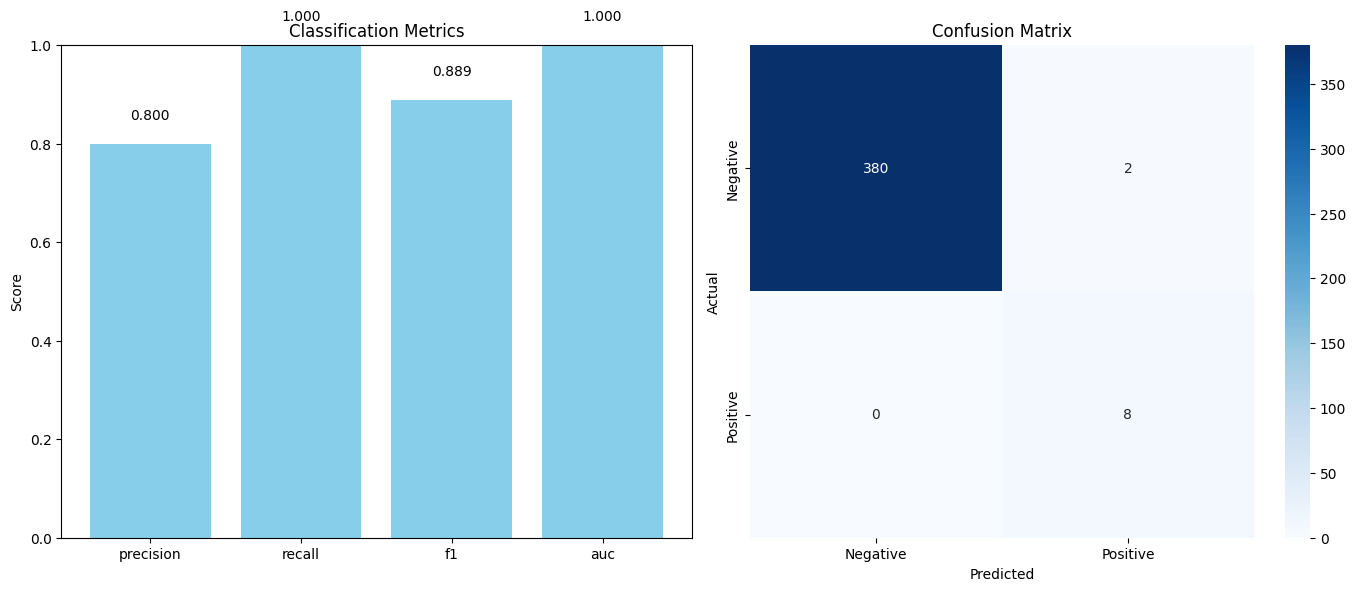

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pytorch_forecasting import TimeSeriesDataSet

def evaluate_binary_classification_model(model, validation_dataloader, actual_data=None):
    """
    Evaluate a binary classification model using standard metrics

    Args:
        model: The trained PyTorch Lightning model
        validation_dataloader: DataLoader for validation data
        actual_data: Optional DataFrame with actual values for comparison

    Returns:
        Dictionary with evaluation metrics and prediction results
    """
    # Set model to evaluation mode
    model.eval()

    # Generate predictions
    with torch.no_grad():
        predictions = []
        targets = []

        for x, y in validation_dataloader:
            # Forward pass
            output = model(x)
            pred = output["prediction"]
            target = y[0]  # Extract target from tuple

            # Store predictions and targets
            predictions.append(pred)
            targets.append(target)

        # Concatenate predictions and targets
        predictions = torch.cat(predictions, dim=0)
        targets = torch.cat(targets, dim=0)

        # Apply sigmoid to get probabilities
        probabilities = torch.sigmoid(predictions)

        # Convert to numpy arrays for sklearn metrics
        # Shape: [batch_size, prediction_length, 1]
        # We need to reshape to [batch_size * prediction_length]
        prob_numpy = probabilities.cpu().numpy().reshape(-1)
        target_numpy = targets.cpu().numpy().reshape(-1)

        # Convert probabilities to binary predictions using 0.5 threshold
        binary_pred = (prob_numpy > 0.5).astype(int)

        # Calculate metrics
        metrics = {
            "precision": precision_score(target_numpy, binary_pred, zero_division=0),
            "recall": recall_score(target_numpy, binary_pred, zero_division=0),
            "f1": f1_score(target_numpy, binary_pred, zero_division=0),
            "auc": roc_auc_score(target_numpy, prob_numpy) if len(np.unique(target_numpy)) > 1 else float('nan')
        }

        # Calculate confusion matrix
        cm = confusion_matrix(target_numpy, binary_pred)

        return {
            "metrics": metrics,
            "confusion_matrix": cm,
            "predictions": predictions,
            "probabilities": probabilities,
            "targets": targets
        }

def extract_predictions_with_metadata(model, prediction_dataset, prediction_dataloader, start_date):
    """
    Extract predictions with category and date information

    Args:
        model: Trained PyTorch Lightning model
        prediction_dataset: TimeSeriesDataSet for predictions
        prediction_dataloader: DataLoader for predictions
        start_date: Reference start date for time index conversion

    Returns:
        DataFrame with predictions and metadata
    """
    # Set model to evaluation mode
    model.eval()

    # Get predictions
    trainer_predictions = model.trainer.predict(model, dataloaders=prediction_dataloader)

    # Extract and process predictions
    raw_predictions = torch.cat([x["prediction"] for x in trainer_predictions], dim=0)
    probabilities = torch.sigmoid(raw_predictions).cpu().numpy()
    binary_predictions = (probabilities > 0.5).astype(int)

    # Get metadata from the prediction dataset
    x, _ = next(iter(prediction_dataset.to_dataloader(train=False, batch_size=len(prediction_dataset))))

    # Get group mappings
    category_mapping = prediction_dataset.categorical_encoders["Category"].classes_

    # Create prediction results
    prediction_results = []

    # Process each sample
    for i in range(probabilities.shape[0]):
        # Get category information
        category_idx = x["groups"][i][0].item()
        category_name = category_mapping[category_idx]

        # Get time indices for this sample
        encoder_time_idx = x["encoder_time_idx"][i][-1].item()  # Last encoder time index

        # Process each prediction step
        for j in range(probabilities.shape[1]):
            # Calculate the date for this prediction step
            time_idx = encoder_time_idx + j + 1
            date = start_date + timedelta(days=time_idx)

            # Get prediction values
            prob = probabilities[i, j, 0]
            binary_pred = binary_predictions[i, j, 0]

            # Store the result
            prediction_results.append({
                'Cluster': category_name,
                'Date': date,
                'time_idx': time_idx,
                'Probability': float(prob),
                'Predicted_Occurrence': int(binary_pred)
            })

    # Convert to DataFrame
    results_df = pd.DataFrame(prediction_results)
    return results_df

def visualize_evaluation_results(evaluation_results):
    """
    Visualize evaluation metrics and confusion matrix

    Args:
        evaluation_results: Dictionary with evaluation metrics
    """
    metrics = evaluation_results["metrics"]
    cm = evaluation_results["confusion_matrix"]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot metrics
    metric_names = list(metrics.keys())
    metric_values = [metrics[m] for m in metric_names]

    ax1.bar(metric_names, metric_values, color='skyblue')
    ax1.set_ylim(0, 1)
    ax1.set_title('Classification Metrics')
    ax1.set_ylabel('Score')
    for i, v in enumerate(metric_values):
        ax1.text(i, v + 0.05, f'{v:.3f}', ha='center')

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

def evaluate_predictions_by_category(prediction_results, actual_data=None, date_column='Date', category_column='Category', target_column='Payments_Indicator'):
    """
    Evaluate predictions by category

    Args:
        prediction_results: DataFrame with predictions
        actual_data: DataFrame with actual values (optional)
        date_column: Column name for dates
        category_column: Column name for categories
        target_column: Column name for the target variable

    Returns:
        DataFrame with evaluation metrics by category
    """
    if actual_data is None:
        return pd.DataFrame()

    # Ensure date columns are datetime
    prediction_results[date_column] = pd.to_datetime(prediction_results[date_column])
    actual_data[date_column] = pd.to_datetime(actual_data[date_column])

    # Merge predictions with actual data
    merged_data = prediction_results.merge(
        actual_data[[date_column, category_column, target_column]],
        on=[date_column, category_column],
        how='inner'
    )

    # Calculate metrics by category
    categories = merged_data[category_column].unique()
    category_metrics = []

    for category in categories:
        cat_data = merged_data[merged_data[category_column] == category]

        # Skip categories with insufficient data
        if len(cat_data) < 10 or cat_data[target_column].nunique() < 2:
            continue

        # Calculate metrics
        precision = precision_score(cat_data[target_column], cat_data['Predicted_Occurrence'], zero_division=0)
        recall = recall_score(cat_data[target_column], cat_data['Predicted_Occurrence'], zero_division=0)
        f1 = f1_score(cat_data[target_column], cat_data['Predicted_Occurrence'], zero_division=0)

        try:
            auc = roc_auc_score(cat_data[target_column], cat_data['Probability'])
        except:
            auc = np.nan

        category_metrics.append({
            'Cluster': category,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'AUC': auc,
            'Count': len(cat_data)
        })

    return pd.DataFrame(category_metrics).sort_values('F1', ascending=False)

# Example usage:

# 1. First, evaluate model performance on validation data
def evaluate_model_pipeline(model, validation_dataset, validation_dataloader, test_data=None):
    """
    Complete pipeline for model evaluation and prediction extraction

    Args:
        model: Trained PyTorch Lightning model
        validation_dataset: TimeSeriesDataSet for validation
        validation_dataloader: DataLoader for validation
        start_date: Reference start date for time index conversion
        test_data: Optional DataFrame with test data for comparison

    Returns:
        Tuple of (evaluation_results, prediction_results)
    """
    # Evaluate model performance
    print("Evaluating model performance...")
    evaluation_results = evaluate_binary_classification_model(model, validation_dataloader)

    print(f"Model Performance Metrics:")
    for metric, value in evaluation_results["metrics"].items():
        print(f"- {metric}: {value:.4f}")

    # # Extract predictions with metadata
    # print("\nExtracting predictions with metadata...")
    # prediction_results = extract_predictions_with_metadata(
    #     model, validation_dataset, validation_dataloader, start_date
    # )

    # print(f"Generated {len(prediction_results)} predictions")
    # print(f"Sample predictions:")
    # print(prediction_results.head())

    # # If test data is provided, evaluate by category
    # if test_data is not None:
    #     print("\nEvaluating predictions by category...")
    #     category_metrics = evaluate_predictions_by_category(prediction_results, test_data)
    #     print("Top performing categories:")
    #     print(category_metrics.head())

    # Visualize evaluation metrics
    visualize_evaluation_results(evaluation_results)

    return evaluation_results, prediction_results

# How to use the functions:

# First, ensure your validation dataset and dataloader are properly set up

# Reference start date (minimum date in your dataset)
# start_date = expense_data_set["Date"].min()  # Recreate this from your time_idx

# Now evaluate the model and extract predictions
evaluation_results, prediction_results = evaluate_model_pipeline(
    best_model_lightning_occurrence,
    validation_data_occurrence,
    val_dataloader_occurrence,
    test_data=df  # Optional: provide actual data for comparison
)


In [ ]:
import optuna
from optuna.trial import FrozenTrial

study_amount = optuna.create_study(direction="minimize")
trial = optuna.trial.create_trial(
    params={'hidden_size': 45, 'lstm_layers': 1, 'num_attention_heads': 2, 'dropout': 0.14156597253302933, 'learning_rate': 0.0012824300789423305, 'max_epochs': 38},
    distributions={
        'hidden_size': optuna.distributions.IntDistribution(32, 128),
        'lstm_layers': optuna.distributions.IntDistribution(1, 2),
        'num_attention_heads': optuna.distributions.IntDistribution(2, 4),
        'dropout': optuna.distributions.FloatDistribution(0.1, 0.3),
        'learning_rate': optuna.distributions.FloatDistribution(1e-4, 1e-2, log=True),
        'max_epochs': optuna.distributions.IntDistribution(5, 50),
    },
    value=0.0023475656731123504
)
study_amount.add_trial(trial)

[I 2025-07-16 14:36:16,327] A new study created in memory with name: no-name-5692529d-0d0f-4936-b670-4ff8888451d5


In [ ]:
df3 = train_df.copy()

In [ ]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

In [ ]:
df3.drop(columns=['time_idx'])

Date  Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0     2022-09-29       -1       0.0  0.004924  0.000000             0.000000   
1     2022-09-30       -1       0.0  0.004924  0.000000             0.000000   
2     2022-10-01       -1       0.0  0.004924  0.000000             0.000000   
3     2022-10-02       -1       0.0  0.004924  0.000000             0.000000   
4     2022-10-03       -1       0.0  0.004924  0.000000             0.000000   
...          ...      ...       ...       ...       ...                  ...   
10733 2024-12-28       11       0.0  0.004388  0.015534             0.137615   
10734 2024-12-29       11       0.0  0.004388  0.000000             0.139450   
10735 2024-12-30       11       0.0  0.004388  0.000000             0.141284   
10736 2024-12-31       11       0.0  0.005035  0.178808             0.143119   
10737 2025-01-01       11       0.0  0.005035  0.000000             0.144954   

       Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0               0.000000         0.000000                0.0       0.433884   
1               0.000000         0.000000                0.0      -0.433884   
2               0.000000         0.000000                0.0      -0.974928   
3               0.000000         0.000000                0.0      -0.781831   
4               0.000000         0.000000                0.0       0.000000   
...                  ...              ...                ...            ...   
10733           0.144922         0.161556                0.0      -0.974928   
10734           0.144922         0.161556                0.0      -0.781831   
10735           0.144922         0.161556                0.0       0.000000   
10736           0.144922         0.161556                0.0       0.781831   
10737           0.144922         0.161556                0.0       0.974928   

       DayOfWeek_cos     Month_sin     Month_cos  Transaction_Happened  
0          -0.900969 -1.000000e+00 -1.836970e-16                     0  
1          -0.900969 -1.000000e+00 -1.836970e-16                     0  
2          -0.222521 -8.660254e-01  5.000000e-01                     0  
3           0.623490 -8.660254e-01  5.000000e-01                     0  
4           1.000000 -8.660254e-01  5.000000e-01                     0  
...              ...           ...           ...                   ...  
10733      -0.222521 -2.449294e-16  1.000000e+00                     0  
10734       0.623490 -2.449294e-16  1.000000e+00                     0  
10735       1.000000 -2.449294e-16  1.000000e+00                     0  
10736       0.623490 -2.449294e-16  1.000000e+00                     0  
10737      -0.222521  5.000000e-01  8.660254e-01                     0  

[10738 rows x 14 columns]

In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Cluster'] = df3['Cluster'].astype(str)
df3 = df3.sort_values(by=['Cluster', 'Date'])
# Create integer time index (e.g., days since the first date)
df3['time_idx'] = (
    df3['Date'] - df3['Date'].min()
).dt.days
df3=df3.drop(columns=['Date'])

In [ ]:
df4 = train_df.copy()

In [ ]:
df4.drop(columns=['time_idx'])

Date  Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0     2022-09-29       -1       0.0  0.004924  0.000000             0.000000   
1     2022-09-30       -1       0.0  0.004924  0.000000             0.000000   
2     2022-10-01       -1       0.0  0.004924  0.000000             0.000000   
3     2022-10-02       -1       0.0  0.004924  0.000000             0.000000   
4     2022-10-03       -1       0.0  0.004924  0.000000             0.000000   
...          ...      ...       ...       ...       ...                  ...   
10733 2024-12-28       11       0.0  0.004388  0.015534             0.137615   
10734 2024-12-29       11       0.0  0.004388  0.000000             0.139450   
10735 2024-12-30       11       0.0  0.004388  0.000000             0.141284   
10736 2024-12-31       11       0.0  0.005035  0.178808             0.143119   
10737 2025-01-01       11       0.0  0.005035  0.000000             0.144954   

       Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days  DayOfWeek_sin  \
0               0.000000         0.000000                0.0       0.433884   
1               0.000000         0.000000                0.0      -0.433884   
2               0.000000         0.000000                0.0      -0.974928   
3               0.000000         0.000000                0.0      -0.781831   
4               0.000000         0.000000                0.0       0.000000   
...                  ...              ...                ...            ...   
10733           0.144922         0.161556                0.0      -0.974928   
10734           0.144922         0.161556                0.0      -0.781831   
10735           0.144922         0.161556                0.0       0.000000   
10736           0.144922         0.161556                0.0       0.781831   
10737           0.144922         0.161556                0.0       0.974928   

       DayOfWeek_cos     Month_sin     Month_cos  Transaction_Happened  
0          -0.900969 -1.000000e+00 -1.836970e-16                     0  
1          -0.900969 -1.000000e+00 -1.836970e-16                     0  
2          -0.222521 -8.660254e-01  5.000000e-01                     0  
3           0.623490 -8.660254e-01  5.000000e-01                     0  
4           1.000000 -8.660254e-01  5.000000e-01                     0  
...              ...           ...           ...                   ...  
10733      -0.222521 -2.449294e-16  1.000000e+00                     0  
10734       0.623490 -2.449294e-16  1.000000e+00                     0  
10735       1.000000 -2.449294e-16  1.000000e+00                     0  
10736       0.623490 -2.449294e-16  1.000000e+00                     0  
10737      -0.222521  5.000000e-01  8.660254e-01                     0  

[10738 rows x 14 columns]

In [ ]:
occurrence_lookup = {
    (row['Date'].date(), row['Cluster']): row['Predicted_Occurrence']
    for row in prediction_results
}
print(occurrence_lookup)

{(datetime.date(2025, 1, 2), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 3), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 4), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 5), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 6), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 7), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 8), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 9), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 10), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 11), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 12), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 13), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 14), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 15), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 16), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 17), np.str_('-1')): np.int32(0), (datetime.date(2025, 1, 18), np.str_('-1')): np.int32(0), (datetime.date(2025, 

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10738 non-null  datetime64[ns]
 1   Cluster               10738 non-null  int64         
 2   Receipts              10738 non-null  float64       
 3   Balance               10738 non-null  float64       
 4   Payments              10738 non-null  float64       
 5   Days_Since_Last_Txn   10738 non-null  float64       
 6   Total_Past_3_Txns     10738 non-null  float64       
 7   Avg_Past_3_Txns       10738 non-null  float64       
 8   Txns_Past_60_Days     10738 non-null  float64       
 9   DayOfWeek_sin         10738 non-null  float64       
 10  DayOfWeek_cos         10738 non-null  float64       
 11  Month_sin             10738 non-null  float64       
 12  Month_cos             10738 non-null  float64       
 13  Transaction_Happ

In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'])

In [ ]:
df4['Cluster'] = df4['Cluster'].astype(str)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, 0 to 9085
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cluster               10738 non-null  object 
 1   Receipts              10738 non-null  float64
 2   Balance               10738 non-null  float64
 3   Payments              10738 non-null  float64
 4   Days_Since_Last_Txn   10738 non-null  float64
 5   Total_Past_3_Txns     10738 non-null  float64
 6   Avg_Past_3_Txns       10738 non-null  float64
 7   Txns_Past_60_Days     10738 non-null  float64
 8   DayOfWeek_sin         10738 non-null  float64
 9   DayOfWeek_cos         10738 non-null  float64
 10  Month_sin             10738 non-null  float64
 11  Month_cos             10738 non-null  float64
 12  Transaction_Happened  10738 non-null  int64  
 13  time_idx              10738 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.data.encoders import EncoderNormalizer

# --- TFT Pipeline 2: Amount Prediction ---

class NonZeroLossAmount(nn.Module):
    def __init__(self,zero_weight=1,pos_weight=95):
        super().__init__()
        self.mse = nn.MSELoss(reduction='none')
        self.zero_weight = zero_weight
        self.pos_weight = pos_weight

    def forward(self, y_pred, y_true):
        element_wise_mse = self.mse(y_pred, y_true)

        # Create masks for zero and non-zero values
        zero_mask = (y_true == 0).float()
        non_zero_mask = (y_true > 0).float()

        # Weight the losses differently
        weighted_zero_loss = self.zero_weight * torch.mean(element_wise_mse * zero_mask)
        weighted_non_zero_loss = self.pos_weight * torch.mean(element_wise_mse * non_zero_mask)

        # Combine the losses
        total_loss = weighted_zero_loss + weighted_non_zero_loss
        return total_loss

continuous_features_amount = continuous_features_amount =['Transaction_Happened','Balance','Days_Since_Last_Txn','Total_Past_3_Txns', 'Avg_Past_3_Txns', 'Txns_Past_60_Days']

scaler = MinMaxScaler()

# Apply min-max scaling to the continuous features
# expense_data_set_amount[continuous_features_amount] = scaler.fit_transform(
#     expense_data_set_amount[continuous_features_amount]
# )

def min_max_scaling(group):
    min_vals = group.min()
    max_vals = group.max()
    range_vals = max_vals - min_vals
    # Avoid division by zero
    if np.isscalar(range_vals):
        if range_vals == 0:
            range_vals = 1
    else:
        range_vals[range_vals == 0] = 1
    return (group - min_vals) / range_vals

group_column = "Cluster"
df3[continuous_features_amount] = (
    df3.groupby(group_column)[continuous_features_amount]
    .transform(min_max_scaling)
)

# Create TimeSeriesDataSet for amount prediction
training_data_amount = TimeSeriesDataSet(
    df3,
    time_idx="time_idx",
    target="Receipts",
    group_ids=["Cluster"],
    static_categoricals=["Cluster"],
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=continuous_features_amount,
    # target_normalizer=GroupNormalizer(groups=["Cluster"]),
    scalers=None,
    max_encoder_length=90,
    max_prediction_length=30,
)
print("target normalizer :",training_data_amount.target_normalizer)
validation_data_amount = TimeSeriesDataSet.from_dataset(
    training_data_amount,
    df3,
    predict=True,
    stop_randomization=True,
)

train_dataloader_amount = training_data_amount.to_dataloader(train=True, batch_size=64)
val_dataloader_amount = validation_data_amount.to_dataloader(train=False, batch_size=64)

# --- Hyperparameter Optimization for Amount Prediction ---
def objective_amount(trial):
    hidden_size = trial.suggest_int("hidden_size", 32, 128)
    lstm_layers = trial.suggest_int("lstm_layers", 1, 2)
    num_attention_heads = trial.suggest_int("num_attention_heads", 2, 4)
    dropout = trial.suggest_float("dropout", 0.1, 0.3)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    max_epochs = trial.suggest_int("max_epochs", 5, 500) # Tune max epochs

    num_positive_amount = df3['Transaction_Happened'].sum()
    num_negative_amount = len(df3) - num_positive_amount
    pos_weight_amount = torch.tensor([num_negative_amount / (num_positive_amount + 1e-6)])

    class TFTLightningModuleAmount(pl.LightningModule):
        def __init__(self, model, learning_rate,pos_weight_amount,max_prediction_length):
            super().__init__()
            self.model = model
            self.learning_rate = learning_rate
            self.pos_weight_amount=pos_weight_amount
            self.loss_fn = NonZeroLossAmount(1,pos_weight=self.pos_weight_amount)
            self.max_prediction_length = max_prediction_length

        def forward(self, x):
            return self.model(x)

        def predict_step(self, batch, batch_idx):
            x, y = batch  # Unpack the batch tuple
            return {"prediction": self(x)["prediction"]}

        def training_step(self, batch, batch_idx):
            x, y = batch
            y_hat = self(x)["prediction"]  # properly extract predictions
            target = y[0].type(torch.FloatTensor)
            # Adjust shapes to match
            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]
            loss = self.loss_fn(y_hat, target)
            #self.log("train_loss", loss)
            self.log("train_loss", loss, prog_bar=True, logger=True)

            # # Print progress
            # if batch_idx % 10 == 0:  # print every 10 batches
            #     print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
            #     print(f"Epoch {self.current_epoch}")
            return loss

        def validation_step(self, batch, batch_idx):
            x, y = batch

            y_hat = self(x)["prediction"]

            target = y[0].type(torch.FloatTensor)

            y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
            target = target[:, -self.max_prediction_length:]

            loss = self.loss_fn(y_hat, target)
            self.log("val_loss", loss, prog_bar=True)
            # if batch_idx % 10 == 0:  # print every 10 batches
            #     print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
            return loss

        def configure_optimizers(self):
            return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

        def predict_with_uncertainty(self, dataloader, num_samples=30):
            self.model.train()  # Set to train mode to enable dropout

            # Store all batch predictions
            all_predictions = []
            all_x_data = []

            # First, collect all input batches to reuse them
            for x, _ in dataloader:
                all_x_data.append(x)

            # For each MC sample
            for sample_idx in range(num_samples):
                batch_predictions = []

                # Process each batch
                for x in all_x_data:
                    with torch.no_grad():
                        output = self(x)
                        batch_predictions.append(output["prediction"])

                # Concatenate all batches for this MC sample
                sample_predictions = torch.cat(batch_predictions, dim=0)
                all_predictions.append(sample_predictions.detach().cpu().numpy())

            # Stack all samples - shape will be [num_samples, total_samples, prediction_length, output_size]
            all_predictions = np.stack(all_predictions)

            # Compute statistics across the sample dimension (axis=0)
            mean_predictions = np.mean(all_predictions, axis=0)
            lower_bounds = np.percentile(all_predictions, 10, axis=0)
            upper_bounds = np.percentile(all_predictions, 90, axis=0)
            uncertainties = upper_bounds - lower_bounds

            return {
                "prediction": mean_predictions,
                "lower_bound": lower_bounds,
                "upper_bound": upper_bounds,
                "uncertainty": uncertainties,
                "x_data": all_x_data  # Return this to access metadata later
            }

        def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
            """
            Provides detailed feature importance for a specific prediction horizon.
            This function specifically targets a single day in the forecast.

            Args:
                x: Input data dictionary with model inputs
                category_name: Name of the category being predicted
                feature_names: List of feature names corresponding to the input features
                horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)

            Returns:
                Dictionary with explanation details specific to that horizon
            """
            # Put model in eval mode
            self.model.eval()

            # Debug info
            print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")

            try:
                with torch.no_grad():
                    # Forward pass
                    outputs = self.model(x)

                    # Get interpretation data specifically for this horizon
                    interp_data = self.model.interpret_output(
                        outputs,
                        reduction="none",
                        attention_prediction_horizon=horizon_index
                    )

                    # Extract raw importance values
                    encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                    decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]

                    # For encoder importances, average across all encoder time steps
                    if encoder_variables.ndim == 0:
                        encoder_avg = np.array([float(encoder_variables)])
                    elif encoder_variables.ndim == 1:
                        encoder_avg = encoder_variables
                    else:
                        encoder_avg = np.mean(encoder_variables, axis=0)

                    # For decoder importances, focus on the specific horizon we're interested in
                    if decoder_variables.ndim == 0:
                        decoder_importance = np.array([float(decoder_variables)])
                    elif decoder_variables.ndim == 1:
                        decoder_importance = decoder_variables
                    else:
                        # If we can extract the specific horizon's importance, do that
                        if horizon_index < decoder_variables.shape[0]:
                            decoder_importance = decoder_variables[horizon_index]
                        else:
                            # Otherwise use the last available horizon
                            decoder_importance = decoder_variables[-1]

                        # Convert scalar to array if needed
                        if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                            decoder_importance = np.array([float(decoder_importance)])

                    # Process arrays to ensure they have proper dimensions
                    if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                        encoder_avg = np.array([float(encoder_avg)])

                    if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])

                    # Ensure dimensions align
                    feature_count = len(feature_names)
                    encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                    decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1

                    min_features = min(encoder_count, decoder_count, feature_count)

                    # Truncate to matching dimensions
                    encoder_avg = encoder_avg[:min_features]
                    decoder_importance = decoder_importance[:min_features]
                    features_used = feature_names[:min_features]

                    # Calculate combined importance - weight decoder more heavily for binary classification
                    combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance

                    # Normalize to get percentages
                    total = np.sum(combined_importance)
                    if total > 0:
                        combined_importance = combined_importance / total

                    # Create feature importance dictionary
                    feature_importance = dict(zip(features_used, combined_importance))

                    # Sort features by importance
                    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

                    # Return the explanation details
                    return {
                        "all_features": dict(sorted_features),
                        "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                        "raw_encoder_importance": encoder_avg.tolist(),
                        "raw_decoder_importance": decoder_importance.tolist(),
                        "is_valid": True
                    }

            except Exception as e:
                print(f"Error in explain_prediction_for_horizon: {e}")
                import traceback
                traceback.print_exc()

                # Return a fallback explanation
                return {
                    "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                    "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                    "is_valid": False,
                    "error": str(e)
                }
    modelamount = TemporalFusionTransformer.from_dataset(
        training_data_amount,
        output_size=1,
        hidden_size=hidden_size,
        lstm_layers=lstm_layers,
        attention_head_size=num_attention_heads,
        dropout=dropout,
        learning_rate=learning_rate,
    )
    lightning_model_amount = TFTLightningModuleAmount(modelamount,learning_rate,pos_weight_amount,training_data_amount.max_prediction_length)
    early_stopping_callback_amount = EarlyStopping(monitor="val_loss", patience=5, mode="min")
    callbacks_amount = [early_stopping_callback_amount]

    trainer = pl.Trainer(
        max_epochs=max_epochs,
        accelerator="auto",
        callbacks=callbacks_amount,
        logger=TensorBoardLogger("lightning_logs", name="tft_amount_optuna"),
    )

    trainer.fit(lightning_model_amount, train_dataloaders=train_dataloader_amount, val_dataloaders=val_dataloader_amount)
    # val_loss = trainer.validate(lightning_model, dataloaders=val_dataloader_occurrence, verbose=False)['val_loss']
    validation_results = trainer.validate(lightning_model_amount, dataloaders=val_dataloader_amount, verbose=False)
    val_loss = validation_results[0]['val_loss']
    return val_loss

study_amount = optuna.create_study(direction="minimize")
study_amount.optimize(objective_amount, n_trials=1) # Adjust n_trials as needed

print("\nAmount Prediction Optimization Results:")
print(f"Best trial value: {study_amount.best_trial.value}")
print(f"Best trial params: {study_amount.best_trial.params}")

[I 2025-07-16 14:36:38,443] A new study created in memory with name: no-name-4cba97e9-a898-49fc-a62b-03594cd19273
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.or

target normalizer : EncoderNormalizer(
	method='standard',
	center=True,
	max_length=None,
	transformation=None,
	method_kwargs={}
)


INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type                      | Params | Mode 
--------------------------------------------------------------
0 | model   | TemporalFusionTransformer | 559 K  | train
1 | loss_fn | NonZeroLossAmount         | 0      | train
--------------------------------------------------------------
559 K     Trainable params
0         Non-trainable params
559 K     Total params
2.237     Total estimated model params size (MB)
400       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-07-16 15:03:38,339] Trial 0 finished with value: 0.004686601680930122 and parameters: {'hidden_size': 88, 'lstm_layers': 2, 'num_attention_heads': 2, 'dropout': 0.16327178501217468, 'learning_rate': 0.002036172888889807, 'max_epochs': 170}. Best is trial 0 with value: 0.004686601680930122.



Amount Prediction Optimization Results:
Best trial value: 0.004686601680930122
Best trial params: {'hidden_size': 88, 'lstm_layers': 2, 'num_attention_heads': 2, 'dropout': 0.16327178501217468, 'learning_rate': 0.002036172888889807, 'max_epochs': 170}


In [ ]:
import numpy as np

df4['time_idx'] = (
    df4['Date'] - df4['Date'].min()
).dt.days

last_date_amount = df4['Date'].max()

# Get the list of unique categories in order of appearance
last_day_categories_amount = df4[df4['Date'] == last_date_amount]['Cluster'].tolist()

# Create future dates
future_dates_amount = pd.date_range(start=last_date_amount + pd.Timedelta(days=1), periods=30)

# Create future data with the same categories repeating
future_data_amount = []

for date in future_dates_amount:
    for category in last_day_categories_amount:
        # Get the last row for this category to copy some values
        last_category_row = df4[df4['Cluster'] == category].iloc[-1]
        predicted_occurrence = occurrence_lookup.get((date.date(), category), 0)

        if not matching_row.empty:
          balance = matching_row.iloc[0]['Balance']
          payments = matching_row.iloc[0]['Payments']
        else:
          balance = np.nan  # or 0 or some default
          payments = np.nan

        future_data_amount.append({
            'Date': date,
            # 'Category': category,
            'Cluster': last_category_row['Cluster'],  # Keep original Cluster
            'time_idx': df4['time_idx'].max() + (date - last_date_amount).days,
            'DayOfWeek_sin': np.sin(date.dayofweek * (2 * np.pi / 7)),
            'DayOfWeek_cos': np.cos(date.dayofweek * (2 * np.pi / 7)),
            'Month_sin': np.sin(date.month * (2 * np.pi / 12)),
            'Month_cos': np.cos(date.month * (2 * np.pi / 12)),
            'Transaction_Happened': predicted_occurrence,
            'Balance': balance,
            'Payments': payments
        })

# Create dataframe with future data
future_df_amount = pd.DataFrame(future_data_amount)
# Create mapping for result usage
time_idx_to_date_amount = future_df_amount[['time_idx', 'Date']].drop_duplicates().set_index('time_idx')['Date'].to_dict()

# Combine with historical data
prediction_data_amount = pd.concat([df4, future_df_amount], ignore_index=True)
# prediction_data_amount=prediction_data_amount.drop(columns=['Date'])
print(prediction_data_amount)

            Date Cluster  Receipts   Balance  Payments  Days_Since_Last_Txn  \
0     2022-09-29      -1       0.0  0.004924  0.000000                  0.0   
1     2022-09-30      -1       0.0  0.004924  0.000000                  0.0   
2     2022-10-01      -1       0.0  0.004924  0.000000                  0.0   
3     2022-10-02      -1       0.0  0.004924  0.000000                  0.0   
4     2022-10-03      -1       0.0  0.004924  0.000000                  0.0   
...          ...     ...       ...       ...       ...                  ...   
11123 2025-01-31       7       NaN  0.058577  0.369751                  NaN   
11124 2025-01-31       8       NaN  0.058577  0.369751                  NaN   
11125 2025-01-31       9       NaN  0.058577  0.369751                  NaN   
11126 2025-01-31      10       NaN  0.058577  0.369751                  NaN   
11127 2025-01-31      11       NaN  0.058577  0.369751                  NaN   

       Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Pas

In [ ]:
prediction_data_amount=prediction_data_amount.drop(columns=['Date'])

In [ ]:
print(df['Transaction_Happened'].sum())

192


In [ ]:
num_positive_amount = df['Transaction_Happened'].sum()
num_negative_amount = len(df) - num_positive_amount
pos_weight_amount = torch.tensor([num_negative_amount / (num_positive_amount + 1e-6)])

# # Train the best model
best_model_amount = TemporalFusionTransformer.from_dataset(
     training_data_amount,
     output_size=1,
     **{k: v for k, v in study_amount.best_trial.params.items() if k not in ['max_epochs', 'num_attention_heads']},  # Exclude num_attention_heads
     attention_head_size=study_amount.best_trial.params.get('num_attention_heads', 4)
)

class BestModelAmountLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate,pos_weight_amount,max_prediction_length):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.pos_weight_amount=pos_weight_amount
        self.loss_fn = NonZeroLossAmount(1,pos_weight=self.pos_weight_amount)
        self.max_prediction_length = max_prediction_length


    def forward(self, x):
        return self.model(x)



    def predict_step(self, batch, batch_idx):
        x, y = batch  # Unpack the batch tuple
        return {"prediction": self(x)["prediction"]}



    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)["prediction"]  # properly extract predictions
        target = y[0].type(torch.FloatTensor)
        # Adjust shapes to match
        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]
        loss = self.loss_fn(y_hat, target)
        #self.log("train_loss", loss)
        self.log("train_loss", loss, prog_bar=True, logger=True)

        # Print progress
        # if batch_idx % 10 == 0:  # print every 10 batches
        #     print(f"Training batch {batch_idx}, loss: {loss.item():.4f}")
        #     print(f"Epoch {self.current_epoch}")
        return loss


    def validation_step(self, batch, batch_idx):
        x, y = batch

        y_hat = self(x)["prediction"]

        target = y[0].type(torch.FloatTensor)

        y_hat = y_hat[:, -self.max_prediction_length:, :].squeeze(-1)
        target = target[:, -self.max_prediction_length:]

        loss = self.loss_fn(y_hat, target)
        self.log("val_loss", loss, prog_bar=True)
        # if batch_idx % 10 == 0:  # print every 10 batches
        #     print(f"Validation batch {batch_idx}, loss: {loss.item():.4f}")
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    def predict_with_uncertainty(self, dataloader, num_samples=30):
        self.model.train()  # Set to train mode to enable dropout

        # Store all batch predictions
        all_predictions = []
        all_x_data = []

        # First, collect all input batches to reuse them
        for x, _ in dataloader:
            all_x_data.append(x)

        # For each MC sample
        for sample_idx in range(num_samples):
            batch_predictions = []

            # Process each batch
            for x in all_x_data:
                with torch.no_grad():
                    output = self(x)
                    batch_predictions.append(output["prediction"])

            # Concatenate all batches for this MC sample
            sample_predictions = torch.cat(batch_predictions, dim=0)
            all_predictions.append(sample_predictions.detach().cpu().numpy())

        # Stack all samples - shape will be [num_samples, total_samples, prediction_length, output_size]
        all_predictions = np.stack(all_predictions)

        # Compute statistics across the sample dimension (axis=0)
        mean_predictions = np.mean(all_predictions, axis=0)
        lower_bounds_10 = np.percentile(all_predictions, 10, axis=0)
        upper_bounds_90 = np.percentile(all_predictions, 90, axis=0)
        uncertainties_80 = lower_bounds_10 - upper_bounds_90


        return {
            "prediction": mean_predictions,
            "lower_bound": lower_bounds_10,
            "upper_bound": upper_bounds_90,
            "uncertainty": uncertainties_80,
            "x_data": all_x_data  # Return this to access metadata later
        }
    def explain_prediction_for_horizon(self, x, category_name, feature_names, horizon_index):
        """
        Provides detailed feature importance for a specific prediction horizon.
        This function specifically targets a single day in the forecast.

        Args:
            x: Input data dictionary with model inputs
            category_name: Name of the category being predicted
            feature_names: List of feature names corresponding to the input features
            horizon_index: The specific day/horizon to explain (0-29 for a 30-day forecast)

        Returns:
            Dictionary with explanation details specific to that horizon
        """
        # Put model in eval mode
        self.model.eval()

        # Debug info
        print(f"\nGenerating explanation for {category_name}, horizon {horizon_index}")

        try:
            with torch.no_grad():
                # Forward pass
                outputs = self.model(x)

                # Get interpretation data specifically for this horizon
                interp_data = self.model.interpret_output(
                    outputs,
                    reduction="none",
                    attention_prediction_horizon=horizon_index
                )

                # Extract raw importance values
                encoder_variables = interp_data["encoder_variables"].detach().cpu().numpy()[0]
                decoder_variables = interp_data["decoder_variables"].detach().cpu().numpy()[0]

                # For encoder importances, average across all encoder time steps
                if encoder_variables.ndim == 0:
                    encoder_avg = np.array([float(encoder_variables)])
                elif encoder_variables.ndim == 1:
                    encoder_avg = encoder_variables
                else:
                    encoder_avg = np.mean(encoder_variables, axis=0)

                # For decoder importances, focus on the specific horizon we're interested in
                if decoder_variables.ndim == 0:
                    decoder_importance = np.array([float(decoder_variables)])
                elif decoder_variables.ndim == 1:
                    decoder_importance = decoder_variables
                else:
                    # If we can extract the specific horizon's importance, do that
                    if horizon_index < decoder_variables.shape[0]:
                        decoder_importance = decoder_variables[horizon_index]
                    else:
                        # Otherwise use the last available horizon
                        decoder_importance = decoder_variables[-1]

                    # Convert scalar to array if needed
                    if np.isscalar(decoder_importance) or decoder_importance.ndim == 0:
                        decoder_importance = np.array([float(decoder_importance)])

                # Process arrays to ensure they have proper dimensions
                if isinstance(encoder_avg, (np.float32, np.float64)) or encoder_avg.ndim == 0:
                    encoder_avg = np.array([float(encoder_avg)])

                if isinstance(decoder_importance, (np.float32, np.float64)) or decoder_importance.ndim == 0:
                    decoder_importance = np.array([float(decoder_importance)])

                # Ensure dimensions align
                feature_count = len(feature_names)
                encoder_count = len(encoder_avg) if hasattr(encoder_avg, '__len__') else 1
                decoder_count = len(decoder_importance) if hasattr(decoder_importance, '__len__') else 1

                min_features = min(encoder_count, decoder_count, feature_count)

                # Truncate to matching dimensions
                encoder_avg = encoder_avg[:min_features]
                decoder_importance = decoder_importance[:min_features]
                features_used = feature_names[:min_features]

                # Calculate combined importance - weight decoder more heavily for binary classification
                combined_importance = 0.4 * encoder_avg + 0.6 * decoder_importance

                # Normalize to get percentages
                total = np.sum(combined_importance)
                if total > 0:
                    combined_importance = combined_importance / total

                # Create feature importance dictionary
                feature_importance = dict(zip(features_used, combined_importance))

                # Sort features by importance
                sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

                # Return the explanation details
                return {
                    "all_features": dict(sorted_features),
                    "top_features": dict(sorted_features[:3]) if len(sorted_features) >= 3 else dict(sorted_features),
                    "raw_encoder_importance": encoder_avg.tolist(),
                    "raw_decoder_importance": decoder_importance.tolist(),
                    "is_valid": True
                }

        except Exception as e:
            print(f"Error in explain_prediction_for_horizon: {e}")
            import traceback
            traceback.print_exc()

            # Return a fallback explanation
            return {
                "all_features": {feature: 1.0/len(feature_names) for feature in feature_names},
                "top_features": {feature: 1.0/len(feature_names) for feature in feature_names[:3]},
                "is_valid": False,
                "error": str(e)
            }
best_model_lightning_amount = BestModelAmountLightningModule(
     best_model_amount, study_amount.best_trial.params.get('learning_rate', 1e-3), pos_weight_amount, training_data_amount.max_prediction_length
 )
early_stopping_callback_amount_best = EarlyStopping(monitor="val_loss", patience=10, mode="min")
checkpoint_callback_amount = ModelCheckpoint(monitor="val_loss", save_top_k=1, save_weights_only=True, dirpath="./checkpoints_amount", filename="best_model_amount")
callbacks_amount_best = [early_stopping_callback_amount_best, checkpoint_callback_amount]

trainer_amount = pl.Trainer(
     max_epochs=study_amount.best_trial.params.get("max_epochs", 46),
     accelerator="auto",
     callbacks=callbacks_amount_best,
     logger=TensorBoardLogger("lightning_logs", name="tft_amount_best"),
 )
trainer_amount.fit(best_model_lightning_amount, train_dataloaders=train_dataloader_amount, val_dataloaders=val_dataloader_amount)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:658

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

########################## best_model_lightning_amount_loaded  #############################

In [ ]:
best_model_lightning_amount_loaded = BestModelAmountLightningModule.load_from_checkpoint(
    checkpoint_path="/content/checkpoints_amount/best_model_amount-v1.ckpt",
    model=best_model_amount,  # you must rebuild this with the same args as during training
    learning_rate=study_amount.best_trial.params.get('learning_rate', 1e-3),
    pos_weight_amount=pos_weight_amount,
    max_prediction_length=training_data_amount.max_prediction_length
)
best_model_lightning_amount_loaded.eval()
best_model_lightning_amount_loaded.freeze()

In [ ]:
print(prediction_data_amount.columns)

Index(['Cluster', 'Receipts', 'Balance', 'Payments', 'Days_Since_Last_Txn',
       'Total_Past_3_Txns', 'Avg_Past_3_Txns', 'Txns_Past_60_Days',
       'DayOfWeek_sin', 'DayOfWeek_cos', 'Month_sin', 'Month_cos',
       'Transaction_Happened', 'time_idx'],
      dtype='object')


In [ ]:
prediction_data_amount = prediction_data_amount.fillna(0)

prediction_dataset_amount = TimeSeriesDataSet.from_dataset(
    training_data_amount,
    prediction_data_amount,
    predict=True,
    stop_randomization=True,

)

# Create dataloader for predictions
prediction_dataloader_amount = prediction_dataset_amount.to_dataloader(train=False, batch_size=64)

# # Generate amount predictions (using best model)
# best_model_lightning_amount.eval()
best_model_lightning_amount_loaded.eval()
# predictions_amount = trainer_amount.predict(best_model_lightning_amount, dataloaders=prediction_dataloader_amount)
predictions_amount = trainer_amount.predict(best_model_lightning_amount_loaded, dataloaders=prediction_dataloader_amount)
prediction_values_amount = torch.cat([output["prediction"] for output in predictions_amount])

prediction_results_amount = []
x, y = next(iter(prediction_dataset_amount.to_dataloader(train=False, batch_size=len(prediction_dataset_amount))))



category_encoder = prediction_dataset_amount.get_parameters()["categorical_encoders"]["Cluster"]

for i in range(prediction_values_amount.shape[0]):
    category_id = x["groups"][i][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    time_indices = x["decoder_time_idx"][i].cpu().numpy()
    instance_preds = prediction_values_amount[i, :, 0].detach().cpu().numpy()  # Note: no int()

    for j, time_idx in enumerate(time_indices):
        date = time_idx_to_date_amount.get(time_idx.item())
        if date and date > last_date_amount:
            prediction_results_amount.append({
                'Cluster': category_name,
                'Date': date,
                'time_idx': time_idx.item(),
                'Predicted_Payment': instance_preds[j]
            })

# for row in prediction_results_amount:
#     print(f"{row['Date'].date()} | {row['Cluster']} | Predicted Payment: {row['Predicted_Payment']:.2f}", row["time_idx"])


# print(len(prediction_results_amount))


print("with uncertainty/////////////////////////////////////////////////////////////////////")
# uncertainty_results = best_model_lightning_amount.predict_with_uncertainty(prediction_dataloader_amount)
uncertainty_results = best_model_lightning_amount_loaded.predict_with_uncertainty(prediction_dataloader_amount)

# Access the prediction data
prediction_values_amount = uncertainty_results["prediction"]  # Mean predictions
lower_bounds = uncertainty_results["lower_bound"]
upper_bounds = uncertainty_results["upper_bound"]

# Now process the predictions with uncertainty
prediction_results_amount = []

# Get categorical encoder
category_encoder = prediction_dataset_amount.get_parameters()["categorical_encoders"]["Cluster"]

# Collect all x inputs for metadata
all_x = []
for x_batch in uncertainty_results["x_data"]:
    # Extract batch size
    batch_size = x_batch["groups"].shape[0]
    for i in range(batch_size):
        # Extract just this sample's metadata
        sample_data = {key: val[i:i+1] if isinstance(val, torch.Tensor) else val for key, val in x_batch.items()}
        all_x.append(sample_data)

# Calculate total samples
total_samples = prediction_values_amount.shape[0]

# Process each prediction
for i in range(total_samples):
    # Get this sample's metadata
    x_idx = min(i, len(all_x) - 1)  # Safety check
    x = all_x[x_idx]

    # Get category information
    category_id = x["groups"][0][0].item()
    category_name = category_encoder.inverse_transform(np.array([category_id]))[0]

    # Get time indices
    time_indices = x["decoder_time_idx"][0].cpu().numpy()

    # Get predictions for this sample
    instance_preds = prediction_values_amount[i, :, 0]  # Mean predictions
    instance_lower = lower_bounds[i, :, 0]  # Lower bounds
    instance_upper = upper_bounds[i, :, 0]  # Upper bounds

    # Process each time step
    for j, time_idx in enumerate(time_indices):
        date = time_idx_to_date_amount.get(time_idx.item())
        if date and date > last_date_amount:
            prediction_results_amount.append({
                'Cluster': category_name,
                'Date': date,
                'time_idx': time_idx.item(),
                'Predicted_Payment': instance_preds[j],
                'Lower_Bound': instance_lower[j],
                'Upper_Bound': instance_upper[j],
                'Uncertainty': instance_upper[j] - instance_lower[j],
                'Confidence_Interval': f"{instance_lower[j]:.2f} - {instance_upper[j]:.2f}"
            })

# Print results with uncertainty
for row in prediction_results_amount:
    print(f"{row['Date'].date()} | {row['Cluster']} | " +
          f"Predicted Payment: ${row['Predicted_Payment']:.2f} | " +
          f"80% Confidence Interval: {row['Confidence_Interval']} | " +
          f"Uncertainty: ${row['Uncertainty']:.2f}")


# -------------------------------------------------------------------------------------------

# for i in range(min(10, len(prediction_results_amount))):  # Process a few for demonstration
#     row = prediction_results_amount[i]
#     category_name = row['Category']

#     # Find the corresponding sample from the dataloader
#     x_idx = min(i, len(all_x) - 1)
#     x = all_x[x_idx]

#     # Get feature importance and explanation
#     explanation = best_model_lightning_amount.explain_prediction(
#         x,
#         category_name,
#         feature_names=continuous_features_amount + time_varying_known_reals
#     )

#     # Add explanations to the prediction results
#     prediction_results_amount[i]['Explanation'] = explanation['explanation']
#     prediction_results_amount[i]['Top_Features'] = explanation['top_features']

#     # Print explanation for this prediction
#     print(f"\nExplanation for {category_name} on {row['Date'].date()}:")
#     print(explanation['explanation'])

Predicting: |          | 0/? [00:00<?, ?it/s]

with uncertainty/////////////////////////////////////////////////////////////////////
2025-01-02 | -1 | Predicted Payment: $0.07 | 80% Confidence Interval: 0.04 - 0.11 | Uncertainty: $0.07
2025-01-03 | -1 | Predicted Payment: $0.07 | 80% Confidence Interval: 0.04 - 0.12 | Uncertainty: $0.08
2025-01-04 | -1 | Predicted Payment: $0.04 | 80% Confidence Interval: 0.03 - 0.06 | Uncertainty: $0.03
2025-01-05 | -1 | Predicted Payment: $0.02 | 80% Confidence Interval: 0.01 - 0.04 | Uncertainty: $0.03
2025-01-06 | -1 | Predicted Payment: $0.02 | 80% Confidence Interval: 0.01 - 0.04 | Uncertainty: $0.02
2025-01-07 | -1 | Predicted Payment: $0.02 | 80% Confidence Interval: 0.01 - 0.03 | Uncertainty: $0.02
2025-01-08 | -1 | Predicted Payment: $0.03 | 80% Confidence Interval: 0.02 - 0.05 | Uncertainty: $0.03
2025-01-09 | -1 | Predicted Payment: $0.03 | 80% Confidence Interval: 0.02 - 0.04 | Uncertainty: $0.02
2025-01-10 | -1 | Predicted Payment: $0.05 | 80% Confidence Interval: 0.03 - 0.07 | Uncert

## Balance Denormalization

In [ ]:
import numpy as np

# Step 1: Extract predicted Payments (shape: (n, 1))
pred_scaled = np.array([[row['Predicted_Payment']] for row in prediction_results_amount])

# Step 2: Create dummy input of shape (n, 7)
dummy_input = np.zeros((pred_scaled.shape[0], len(columns_to_scale)))

# Step 3: Insert predicted Payments into correct column index
payment_index = columns_to_scale.index('Payments')
dummy_input[:, payment_index] = pred_scaled[:, 0]

# Step 4: Inverse transform the full dummy input
inverse = scaler10.inverse_transform(dummy_input)

# Step 5: Extract only the denormalized Payments
pred_actual = inverse[:, payment_index]

# Step 6: Add denormalized values back to results
for i, row in enumerate(prediction_results_amount):
    row['Predicted_Payment_Actual'] = float(pred_actual[i])

## Confidence Intervel

In [ ]:
# Step 1: Extract as float array
bounds_scaled = np.array([
    [row['Lower_Bound'], row['Upper_Bound']]
    for row in prediction_results_amount
])

In [ ]:
# Step 2: Create dummy arrays for inverse transform
dummy_low = np.zeros((len(bounds_scaled), len(columns_to_scale)))
dummy_high = np.zeros_like(dummy_low)

payment_index = columns_to_scale.index('Payments')
dummy_low[:, payment_index] = bounds_scaled[:, 0]
dummy_high[:, payment_index] = bounds_scaled[:, 1]

# Step 3: Inverse transform
denorm_low = scaler10.inverse_transform(dummy_low)[:, payment_index]
denorm_high = scaler10.inverse_transform(dummy_high)[:, payment_index]

In [ ]:
# Step 4: Assign back to results
for i, row in enumerate(prediction_results_amount):
    row['Lower_Bound_Actual'] = float(denorm_low[i])
    row['Upper_Bound_Actual'] = float(denorm_high[i])
    row['Confidence_Interval_Actual'] = (row['Lower_Bound_Actual'], row['Upper_Bound_Actual'])
    # row['Uncertainty_Actual'] = row['Upper_Bound_Actual'] - row['Lower_Bound_Actual']

In [ ]:
for row in prediction_results_amount:
    print(f"{row['Date'].date()} | Cluster: {row['Cluster']} | "
          f"Predicted: ${row['Predicted_Payment_Actual']:.2f} | "
          f"80% CI: ({row['Confidence_Interval_Actual'][0]:.2f}, {row['Confidence_Interval_Actual'][1]:.2f}) | "
          f"Uncertainty: ±{row['Uncertainty_Actual']:.2f}")

2025-01-02 | Cluster: -1 | Predicted: $189.39 | 80% CI: (97.82, 290.90) | Uncertainty: ±196.81
2025-01-03 | Cluster: -1 | Predicted: $180.90 | 80% CI: (93.94, 297.88) | Uncertainty: ±153.05
2025-01-04 | Cluster: -1 | Predicted: $108.58 | 80% CI: (67.96, 150.19) | Uncertainty: ±137.51
2025-01-05 | Cluster: -1 | Predicted: $60.03 | 80% CI: (32.25, 101.63) | Uncertainty: ±68.78
2025-01-06 | Cluster: -1 | Predicted: $54.95 | 80% CI: (32.05, 93.48) | Uncertainty: ±62.37
2025-01-07 | Cluster: -1 | Predicted: $46.24 | 80% CI: (24.83, 72.30) | Uncertainty: ±55.13
2025-01-08 | Cluster: -1 | Predicted: $83.66 | 80% CI: (39.29, 116.17) | Uncertainty: ±49.59
2025-01-09 | Cluster: -1 | Predicted: $66.25 | 80% CI: (38.71, 96.03) | Uncertainty: ±51.83
2025-01-10 | Cluster: -1 | Predicted: $117.22 | 80% CI: (68.68, 178.03) | Uncertainty: ±118.08
2025-01-11 | Cluster: -1 | Predicted: $121.53 | 80% CI: (66.20, 173.28) | Uncertainty: ±132.79
2025-01-12 | Cluster: -1 | Predicted: $55.20 | 80% CI: (31.15, 

## Uncertinity normalization

In [ ]:
uncertainty_scaled = np.array([[row['Uncertainty']] for row in prediction_results_amount])

dummy_unc = np.zeros((len(uncertainty_scaled), len(columns_to_scale)))
dummy_unc[:, payment_index] = uncertainty_scaled[:, 0]

denorm_unc = scaler10.inverse_transform(dummy_unc)[:, payment_index]

In [ ]:
for i, row in enumerate(prediction_results_amount):
    # row['Confidence_Interval_Actual'] = (float(denorm_low[i]), float(denorm_high[i]))
    row['Uncertainty_Actual'] = float(denorm_unc[i])

In [ ]:
for row in prediction_results_amount:
    print(f"{row['Date'].date()} | Cluster: {row['Cluster']} | "
          f"Predicted: ${row['Predicted_Payment_Actual']:.2f} | "
          f"80% CI: ({row['Confidence_Interval_Actual'][0]:.2f}, {row['Confidence_Interval_Actual'][1]:.2f}) | "
          f"Uncertainty: {row['Uncertainty_Actual']:.2f}")

2025-01-02 | Cluster: -1 | Predicted: $189.39 | 80% CI: (97.82, 290.90) | Uncertainty: 193.07
2025-01-03 | Cluster: -1 | Predicted: $180.90 | 80% CI: (93.94, 297.88) | Uncertainty: 203.95
2025-01-04 | Cluster: -1 | Predicted: $108.58 | 80% CI: (67.96, 150.19) | Uncertainty: 82.24
2025-01-05 | Cluster: -1 | Predicted: $60.03 | 80% CI: (32.25, 101.63) | Uncertainty: 69.39
2025-01-06 | Cluster: -1 | Predicted: $54.95 | 80% CI: (32.05, 93.48) | Uncertainty: 61.43
2025-01-07 | Cluster: -1 | Predicted: $46.24 | 80% CI: (24.83, 72.30) | Uncertainty: 47.46
2025-01-08 | Cluster: -1 | Predicted: $83.66 | 80% CI: (39.29, 116.17) | Uncertainty: 76.88
2025-01-09 | Cluster: -1 | Predicted: $66.25 | 80% CI: (38.71, 96.03) | Uncertainty: 57.32
2025-01-10 | Cluster: -1 | Predicted: $117.22 | 80% CI: (68.68, 178.03) | Uncertainty: 109.35
2025-01-11 | Cluster: -1 | Predicted: $121.53 | 80% CI: (66.20, 173.28) | Uncertainty: 107.08
2025-01-12 | Cluster: -1 | Predicted: $55.20 | 80% CI: (31.15, 82.10) | Un

In [ ]:
for row in prediction_results_amount:
    print(f"{row['Date'].date()} | Cluster: {row['Cluster']} | "
          f"Predicted (scaled): {row['Predicted_Payment']:.4f} | "
          f"Predicted (actual): {row['Predicted_Payment_Actual']:.2f} | "
          f"80% Confidence Interval: {row['Confidence_Interval']} | "
          f"Uncertainty: ${row['Uncertainty']:.2f}")

# Print results with uncertainty
# for row in prediction_results_amount:
#     print(f"{row['Date'].date()} | {row['Cluster']} | " +
#           f"Predicted Payment: ${row['Predicted_Payment']:.2f} | " +
#           f"80% Confidence Interval: {row['Confidence_Interval']} | " +
#           f"Uncertainty: ${row['Uncertainty']:.2f}")

2025-01-02 | Cluster: -1 | Predicted (scaled): 0.0818 | Predicted (actual): 210.56 | 80% Confidence Interval: $0.04 - $0.12 | Uncertainty: $0.08
2025-01-03 | Cluster: -1 | Predicted (scaled): 0.0633 | Predicted (actual): 163.03 | 80% Confidence Interval: $0.04 - $0.10 | Uncertainty: $0.06
2025-01-04 | Cluster: -1 | Predicted (scaled): 0.0482 | Predicted (actual): 124.15 | 80% Confidence Interval: $0.02 - $0.08 | Uncertainty: $0.05
2025-01-05 | Cluster: -1 | Predicted (scaled): 0.0252 | Predicted (actual): 64.82 | 80% Confidence Interval: $0.01 - $0.04 | Uncertainty: $0.03
2025-01-06 | Cluster: -1 | Predicted (scaled): 0.0196 | Predicted (actual): 50.50 | 80% Confidence Interval: $0.01 - $0.03 | Uncertainty: $0.02
2025-01-07 | Cluster: -1 | Predicted (scaled): 0.0201 | Predicted (actual): 51.78 | 80% Confidence Interval: $0.01 - $0.03 | Uncertainty: $0.02
2025-01-08 | Cluster: -1 | Predicted (scaled): 0.0275 | Predicted (actual): 70.91 | 80% Confidence Interval: $0.02 - $0.04 | Uncertai

## pritn the dataframe

In [ ]:
import pandas as pd

# Step 1: Convert list of dicts to DataFrame
df_results = pd.DataFrame(prediction_results_amount)

# Optional: Reorder or select only important columns
df_results = df_results[[
    'Date', 'Cluster',
    'Predicted_Payment_Actual',
    # 'Lower_Bound_Actual',
    # 'Upper_Bound_Actual',
    'Confidence_Interval_Actual',
    'Uncertainty_Actual'
]]

# Step 2: Save to Excel
output_path = 'tft_predictions_with_confidence.xlsx'
df_results.to_excel(output_path, index=False)

print(f"Saved results to {output_path}")


Saved results to tft_predictions_with_confidence.xlsx


## Normal Code

In [ ]:
import torch
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_pytorch_forecasting_denormalized_metrics(model, dataloader, training_data_amount):
    """
    Calculate MAE and RMSE on the original scale using PyTorch Forecasting's normalizers
    """
    model.eval()
    predictions_normalized = []
    targets_normalized = []

    with torch.no_grad():
        for x, y in dataloader:
            y_hat = model(x)["prediction"]
            target = y[0].type(torch.FloatTensor)

            y_hat = y_hat[:, -model.max_prediction_length:, :].squeeze(-1)
            target = target[:, -model.max_prediction_length:]

            predictions_normalized.append(y_hat.cpu().numpy())
            targets_normalized.append(target.cpu().numpy())

    # Concatenate all predictions and targets
    pred_normalized = np.concatenate(predictions_normalized, axis=0)
    target_normalized = np.concatenate(targets_normalized, axis=0)

    # Get the target normalizer from training dataset
    target_normalizer = training_data_amount.target_normalizer

    # PyTorch Forecasting normalizers work differently than sklearn
    # We need to denormalize using the dataset's method

    # Method 1: Using the normalizer directly (if it has inverse_transform)
    try:
        # Flatten for denormalization
        pred_flat_norm = pred_normalized.flatten()
        target_flat_norm = target_normalized.flatten()

        # Convert to torch tensors (PyTorch Forecasting normalizers expect torch tensors)
        pred_tensor = torch.tensor(pred_flat_norm, dtype=torch.float32)
        target_tensor = torch.tensor(target_flat_norm, dtype=torch.float32)

        # Denormalize using the normalizer
        pred_denormalized = target_normalizer.inverse_transform(pred_tensor).numpy()
        target_denormalized = target_normalizer.inverse_transform(target_tensor).numpy()

        # Calculate metrics on original scale
        mae_denormalized = mean_absolute_error(target_denormalized, pred_denormalized)
        rmse_denormalized = np.sqrt(mean_squared_error(target_denormalized, pred_denormalized))

        denormalization_successful = True

    except Exception as e:
        print(f"Direct denormalization failed: {e}")
        print("Trying manual denormalization with scale factor...")

        # Method 2: Manual denormalization using scale factor
        scale_factor = target_normalizer.scale_

        # Simple inverse scaling (this is approximate)
        pred_denormalized = pred_normalized.flatten() / scale_factor
        target_denormalized = target_normalized.flatten() / scale_factor

        mae_denormalized = mean_absolute_error(target_denormalized, pred_denormalized)
        rmse_denormalized = np.sqrt(mean_squared_error(target_denormalized, pred_denormalized))

        denormalization_successful = False

    # Calculate normalized metrics for comparison
    mae_normalized = mean_absolute_error(target_normalized.flatten(), pred_normalized.flatten())
    rmse_normalized = np.sqrt(mean_squared_error(target_normalized.flatten(), pred_normalized.flatten()))

    # Calculate the scaling ratio for interpretation
    scaling_ratio = mae_denormalized / mae_normalized if mae_normalized > 0 else 1

    print("\n" + "="*60)
    print("PYTORCH FORECASTING DENORMALIZATION RESULTS")
    print("="*60)

    print(f"\nNormalization Info:")
    print(f"  Normalizer Type: {type(target_normalizer).__name__}")
    print(f"  Scale Factor: {target_normalizer.scale_:.6f}")
    print(f"  Denormalization Method: {'Direct' if denormalization_successful else 'Manual'}")

    print(f"\nNormalized Metrics (0-1 scale):")
    print(f"  MAE:  {mae_normalized:.6f}")
    print(f"  RMSE: {rmse_normalized:.6f}")

    print(f"\nDenormalized Metrics (Original Scale):")
    print(f"  MAE:  ${mae_denormalized:.2f}")
    print(f"  RMSE: ${rmse_denormalized:.2f}")
    print(f"  Scaling Ratio: {scaling_ratio:.1f}x")

    # Show some sample comparisons
    print(f"\nSample Predictions vs Actual (First 5 samples):")
    print("Normalized\t\tDenormalized")
    print("Pred\tActual\t\tPred\tActual\t\tError")
    print("-" * 55)
    for i in range(min(5, len(pred_normalized.flatten()))):
        norm_pred = pred_normalized.flatten()[i]
        norm_actual = target_normalized.flatten()[i]
        denorm_pred = pred_denormalized[i] if hasattr(pred_denormalized, '__len__') else pred_denormalized
        denorm_actual = target_denormalized[i] if hasattr(target_denormalized, '__len__') else target_denormalized
        error = abs(denorm_pred - denorm_actual)
        print(f"{norm_pred:.4f}\t{norm_actual:.4f}\t\t${denorm_pred:.2f}\t${denorm_actual:.2f}\t\t${error:.2f}")

    return {
        'normalized': {
            'mae': mae_normalized,
            'rmse': rmse_normalized
        },
        'denormalized': {
            'mae': mae_denormalized,
            'rmse': rmse_denormalized
        },
        'scale_info': {
            'scale_factor': target_normalizer.scale_,
            'scaling_ratio': scaling_ratio,
            'normalizer_type': type(target_normalizer).__name__
        },
        'predictions_denormalized': pred_denormalized,
        'targets_denormalized': target_denormalized
    }

def analyze_payment_scale(training_data_amount, expense_data_set):
    """
    Analyze the original scale of your payment data
    """
    print("\n" + "="*50)
    print("PAYMENT DATA SCALE ANALYSIS")
    print("="*50)

    # Get original payment statistics
    original_payments = expense_data_set['Payments'].values

    print(f"\nOriginal Payment Data:")
    print(f"  Min: ${np.min(original_payments):.2f}")
    print(f"  Max: ${np.max(original_payments):.2f}")
    print(f"  Mean: ${np.mean(original_payments):.2f}")
    print(f"  Std: ${np.std(original_payments):.2f}")
    print(f"  Median: ${np.median(original_payments):.2f}")

    # Analyze non-zero payments
    non_zero_payments = original_payments[original_payments > 0]
    if len(non_zero_payments) > 0:
        print(f"\nNon-Zero Payments Only:")
        print(f"  Count: {len(non_zero_payments)} ({len(non_zero_payments)/len(original_payments)*100:.1f}%)")
        print(f"  Min: ${np.min(non_zero_payments):.2f}")
        print(f"  Max: ${np.max(non_zero_payments):.2f}")
        print(f"  Mean: ${np.mean(non_zero_payments):.2f}")
        print(f"  Median: ${np.median(non_zero_payments):.2f}")

    # Analyze zero payments
    zero_payments = len(original_payments[original_payments == 0])
    print(f"\nZero Payments: {zero_payments} ({zero_payments/len(original_payments)*100:.1f}%)")

    # Show the effect of normalization
    scale_factor = training_data_amount.target_normalizer.scale_
    print(f"\nNormalization Effect:")
    print(f"  Scale Factor: {scale_factor:.6f}")
    print(f"  $100 becomes: {100 * scale_factor:.4f}")
    print(f"  $1000 becomes: {1000 * scale_factor:.4f}")
    print(f"  Normalized 0.01 = ${0.01 / scale_factor:.2f}")

def interpret_model_performance(mae_normalized, rmse_normalized, scale_factor):
    """
    Interpret what your current performance means in business terms
    """
    mae_dollars = mae_normalized / scale_factor
    rmse_dollars = rmse_normalized / scale_factor

    print("\n" + "="*50)
    print("MODEL PERFORMANCE INTERPRETATION")
    print("="*50)

    print(f"\nYour Model's Performance:")
    print(f"  Average Prediction Error: ${mae_dollars:.2f} (MAE)")
    print(f"  Root Mean Square Error: ${rmse_dollars:.2f} (RMSE)")

    print(f"\nWhat this means:")
    print(f"  • On average, predictions are off by ${mae_dollars:.2f}")
    print(f"  • 68% of predictions are within ±${rmse_dollars:.2f}")
    print(f"  • Large errors (RMSE > MAE) suggest some predictions are significantly off")

    # Performance context
    if mae_dollars < 10:
        performance = "Excellent"
    elif mae_dollars < 25:
        performance = "Very Good"
    elif mae_dollars < 50:
        performance = "Good"
    elif mae_dollars < 100:
        performance = "Fair"
    else:
        performance = "Needs Improvement"

    print(f"  • Overall Performance Rating: {performance}")

# Usage:
print("Running PyTorch Forecasting specific validation...")

# Run the denormalized validation
results = get_pytorch_forecasting_denormalized_metrics(
    best_model_lightning_amount,
    val_dataloader_amount,
    training_data_amount
)

# Analyze your original data scale
analyze_payment_scale(training_data_amount, df)

# Interpret the performance
interpret_model_performance(
    results['normalized']['mae'],
    results['normalized']['rmse'],
    results['scale_info']['scale_factor']
)

# Quick interpretation of your current results
print(f"\n" + "="*50)
print("QUICK INTERPRETATION OF YOUR RESULTS")
print("="*50)

your_mae = 0.0090
your_rmse = 0.0206
scale_factor = 0.03560226831129832

estimated_mae_dollars = your_mae / scale_factor
estimated_rmse_dollars = your_rmse / scale_factor

print(f"Your Results:")
print(f"  Normalized MAE: {your_mae:.4f}")
print(f"  Normalized RMSE: {your_rmse:.4f}")
print(f"  Estimated Actual MAE: ${estimated_mae_dollars:.2f}")
print(f"  Estimated Actual RMSE: ${estimated_rmse_dollars:.2f}")

Running PyTorch Forecasting specific validation...
Direct denormalization failed: GroupNormalizer.inverse_transform() missing 1 required positional argument: 'X'
Trying manual denormalization with scale factor...


AttributeError: 'GroupNormalizer' object has no attribute 'scale_'

### Not impotant

In [ ]:
# Quick scale check
scaler = training_data_amount.target_normalizer
print("Scaler type:", type(scaler))

# If it's a StandardScaler or MinMaxScaler, you can check the parameters
if hasattr(scaler, 'scale_'):
    print("Scale factor:", scaler.scale_)
if hasattr(scaler, 'min_'):
    print("Min value:", scaler.min_)
if hasattr(scaler, 'data_max_'):
    print("Data max:", scaler.data_max_)

Scaler type: <class 'pytorch_forecasting.data.encoders.EncoderNormalizer'>
Scale factor: tensor(0.0047)


In [ ]:
import pandas as pd
from torch.utils.data import DataLoader

# # 1. Create prediction TimeSeriesDataSet with 30-day decoder window
# pred_ds = TimeSeriesDataSet.from_dataset(
#     training_ds,
#     new_data,
#     predict=True  # ensures 1 sample per group with full decoder_len (30)
# )

# # 2. Create DataLoader for prediction
# pred_loader = DataLoader(pred_ds, batch_size=64, shuffle=False)

# best_tft = best_model_lightning_occurrence.model
# best_tft_amount =best_model_lightning_amount.model

best_tft_amount =best_model_lightning_amount_loaded.model
# 3. Get feature names (decoder input names)
# decoder_feature_names = best_tft.input_embeddings["decoder_cont"].embedding_names
decoder_feature_names = best_tft_amount.decoder_variables
# 4. Store results
all_results = []
attention_results=[]

# 5. Run through model
for x, _ in prediction_dataloader_amount:
    out = best_tft_amount(x)
    bs = x["decoder_cont"].shape[0]       # batch size
    decoder_len = x["decoder_cont"].shape[1]  # should be 30
    print("decoder length",decoder_len)

    # 6. Loop through each group (category)
    for i in range(bs):
        # Extract category and decoder time index (i.e., prediction dates)
        category = x["groups"][i][0].item()  # e.g., 'Food', 'Tech'
        dates = x["decoder_time_idx"][i].cpu().numpy()  # or "decoder_target" index if custom

        # 7. Interpret each horizon
        for h in range(decoder_len):
            interpretation = best_tft_amount.interpret_output(
                out,
                reduction="none",
                attention_prediction_horizon=h
            )
            decoder_importances = interpretation["decoder_variables"][i].detach().cpu().numpy()
            attn = interpretation["attention"]

            attention_results.append({
                "Cluster": category,
                "Date": dates[h],  # make sure this maps to real date if needed
                "Horizon": h,
                "attention":attn[i].detach().cpu().numpy()
            })
            # print("Expected decoder features:", decoder_feature_names)
            # print("Actual decoder importance shape:", decoder_importances)
            encoder_cont_imp = interpretation["encoder_variables"][i].detach().cpu().numpy()
            encoder_cont_names =  best_tft_amount.encoder_variables

            # static variables (categorical or others)
            static_imp = interpretation["static_variables"][i].detach().cpu().numpy()
            static_names = best_tft_amount.static_variables

            for f_idx, feature in enumerate(decoder_feature_names):

                all_results.append({
                    "Cluster": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": decoder_importances[f_idx],
                    "Source": "Decoder"
                })

            for f_idx, feature in enumerate(encoder_cont_names):
                all_results.append({
                    "Cluster": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": encoder_cont_imp[f_idx],
                    "Source": "encorder"

                })

            for f_idx, feature in enumerate(static_names):

                all_results.append({
                    "Cluster": category,
                    "Date": dates[h],  # make sure this maps to real date if needed
                    "Horizon": h,
                    "Feature": feature,
                    "Importance": static_imp[f_idx],
                    "Source": "static"
                })

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
# 8. Convert to DataFrame
results_df_amount = pd.DataFrame(all_results)
results_df_amount = results_df_amount[results_df_amount["Feature"] != "Cluster"]
attention_results_df_amount=pd.DataFrame(attention_results)
print(results_df_amount)
print(attention_results_df_amount)
# Optional: Map time_idx to real dates if you used relative indexes
# You can join with original DataFrame or decode using your known mapping

decoder length 30


IndexError: index 11 is out of bounds for axis 0 with size 11

### Not important

In [ ]:
def top3_debug(df):
    print(f"Group: {df[['Cluster', 'Date']].iloc[0].to_dict()}")
    print(df[["Feature", "Importance"]])
    return df.nlargest(3, "Importance")

top3_features_df = (
    results_df_amount
    .groupby(["Cluster", "Date"], group_keys=False)
    .apply(top3_debug)
    .reset_index(drop=True)
)


Group: {'Cluster': 0, 'Date': 733}
                 Feature  Importance
0          DayOfWeek_sin    0.400733
1          DayOfWeek_cos    0.229620
2              Month_sin    0.311316
3              Month_cos    0.058330
4          DayOfWeek_sin    0.071741
5          DayOfWeek_cos    0.130058
6              Month_sin    0.068954
7              Month_cos    0.375243
8   Transaction_Happened    0.017447
9         Actual_Balance    0.046145
10   Days_Since_Last_Txn    0.090589
11     Total_Past_3_Txns    0.154053
12       Avg_Past_3_Txns    0.018204
13     Txns_Past_60_Days    0.027566
Group: {'Cluster': 0, 'Date': 734}
                 Feature  Importance
15         DayOfWeek_sin    0.400733
16         DayOfWeek_cos    0.229620
17             Month_sin    0.311316
18             Month_cos    0.058330
19         DayOfWeek_sin    0.071741
20         DayOfWeek_cos    0.130058
21             Month_sin    0.068954
22             Month_cos    0.375243
23  Transaction_Happened    0.017447
24   

/tmp/ipykernel_14230/570050132.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top3_debug)


### Not important

In [ ]:
print(top3_features_df)


      Cluster  Date  Horizon              Feature  Importance    Source
0           0   733        0        DayOfWeek_sin    0.400733   Decoder
1           0   733        0            Month_cos    0.375243  encorder
2           0   733        0            Month_sin    0.311316   Decoder
3           0   734        1        DayOfWeek_sin    0.400733   Decoder
4           0   734        1            Month_cos    0.375243  encorder
5           0   734        1            Month_sin    0.311316   Decoder
6           0   735        2        DayOfWeek_sin    0.400733   Decoder
7           0   735        2            Month_cos    0.375243  encorder
8           0   735        2            Month_sin    0.311316   Decoder
9           0   736        3        DayOfWeek_sin    0.400733   Decoder
10          0   736        3            Month_cos    0.375243  encorder
11          0   736        3            Month_sin    0.311316   Decoder
12          0   737        4        DayOfWeek_sin    0.400733   

In [ ]:
amount_lookup = {
    (row['Date'].date(), row['Cluster']): row['Predicted_Payment']
    for row in prediction_results_amount
}
print(amount_lookup)

{(datetime.date(2025, 1, 1), np.str_('-1')): np.float32(0.24984887), (datetime.date(2025, 1, 2), np.str_('-1')): np.float32(0.19182321), (datetime.date(2025, 1, 3), np.str_('-1')): np.float32(0.10483466), (datetime.date(2025, 1, 4), np.str_('-1')): np.float32(-0.006733495), (datetime.date(2025, 1, 5), np.str_('-1')): np.float32(-0.013286283), (datetime.date(2025, 1, 6), np.str_('-1')): np.float32(0.23682572), (datetime.date(2025, 1, 7), np.str_('-1')): np.float32(0.15954776), (datetime.date(2025, 1, 8), np.str_('-1')): np.float32(0.2816686), (datetime.date(2025, 1, 9), np.str_('-1')): np.float32(0.2190855), (datetime.date(2025, 1, 10), np.str_('-1')): np.float32(0.13305345), (datetime.date(2025, 1, 11), np.str_('-1')): np.float32(0.016259866), (datetime.date(2025, 1, 12), np.str_('-1')): np.float32(-0.004109706), (datetime.date(2025, 1, 13), np.str_('-1')): np.float32(0.22105625), (datetime.date(2025, 1, 14), np.str_('-1')): np.float32(0.1768941), (datetime.date(2025, 1, 15), np.str_('

In [ ]:
import numpy as np

def analyze_attention(attn_array):
    """
    Ensures attention array is 2D: [decoder_len, encoder_len]
    If it's 1D (single horizon), reshape it.
    """
    if attn_array.ndim == 1:
        attn_array = attn_array[np.newaxis, :]  # shape becomes (1, encoder_len)

    encoder_len = attn_array.shape[-1]
    mid = encoder_len // 2
    past_attention = np.mean(attn_array[:, :mid])   # older timestamps
    recent_attention = np.mean(attn_array[:, mid:]) # recent timestamps
    return past_attention, recent_attention

# Create new columns in attention_results_df for seasonality interpretation
attention_analysis = []

for _, row in attention_results_df_amount.iterrows():
    attn_array = row["attention"]
    if isinstance(attn_array, list):  # ensure numpy array
        attn_array = np.array(attn_array)

    past_attn, recent_attn = analyze_attention(attn_array)
    attention_analysis.append({
        "Cluster": row["Cluster"],
        "Date": row["Date"],
        "Horizon": row["Horizon"],
        "Recent_Influence": recent_attn,
        "Past_Influence": past_attn,
        "Recent_vs_Past": "Recent" if recent_attn > past_attn else "Past"
    })

seasonality_df_amount = pd.DataFrame(attention_analysis)

print("Seasonality influence based on attention:")
print(seasonality_df_amount)

Seasonality influence based on attention:
     Cluster  Date  Horizon  Recent_Influence  Past_Influence Recent_vs_Past
0          0   733        0          0.007514        0.014708           Past
1          0   734        1          0.007141        0.014922           Past
2          0   735        2          0.007460        0.014279           Past
3          0   736        3          0.011862        0.009619         Recent
4          0   737        4          0.010969        0.010308         Recent
5          0   738        5          0.004284        0.016902           Past
6          0   739        6          0.004184        0.016649           Past
7          0   740        7          0.007800        0.012871           Past
8          0   741        8          0.007539        0.012869           Past
9          0   742        9          0.008007        0.012237           Past
10         0   743       10          0.012671        0.007329         Recent
11         0   744       11       

### Not Important

In [ ]:
all_keys = set(amount_lookup.keys()) | set(occurrence_lookup.keys())


print(f"{'Date':<12} | {'Cluster':<30} | {'Occurrence':<10} | {'Predicted Amount':<15}")
print("-" * 75)

for key in sorted(all_keys):
    date, Cluster = key
    occurrence = occurrence_lookup.get(key, "N/A")
    amount = amount_lookup.get(key, "N/A")
    if occurrence!=0:
        print(f"{date} | {Cluster:<30} | {occurrence:<10} | {amount:<15}")

Date         | Cluster                        | Occurrence | Predicted Amount
---------------------------------------------------------------------------
2025-01-13 | 16                             | 1          | -0.002280597807839513
2025-01-20 | 16                             | 1          | -0.00022205883578862995
2025-01-20 | 2                              | 1          | -0.0034322068095207214
2025-01-27 | 16                             | 1          | -0.0022220436949282885
2025-01-27 | 2                              | 1          | -0.0031698255334049463


### Not important

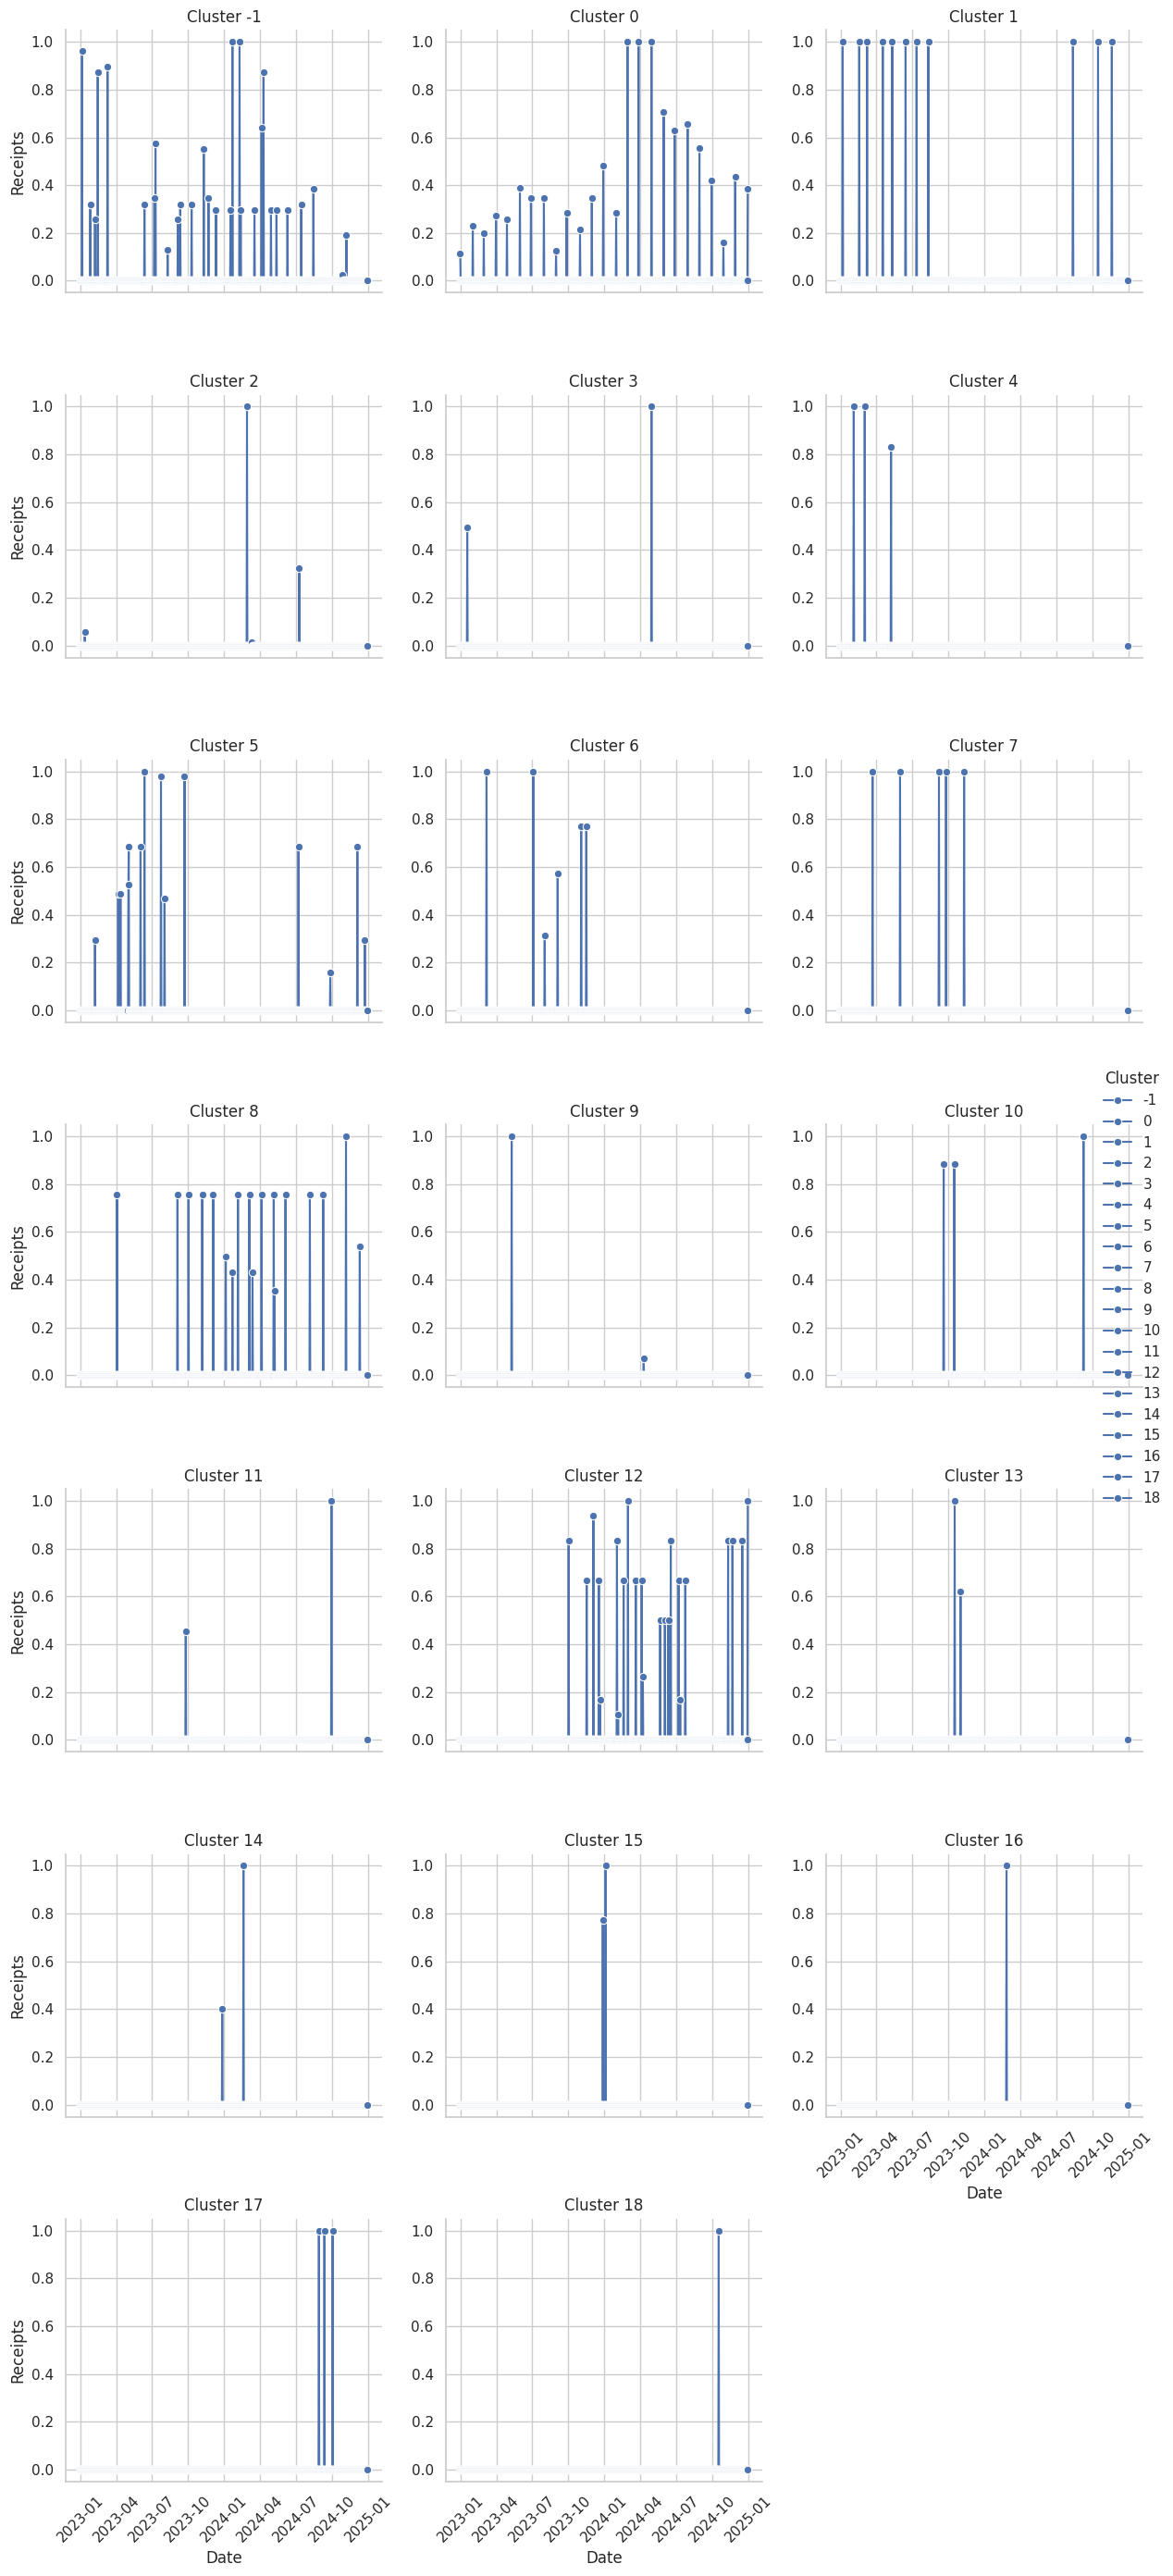

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Date is datetime
df4['Date'] = pd.to_datetime(df4['Date'])

# Set the style
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(df4, col='Cluster', col_wrap=3, height=4, sharey=False)

# Add the line plots to each facet
g.map_dataframe(sns.lineplot, x='Date', y='Receipts', hue='Cluster', marker='o')

# Adjust pdf4
g.set_axis_labels("Date", "Receipts")
g.set_titles("Cluster {col_name}")
g.add_legend(title='Cluster')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


### Not important

In [ ]:
# Replace `cluster_id` with the desired cluster number, e.g., 2
cluster_id = "7"

min_payment = df4[
    (df4['Cluster'] == cluster_id) &
    (df4['Receipts'] > 0)
]['Receipts'].min()

print(f"Minimum non-zero payment in Cluster {cluster_id}: {min_payment}")

Minimum non-zero payment in Cluster 7: 1.0


### Not important

In [ ]:
cluster_id = "7"

# Define the most recent date in the dataset (or use today's date if applicable)
latest_date = df4['Date'].max()

# Filter for the last 100 days and specific cluster
filtered_df = df4[
    (df4['Cluster'] == cluster_id) &
    (df4['Date'] >= latest_date - pd.Timedelta(days=100))
]

# Optional: sort by date
filtered_df = filtered_df.sort_values(by='Date')

# Print result
print(filtered_df[['Date', 'Cluster', 'Receipts']])

           Date Cluster  Receipts
6496 2024-09-22       7       0.0
6497 2024-09-23       7       0.0
6498 2024-09-24       7       0.0
6499 2024-09-25       7       0.0
6500 2024-09-26       7       0.0
6501 2024-09-27       7       0.0
6502 2024-09-28       7       0.0
6503 2024-09-29       7       0.0
6504 2024-09-30       7       0.0
6505 2024-10-01       7       0.0
6506 2024-10-02       7       0.0
6507 2024-10-03       7       0.0
6508 2024-10-04       7       0.0
6509 2024-10-05       7       0.0
6510 2024-10-06       7       0.0
6511 2024-10-07       7       0.0
6512 2024-10-08       7       0.0
6513 2024-10-09       7       0.0
6514 2024-10-10       7       0.0
6515 2024-10-11       7       0.0
6516 2024-10-12       7       0.0
6517 2024-10-13       7       0.0
6518 2024-10-14       7       0.0
6519 2024-10-15       7       0.0
6520 2024-10-16       7       0.0
6521 2024-10-17       7       0.0
6522 2024-10-18       7       0.0
6523 2024-10-19       7       0.0
6524 2024-10-2

### From here to below i did not implement in vs code

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_amount_prediction_model(model, validation_dataloader):
    """
    Evaluate a regression model (e.g., amount predictions) using MAE, RMSE,
    and RMSE on non-zero targets only (Payment_Indicator == 1).

    Args:
        model: Trained PyTorch Lightning model.
        validation_dataloader: DataLoader for validation data.

    Returns:
        Dictionary with MAE, RMSE, RMSE_nonzero, and predictions.
    """
    model.eval()

    predictions = []
    targets = []

    with torch.no_grad():
        for x, y in validation_dataloader:
            output = model(x)
            pred = output["prediction"]  # Shape: [batch_size, prediction_length, 1]
            target = y[0]  # True amount values

            predictions.append(pred)
            targets.append(target)

    # Flatten and move to CPU
    predictions = torch.cat(predictions, dim=0).cpu().numpy().reshape(-1)
    targets = torch.cat(targets, dim=0).cpu().numpy().reshape(-1)

    # Compute overall metrics
    mae = mean_absolute_error(targets, predictions)
    rmse = np.sqrt(mean_squared_error(targets, predictions))

    # Compute RMSE for non-zero targets only (Payment_Indicator == 1)
    non_zero_mask = targets > 0
    if np.any(non_zero_mask):
        rmse_nonzero = np.sqrt(mean_squared_error(targets[non_zero_mask], predictions[non_zero_mask]))
        print("no none")
    else:
        rmse_nonzero = None  # or 0.0 if you prefer a default
        print("none")

    print("mae",mae)
    print("rmse",rmse)
    print("rmse_nonzero",rmse_nonzero)

    results_df = pd.DataFrame({
    "Actual": targets,
    "Predicted": predictions
    })

    # Optionally, store only Payment_Indicator = 1 (i.e., where Actual > 0)
    non_zero_df = results_df[results_df["Actual"] > 0].reset_index(drop=True)

    # Add these to the return dictionary
    return {
        "metrics": {
            "MAE": mae,
            "RMSE": rmse,
            "RMSE_non_zero": rmse_nonzero  # if you're computing it as before
        },
        "predictions": predictions,
        "targets": targets,
        "all_results_df": results_df,
        "non_zero_results_df": non_zero_df
    }

def visualize_regression_results(evaluation_results):
    """
    Visualize regression evaluation results with scatter and error plots.
    """
    y_true = evaluation_results["targets"]
    y_pred = evaluation_results["predictions"]

    # Scatter plot of predicted vs actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel("Actual Amount")
    plt.ylabel("Predicted Amount")
    plt.title("Predicted vs Actual Amounts")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("MAE:", round(evaluation_results["metrics"]["MAE"], 2))
    print("RMSE:", round(evaluation_results["metrics"]["RMSE"], 2))
    if evaluation_results["metrics"]["RMSE_nonzero"] is not None:
        print("RMSE (Payment_Indicator = 1):", round(evaluation_results["metrics"]["RMSE_nonzero"], 2))
    else:
        print("RMSE (Payment_Indicator = 1): No non-zero targets in evaluation data.")

In [ ]:
print(df[continuous_features_occurrence])

       Receipts  Actual_Balance  Days_Since_Last_Txn  Total_Past_3_Txns  Avg_Past_3_Txns  Txns_Past_60_Days
0      0.000000        0.015583             0.000000           0.000000         0.000000           0.000000
1      0.000000        0.015583             0.000000           0.000000         0.000000           0.000000
2      0.000000        0.015583             0.000000           0.000000         0.000000           0.000000
3      0.000000        0.015583             0.000000           0.000000         0.000000           0.000000
4      0.000000        0.015583             0.000000           0.000000         0.000000           0.000000
5      0.961538        0.363859             0.000000           0.000000         0.000000           0.000000
6      0.000000        0.437879             0.017544           0.418994         1.000000           0.200000
7      0.000000        0.437879             0.035088           0.418994         1.000000           0.200000
8      0.000000        0.437

### Not important

In [ ]:
if scaler is not None:
    print("normalized")
else:
    print("no normalize")

normalized


### Not important

In [ ]:
evaluation_results = evaluate_amount_prediction_model(best_model_lightning_amount, val_dataloader_amount)
# visualize_regression_results(evaluation_results)
print(evaluation_results["non_zero_results_df"])

no normalize
MAE: 0.004963605664670467
RMSE: 0.011375306996785146
RMSE (non-zero targets): 0.01874132076566382
     Actual     Predicted
0  0.044444  2.005279e-02
1  0.022222  5.712481e-03
2  0.000384 -3.752652e-06
3  0.222222  2.552934e-01
4  0.222222  2.498254e-01
5  0.155556  1.579710e-01
6  0.088889  8.757062e-02
7  0.008889  2.145131e-07


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_amount_prediction_model(model, validation_dataloader, scaler=None):
    """
    Evaluate a regression model (e.g., amount predictions) using MAE, RMSE,
    and RMSE on non-zero targets only (Payment_Indicator == 1).

    Args:
        model: Trained PyTorch Lightning model.
        validation_dataloader: DataLoader for validation data.
        scaler: Scaler (e.g., MinMaxScaler) used during preprocessing.

    Returns:
        Dictionary with MAE, RMSE, RMSE_nonzero, and predictions.
    """
    model.eval()

    predictions = []
    targets = []

    with torch.no_grad():
        for x, y in validation_dataloader:
            output = model(x)
            pred = output["prediction"]  # Shape: [batch_size, prediction_length, 1]
            target = y[0]  # True amount values

            predictions.append(pred)
            targets.append(target)

    # Flatten and move to CPU
    predictions = torch.cat(predictions, dim=0).cpu().numpy().reshape(-1)
    targets = torch.cat(targets, dim=0).cpu().numpy().reshape(-1)

    # Denormalize if scaler is provided
    if scaler is not None:
        predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1)
        targets = scaler.inverse_transform(targets.reshape(-1, 1)).reshape(-1)
    else:
        print("no normalize")

    # Compute overall metrics
    mae = mean_absolute_error(targets, predictions)
    rmse = np.sqrt(mean_squared_error(targets, predictions))

    # Compute RMSE for non-zero targets only (Payment_Indicator == 1)
    non_zero_mask = targets > 0
    if np.any(non_zero_mask):
        rmse_nonzero = np.sqrt(mean_squared_error(targets[non_zero_mask], predictions[non_zero_mask]))
    else:
        rmse_nonzero = None  # or 0.0 if you prefer a default

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("RMSE (non-zero targets):", rmse_nonzero)

    results_df = pd.DataFrame({
        "Actual": targets,
        "Predicted": predictions
    })

    # Optionally, store only Payment_Indicator = 1 (i.e., where Actual > 0)
    non_zero_df = results_df[results_df["Actual"] > 0].reset_index(drop=True)

    # Add these to the return dictionary
    return {
        "metrics": {
            "MAE": mae,
            "RMSE": rmse,
            "RMSE_non_zero": rmse_nonzero  # if you're computing it as before
        },
        "predictions": predictions,
        "targets": targets,
        "all_results_df": results_df,
        "non_zero_results_df": non_zero_df
    }

def visualize_regression_results(evaluation_results):
    """
    Visualize regression evaluation results with scatter and error plots.
    """
    y_true = evaluation_results["targets"]
    y_pred = evaluation_results["predictions"]

    # Scatter plot of predicted vs actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel("Actual Amount")
    plt.ylabel("Predicted Amount")
    plt.title("Predicted vs Actual Amounts")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("MAE:", round(evaluation_results["metrics"]["MAE"], 2))
    print("RMSE:", round(evaluation_results["metrics"]["RMSE"], 2))
    if evaluation_results["metrics"]["RMSE_nonzero"] is not None:
        print("RMSE (Payment_Indicator = 1):", round(evaluation_results["metrics"]["RMSE_nonzero"], 2))
    else:
        print("RMSE (Payment_Indicator = 1): No non-zero targets in evaluation data.")
